In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('StudentPerformanceTrainingSet.csv')
test = pd.read_csv('StudentPerformanceTestSet.csv')
sol = pd.read_csv('Solution File.csv')

In [3]:
train.head()

,student_id,gender,race/ethnicity,parental level of education,lunch,test preparation course,score,parental_job_status,parental_wealth_classification
0,1014,female,group D,high school,standard,completed,88,employed,poor
1,1650,female,NaN,some high school,free/reduced,completed,34,unemployed,middle class
2,717,female,group C,some high school,standard,none,59,employed,middle class
3,258,female,group D,NaN,standard,none,68,employed,poor
4,1312,male,group D,some college,standard,completed,74,employed,poor


In [4]:
test.head()

,student_id,gender,race/ethnicity,parental level of education,lunch,test preparation course,parental_job_status,parental_wealth_classification
0,810,female,group A,some college,standard,none,employed,middle class
1,1609,female,NaN,associate's degree,free/reduced,NaN,employed,poor
2,15,female,NaN,some high school,NaN,none,NaN,middle class
3,134,male,group D,NaN,standard,none,employed,wealthy
4,846,male,group C,associate's degree,standard,completed,employed,poor


In [5]:
sol.head()

,student_id,score
0,810,57
1,1609,63
2,15,19
3,134,1
4,846,39


In [6]:
print(train.shape)
print(test.shape)

(1200, 9)
(800, 8)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   student_id                      1200 non-null   int64 
 1   gender                          1161 non-null   object
 2   race/ethnicity                  1117 non-null   object
 3   parental level of education     1050 non-null   object
 4   lunch                           1038 non-null   object
 5   test preparation course         1147 non-null   object
 6   score                           1200 non-null   int64 
 7   parental_job_status             1178 non-null   object
 8   parental_wealth_classification  1159 non-null   object
dtypes: int64(2), object(7)
memory usage: 84.5+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   student_id                      800 non-null    int64 
 1   gender                          765 non-null    object
 2   race/ethnicity                  724 non-null    object
 3   parental level of education     691 non-null    object
 4   lunch                           696 non-null    object
 5   test preparation course         760 non-null    object
 6   parental_job_status             776 non-null    object
 7   parental_wealth_classification  766 non-null    object
dtypes: int64(1), object(7)
memory usage: 50.1+ KB


In [9]:
train.describe()

,student_id,score
count,1200.000000,1200.000000
mean,1013.711667,62.272500
std,566.800153,14.108122
min,1.000000,14.000000
25%,526.750000,53.000000
50%,1020.500000,63.000000
75%,1487.250000,73.000000
max,2000.000000,94.000000


In [10]:
train['student_id'].nunique()

1200

In [11]:
submit = test[['student_id']]

In [12]:
submit.head()

,student_id
0,810
1,1609
2,15
3,134
4,846


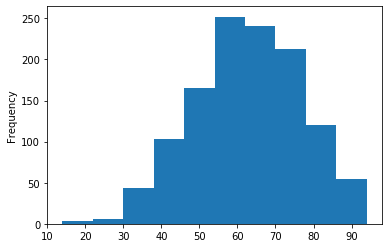

In [13]:
train['score'].plot(kind = 'hist')

In [14]:
train['gender'].value_counts()

male      588
female    573
Name: gender, dtype: int64

In [15]:
test['gender'].value_counts()

male      411
female    354
Name: gender, dtype: int64

In [16]:
train['gender'].isnull().sum()

39

In [17]:
train['gender'].fillna('male', inplace = True)
test['gender'].fillna('male', inplace = True)

In [18]:
train['race/ethnicity'].unique()

array(['group D', nan, 'group C', 'group B', 'group A', 'group E'],
      dtype=object)

In [19]:
test['race/ethnicity'].unique()

array(['group A', nan, 'group D', 'group C', 'group B', 'group E'],
      dtype=object)

In [20]:
train['race/ethnicity'].value_counts()

group C    339
group D    291
group B    230
group E    185
group A     72
Name: race/ethnicity, dtype: int64

In [21]:
test['race/ethnicity'].value_counts()

group C    239
group D    188
group B    145
group E     94
group A     58
Name: race/ethnicity, dtype: int64

In [22]:
test['race/ethnicity'].isnull().sum()

76

In [23]:
train['race/ethnicity'].fillna('group C', inplace = True)
test['race/ethnicity'].fillna('group C', inplace = True)

In [24]:
train['parental level of education'].unique()

array(['high school', 'some high school', nan, 'some college',
       "associate's degree", "master's degree", "bachelor's degree"],
      dtype=object)

In [25]:
test['parental level of education'].unique()

array(['some college', "associate's degree", 'some high school', nan,
       "master's degree", 'high school', "bachelor's degree"],
      dtype=object)

In [26]:
train['parental level of education'].value_counts()

some college          249
some high school      212
high school           212
associate's degree    182
bachelor's degree     127
master's degree        68
Name: parental level of education, dtype: int64

In [27]:
test['parental level of education'].value_counts()

some college          181
associate's degree    132
high school           131
some high school      126
bachelor's degree      72
master's degree        49
Name: parental level of education, dtype: int64

In [28]:
train['parental level of education'].isnull().sum()

150

In [29]:
train['parental level of education'].fillna('some college', inplace = True)
test['parental level of education'].fillna('some college', inplace = True)

In [30]:
train['lunch'].unique()

array(['standard', 'free/reduced', nan], dtype=object)

In [31]:
train['lunch'].value_counts()

standard        687
free/reduced    351
Name: lunch, dtype: int64

In [32]:
test['lunch'].value_counts()

standard        449
free/reduced    247
Name: lunch, dtype: int64

In [33]:
test['lunch'].isnull().sum()

104

In [34]:
train['lunch'].fillna('standard', inplace = True)
test['lunch'].fillna('standard', inplace = True)

In [35]:
train['test preparation course'].unique()

array(['completed', 'none', nan], dtype=object)

In [36]:
test['test preparation course'].unique()

array(['none', nan, 'completed'], dtype=object)

In [37]:
train['test preparation course'].value_counts()

none         796
completed    351
Name: test preparation course, dtype: int64

In [38]:
test['test preparation course'].value_counts()

none         496
completed    264
Name: test preparation course, dtype: int64

In [39]:
test['test preparation course'].isnull().sum()

40

In [40]:
train['test preparation course'].fillna('none', inplace = True)
test['test preparation course'].fillna('none', inplace = True)

In [41]:
train['parental_job_status'].unique()

array(['employed', 'unemployed', nan], dtype=object)

In [42]:
test['parental_job_status'].unique()

array(['employed', nan, 'unemployed'], dtype=object)

In [43]:
train['parental_job_status'].value_counts()

employed      878
unemployed    300
Name: parental_job_status, dtype: int64

In [44]:
test['parental_job_status'].value_counts()

employed      579
unemployed    197
Name: parental_job_status, dtype: int64

In [45]:
test['parental_job_status'].isnull().sum()

24

In [46]:
train['parental_job_status'].fillna('employed', inplace = True)
test['parental_job_status'].fillna('employed', inplace = True)

In [47]:
train['parental_wealth_classification'].unique()

array(['poor', 'middle class', nan, 'wealthy'], dtype=object)

In [48]:
test['parental_wealth_classification'].unique()

array(['middle class', 'poor', 'wealthy', nan], dtype=object)

In [49]:
train['parental_wealth_classification'].value_counts()

middle class    661
poor            399
wealthy          99
Name: parental_wealth_classification, dtype: int64

In [50]:
test['parental_wealth_classification'].value_counts()

middle class    420
poor            280
wealthy          66
Name: parental_wealth_classification, dtype: int64

In [51]:
test['parental_wealth_classification'].isnull().sum()

34

In [52]:
train['parental_wealth_classification'].fillna('middle class', inplace = True)
test['parental_wealth_classification'].fillna('middle class', inplace = True)

In [53]:
train.drop('student_id', axis = 1, inplace = True)
test.drop('student_id', axis = 1, inplace = True)

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [55]:
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

train['lunch'] = le.fit_transform(train['lunch'])
test['lunch'] = le.fit_transform(test['lunch'])

train['test preparation course'] = le.fit_transform(train['test preparation course'])
test['test preparation course'] = le.fit_transform(test['test preparation course'])

train['parental_job_status'] = le.fit_transform(train['parental_job_status'])
test['parental_job_status'] = le.fit_transform(test['parental_job_status'])

In [56]:
dummy1 = pd.get_dummies(train['race/ethnicity'],prefix = 'Race', drop_first= True )
dummy2 = pd.get_dummies(test['race/ethnicity'],prefix = 'Race', drop_first= True )

train = pd.concat([train, dummy1], axis = 1)
test = pd.concat([test, dummy2], axis = 1)

train.drop('race/ethnicity', axis = 1, inplace = True)
test.drop('race/ethnicity', axis = 1, inplace = True)

In [57]:
dummy1 = pd.get_dummies(train['parental level of education'],prefix = 'Edu_level', drop_first= True )
dummy2 = pd.get_dummies(test['parental level of education'],prefix = 'Edu_level', drop_first= True )

train = pd.concat([train, dummy1], axis = 1)
test = pd.concat([test, dummy2], axis = 1)

train.drop('parental level of education', axis = 1, inplace = True)
test.drop('parental level of education', axis = 1, inplace = True)

In [58]:
dummy1 = pd.get_dummies(train['parental_wealth_classification'],prefix = 'Wealth_class', drop_first= True )
dummy2 = pd.get_dummies(test['parental_wealth_classification'],prefix = 'Wealth_class', drop_first= True )

train = pd.concat([train, dummy1], axis = 1)
test = pd.concat([test, dummy2], axis = 1)

train.drop('parental_wealth_classification', axis = 1, inplace = True)
test.drop('parental_wealth_classification', axis = 1, inplace = True)

In [59]:
train.head()

,gender,lunch,test preparation course,score,parental_job_status,Race_group B,Race_group C,Race_group D,Race_group E,Edu_level_bachelor's degree,Edu_level_high school,Edu_level_master's degree,Edu_level_some college,Edu_level_some high school,Wealth_class_poor,Wealth_class_wealthy
0,0,1,0,88,0,0,0,1,0,0,1,0,0,0,1,0
1,0,0,0,34,1,0,1,0,0,0,0,0,0,1,0,0
2,0,1,1,59,0,0,1,0,0,0,0,0,0,1,0,0
3,0,1,1,68,0,0,0,1,0,0,0,0,1,0,1,0
4,1,1,0,74,0,0,0,1,0,0,0,0,1,0,1,0


In [60]:
test.head()

,gender,lunch,test preparation course,parental_job_status,Race_group B,Race_group C,Race_group D,Race_group E,Edu_level_bachelor's degree,Edu_level_high school,Edu_level_master's degree,Edu_level_some college,Edu_level_some high school,Wealth_class_poor,Wealth_class_wealthy
0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
3,1,1,1,0,0,0,1,0,0,0,0,1,0,0,1
4,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [61]:
print(train.shape)
print(test.shape)

(1200, 16)
(800, 15)


In [62]:
data = train.drop('score', axis = 1)
target = train['score']

In [63]:
print(data.shape)
print(target.shape)

(1200, 15)
(1200,)


In [65]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error as mse
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [66]:
lgb = LGBMRegressor(num_leaves=200, min_data_in_leaf=3,
                    objective='regression',
                    max_depth=-1,learning_rate=0.05, 
                    boosting_type='gbdt', 
                    feature_fraction=0.60,
                    lambda_l1=1,lambda_l2=1, 
                    metric='rmse', 
                    num_iterations=4000)

xgb = XGBRegressor(n_estimators = 5000, max_depth = 30, 
                     reg_lambda = 80,random_state = 30,
                     learning_rate=0.3, gamma = 1.5)

cat = CatBoostRegressor(iterations = 50, depth = 3, learning_rate = 0.1, loss_function = 'RMSE')

In [67]:
kf = KFold(n_splits=30)

In [68]:
lgb_scores = []
lgb_test_pred = np.zeros(len(test))
lgb_train_pred = np.zeros(len(train))

for fold,(tr_in,te_in) in enumerate(kf.split(data)):
    
    print(f"==================================Fold{fold}=============================================")
    X_train,X_test = data.iloc[tr_in],data.iloc[te_in]
    y_train,y_test = target.iloc[tr_in],target.iloc[te_in]
    
    lgb.fit(X_train,y_train,eval_metric = 'rmse', eval_set = [(X_train,y_train),(X_test,y_test)],
            early_stopping_rounds = 500)
    
    lgb_scores.append(np.sqrt(mse(y_test,lgb.predict(X_test))))
    
    lgb_train_pred += lgb.predict(data)
    lgb_test_pred += lgb.predict(test)

==================================Fold0=============================================
[1]	training's rmse: 13.5512	valid_1's rmse: 14.3092
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 13.1804	valid_1's rmse: 13.9815
[3]	training's rmse: 12.7041	valid_1's rmse: 13.5064
[4]	training's rmse: 12.3546	valid_1's rmse: 13.195
[5]	training's rmse: 12.0439	valid_1's rmse: 12.9092
[6]	training's rmse: 11.9663	valid_1's rmse: 12.8548
[7]	training's rmse: 11.5633	valid_1's rmse: 12.46
[8]	training's rmse: 11.2828	valid_1's rmse: 12.2072
[9]	training's rmse: 10.9281	valid_1's rmse: 11.8533
[10]	training's rmse: 10.5951	valid_1's rmse: 11.5187
[11]	training's rmse: 10.3215	valid_1's rmse: 11.2324
[12]	training's rmse: 10.0268	valid_1's rmse: 10.9395
[13]	training's rmse: 9.9679	valid_1's rmse: 10.8934
[14]	training's rmse: 9.89595	valid_1's rmse: 10.8494
[15]	training's rmse: 9.63049	valid_1's rmse: 10.5792
[16]	training's rmse: 9.55621	valid_1's rmse: 10.5066
[1

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[143]	training's rmse: 6.22341	valid_1's rmse: 6.74279
[144]	training's rmse: 6.22187	valid_1's rmse: 6.7451
[145]	training's rmse: 6.21952	valid_1's rmse: 6.74771
[146]	training's rmse: 6.21488	valid_1's rmse: 6.74275
[147]	training's rmse: 6.21201	valid_1's rmse: 6.749
[148]	training's rmse: 6.20858	valid_1's rmse: 6.74599
[149]	training's rmse: 6.20545	valid_1's rmse: 6.75144
[150]	training's rmse: 6.20307	valid_1's rmse: 6.75761
[151]	training's rmse: 6.20075	valid_1's rmse: 6.7551
[152]	training's rmse: 6.19703	valid_1's rmse: 6.7457
[153]	training's rmse: 6.19536	valid_1's rmse: 6.74685
[154]	training's rmse: 6.19378	valid_1's rmse: 6.74739
[155]	training's rmse: 6.19249	valid_1's rmse: 6.74808
[156]	training's rmse: 6.19011	valid_1's rmse: 6.74372
[157]	training's rmse: 6.18906	valid_1's rmse: 6.741
[158]	training's rmse: 6.18761	valid_1's rmse: 6.7422
[159]	training's rmse: 6.18454	valid_1's rmse: 6.74043
[160]	training's rmse: 6.18332	valid_1's rmse: 6.74237
[161]	training's r

[430]	training's rmse: 5.95693	valid_1's rmse: 6.8587
[431]	training's rmse: 5.95623	valid_1's rmse: 6.86218
[432]	training's rmse: 5.9559	valid_1's rmse: 6.86173
[433]	training's rmse: 5.9558	valid_1's rmse: 6.86169
[434]	training's rmse: 5.95578	valid_1's rmse: 6.86183
[435]	training's rmse: 5.95569	valid_1's rmse: 6.86183
[436]	training's rmse: 5.95536	valid_1's rmse: 6.86303
[437]	training's rmse: 5.95427	valid_1's rmse: 6.86557
[438]	training's rmse: 5.95394	valid_1's rmse: 6.86697
[439]	training's rmse: 5.95344	valid_1's rmse: 6.86834
[440]	training's rmse: 5.95329	valid_1's rmse: 6.86868
[441]	training's rmse: 5.95321	valid_1's rmse: 6.86823
[442]	training's rmse: 5.9532	valid_1's rmse: 6.86821
[443]	training's rmse: 5.95301	valid_1's rmse: 6.86771
[444]	training's rmse: 5.95141	valid_1's rmse: 6.87172
[445]	training's rmse: 5.95072	valid_1's rmse: 6.87411
[446]	training's rmse: 5.95063	valid_1's rmse: 6.87436
[447]	training's rmse: 5.95054	valid_1's rmse: 6.87452
[448]	training

[614]	training's rmse: 5.93084	valid_1's rmse: 6.86856
[615]	training's rmse: 5.93084	valid_1's rmse: 6.86853
[616]	training's rmse: 5.93084	valid_1's rmse: 6.8685
[617]	training's rmse: 5.9308	valid_1's rmse: 6.86856
[618]	training's rmse: 5.93074	valid_1's rmse: 6.86905
[619]	training's rmse: 5.93074	valid_1's rmse: 6.86904
[620]	training's rmse: 5.93074	valid_1's rmse: 6.86904
[621]	training's rmse: 5.93074	valid_1's rmse: 6.86903
[622]	training's rmse: 5.93074	valid_1's rmse: 6.86903
[623]	training's rmse: 5.93073	valid_1's rmse: 6.86902
[624]	training's rmse: 5.93073	valid_1's rmse: 6.86904
[625]	training's rmse: 5.93073	valid_1's rmse: 6.86904
[626]	training's rmse: 5.93069	valid_1's rmse: 6.86899
[627]	training's rmse: 5.93069	valid_1's rmse: 6.86899
[628]	training's rmse: 5.93062	valid_1's rmse: 6.86946
[629]	training's rmse: 5.9306	valid_1's rmse: 6.86972
[630]	training's rmse: 5.9306	valid_1's rmse: 6.86974
[631]	training's rmse: 5.9306	valid_1's rmse: 6.86996
[632]	training'

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[79]	training's rmse: 6.47026	valid_1's rmse: 4.52508
[80]	training's rmse: 6.46357	valid_1's rmse: 4.52832
[81]	training's rmse: 6.4573	valid_1's rmse: 4.52299
[82]	training's rmse: 6.45359	valid_1's rmse: 4.51896
[83]	training's rmse: 6.44744	valid_1's rmse: 4.5246
[84]	training's rmse: 6.44448	valid_1's rmse: 4.52132
[85]	training's rmse: 6.44171	valid_1's rmse: 4.5241
[86]	training's rmse: 6.43738	valid_1's rmse: 4.5182
[87]	training's rmse: 6.43256	valid_1's rmse: 4.51693
[88]	training's rmse: 6.42957	valid_1's rmse: 4.51539
[89]	training's rmse: 6.42689	valid_1's rmse: 4.51575
[90]	training's rmse: 6.42357	valid_1's rmse: 4.51512
[91]	training's rmse: 6.41936	valid_1's rmse: 4.50991
[92]	training's rmse: 6.41648	valid_1's rmse: 4.50838
[93]	training's rmse: 6.41361	valid_1's rmse: 4.50676
[94]	training's rmse: 6.41057	valid_1's rmse: 4.50631
[95]	training's rmse: 6.4075	valid_1's rmse: 4.50393
[96]	training's rmse: 6.4045	valid_1's rmse: 4.50189
[97]	training's rmse: 6.3996	vali

[378]	training's rmse: 6.08173	valid_1's rmse: 4.5422
[379]	training's rmse: 6.08156	valid_1's rmse: 4.54241
[380]	training's rmse: 6.08022	valid_1's rmse: 4.54086
[381]	training's rmse: 6.08003	valid_1's rmse: 4.53977
[382]	training's rmse: 6.07981	valid_1's rmse: 4.54084
[383]	training's rmse: 6.07953	valid_1's rmse: 4.53755
[384]	training's rmse: 6.07947	valid_1's rmse: 4.53674
[385]	training's rmse: 6.0792	valid_1's rmse: 4.5365
[386]	training's rmse: 6.07876	valid_1's rmse: 4.53594
[387]	training's rmse: 6.07872	valid_1's rmse: 4.53613
[388]	training's rmse: 6.07869	valid_1's rmse: 4.53627
[389]	training's rmse: 6.07837	valid_1's rmse: 4.53678
[390]	training's rmse: 6.07809	valid_1's rmse: 4.53675
[391]	training's rmse: 6.07799	valid_1's rmse: 4.53607
[392]	training's rmse: 6.07778	valid_1's rmse: 4.53633
[393]	training's rmse: 6.07774	valid_1's rmse: 4.53619
[394]	training's rmse: 6.07771	valid_1's rmse: 4.53627
[395]	training's rmse: 6.07763	valid_1's rmse: 4.53625
[396]	trainin

[548]	training's rmse: 6.03523	valid_1's rmse: 4.58826
[549]	training's rmse: 6.03473	valid_1's rmse: 4.5879
[550]	training's rmse: 6.03418	valid_1's rmse: 4.5869
[551]	training's rmse: 6.03311	valid_1's rmse: 4.58917
[552]	training's rmse: 6.03301	valid_1's rmse: 4.59054
[553]	training's rmse: 6.03291	valid_1's rmse: 4.59082
[554]	training's rmse: 6.03283	valid_1's rmse: 4.59066
[555]	training's rmse: 6.03265	valid_1's rmse: 4.58957
[556]	training's rmse: 6.03054	valid_1's rmse: 4.59811
[557]	training's rmse: 6.03045	valid_1's rmse: 4.59845
[558]	training's rmse: 6.03043	valid_1's rmse: 4.59868
[559]	training's rmse: 6.03035	valid_1's rmse: 4.59965
[560]	training's rmse: 6.02944	valid_1's rmse: 4.60055
[561]	training's rmse: 6.02894	valid_1's rmse: 4.60019
[562]	training's rmse: 6.02872	valid_1's rmse: 4.6007
[563]	training's rmse: 6.02836	valid_1's rmse: 4.60282
[564]	training's rmse: 6.02833	valid_1's rmse: 4.6027
[565]	training's rmse: 6.0283	valid_1's rmse: 4.60259
[566]	training'

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[34]	training's rmse: 7.44649	valid_1's rmse: 5.69053
[35]	training's rmse: 7.35842	valid_1's rmse: 5.63067
[36]	training's rmse: 7.27854	valid_1's rmse: 5.57242
[37]	training's rmse: 7.22037	valid_1's rmse: 5.54111
[38]	training's rmse: 7.15472	valid_1's rmse: 5.5003
[39]	training's rmse: 7.09584	valid_1's rmse: 5.46528
[40]	training's rmse: 7.03778	valid_1's rmse: 5.42713
[41]	training's rmse: 6.98498	valid_1's rmse: 5.39537
[42]	training's rmse: 6.97478	valid_1's rmse: 5.39871
[43]	training's rmse: 6.94535	valid_1's rmse: 5.3906
[44]	training's rmse: 6.90102	valid_1's rmse: 5.36373
[45]	training's rmse: 6.86684	valid_1's rmse: 5.34047
[46]	training's rmse: 6.84312	valid_1's rmse: 5.34249
[47]	training's rmse: 6.81958	valid_1's rmse: 5.34011
[48]	training's rmse: 6.80005	valid_1's rmse: 5.33888
[49]	training's rmse: 6.76742	valid_1's rmse: 5.3257
[50]	training's rmse: 6.74383	valid_1's rmse: 5.32273
[51]	training's rmse: 6.72821	valid_1's rmse: 5.31913
[52]	training's rmse: 6.7025	v

[312]	training's rmse: 6.05875	valid_1's rmse: 5.64408
[313]	training's rmse: 6.05845	valid_1's rmse: 5.64567
[314]	training's rmse: 6.05833	valid_1's rmse: 5.64438
[315]	training's rmse: 6.05764	valid_1's rmse: 5.64559
[316]	training's rmse: 6.05737	valid_1's rmse: 5.64592
[317]	training's rmse: 6.05535	valid_1's rmse: 5.64716
[318]	training's rmse: 6.05526	valid_1's rmse: 5.64803
[319]	training's rmse: 6.05424	valid_1's rmse: 5.64059
[320]	training's rmse: 6.05405	valid_1's rmse: 5.64042
[321]	training's rmse: 6.05377	valid_1's rmse: 5.64375
[322]	training's rmse: 6.05352	valid_1's rmse: 5.64428
[323]	training's rmse: 6.0534	valid_1's rmse: 5.64591
[324]	training's rmse: 6.05331	valid_1's rmse: 5.64699
[325]	training's rmse: 6.05261	valid_1's rmse: 5.64557
[326]	training's rmse: 6.05216	valid_1's rmse: 5.64337
[327]	training's rmse: 6.0521	valid_1's rmse: 5.64427
[328]	training's rmse: 6.05064	valid_1's rmse: 5.64418
[329]	training's rmse: 6.04974	valid_1's rmse: 5.63762
[330]	traini

[477]	training's rmse: 5.99104	valid_1's rmse: 5.62585
[478]	training's rmse: 5.99099	valid_1's rmse: 5.62608
[479]	training's rmse: 5.99095	valid_1's rmse: 5.62618
[480]	training's rmse: 5.99086	valid_1's rmse: 5.62464
[481]	training's rmse: 5.99075	valid_1's rmse: 5.62631
[482]	training's rmse: 5.99074	valid_1's rmse: 5.62686
[483]	training's rmse: 5.99015	valid_1's rmse: 5.62397
[484]	training's rmse: 5.98984	valid_1's rmse: 5.6251
[485]	training's rmse: 5.98982	valid_1's rmse: 5.62542
[486]	training's rmse: 5.98978	valid_1's rmse: 5.62571
[487]	training's rmse: 5.98972	valid_1's rmse: 5.62543
[488]	training's rmse: 5.98966	valid_1's rmse: 5.62704
[489]	training's rmse: 5.98948	valid_1's rmse: 5.62881
[490]	training's rmse: 5.98707	valid_1's rmse: 5.6357
[491]	training's rmse: 5.98695	valid_1's rmse: 5.63477
[492]	training's rmse: 5.98618	valid_1's rmse: 5.635
[493]	training's rmse: 5.98617	valid_1's rmse: 5.63486
[494]	training's rmse: 5.98613	valid_1's rmse: 5.63425
[495]	training

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[50]	training's rmse: 6.75492	valid_1's rmse: 4.92692
[51]	training's rmse: 6.7383	valid_1's rmse: 4.92059
[52]	training's rmse: 6.71264	valid_1's rmse: 4.92167
[53]	training's rmse: 6.69323	valid_1's rmse: 4.92194
[54]	training's rmse: 6.67096	valid_1's rmse: 4.9222
[55]	training's rmse: 6.6524	valid_1's rmse: 4.92406
[56]	training's rmse: 6.64494	valid_1's rmse: 4.91759
[57]	training's rmse: 6.62707	valid_1's rmse: 4.92178
[58]	training's rmse: 6.6212	valid_1's rmse: 4.91714
[59]	training's rmse: 6.61343	valid_1's rmse: 4.91354
[60]	training's rmse: 6.59889	valid_1's rmse: 4.9186
[61]	training's rmse: 6.58469	valid_1's rmse: 4.9223
[62]	training's rmse: 6.57703	valid_1's rmse: 4.92148
[63]	training's rmse: 6.56491	valid_1's rmse: 4.93036
[64]	training's rmse: 6.55399	valid_1's rmse: 4.93912
[65]	training's rmse: 6.54416	valid_1's rmse: 4.94813
[66]	training's rmse: 6.53581	valid_1's rmse: 4.95777
[67]	training's rmse: 6.52828	valid_1's rmse: 4.95608
[68]	training's rmse: 6.52132	val

[351]	training's rmse: 6.05861	valid_1's rmse: 5.09115
[352]	training's rmse: 6.05818	valid_1's rmse: 5.08895
[353]	training's rmse: 6.05813	valid_1's rmse: 5.08852
[354]	training's rmse: 6.05771	valid_1's rmse: 5.08798
[355]	training's rmse: 6.05759	valid_1's rmse: 5.08852
[356]	training's rmse: 6.05745	valid_1's rmse: 5.0885
[357]	training's rmse: 6.0573	valid_1's rmse: 5.08798
[358]	training's rmse: 6.05719	valid_1's rmse: 5.08816
[359]	training's rmse: 6.05688	valid_1's rmse: 5.09082
[360]	training's rmse: 6.05686	valid_1's rmse: 5.09148
[361]	training's rmse: 6.05665	valid_1's rmse: 5.09085
[362]	training's rmse: 6.055	valid_1's rmse: 5.09001
[363]	training's rmse: 6.0549	valid_1's rmse: 5.09059
[364]	training's rmse: 6.05473	valid_1's rmse: 5.08906
[365]	training's rmse: 6.05456	valid_1's rmse: 5.08862
[366]	training's rmse: 6.05417	valid_1's rmse: 5.09215
[367]	training's rmse: 6.05388	valid_1's rmse: 5.09345
[368]	training's rmse: 6.0529	valid_1's rmse: 5.09876
[369]	training's

[525]	training's rmse: 6.0072	valid_1's rmse: 5.07318
[526]	training's rmse: 6.00706	valid_1's rmse: 5.07263
[527]	training's rmse: 6.00703	valid_1's rmse: 5.07237
[528]	training's rmse: 6.00702	valid_1's rmse: 5.07259
[529]	training's rmse: 6.00702	valid_1's rmse: 5.07272
[530]	training's rmse: 6.00698	valid_1's rmse: 5.07227
[531]	training's rmse: 6.00697	valid_1's rmse: 5.07191
[532]	training's rmse: 6.0065	valid_1's rmse: 5.07287
[533]	training's rmse: 6.00646	valid_1's rmse: 5.07303
[534]	training's rmse: 6.00631	valid_1's rmse: 5.0713
[535]	training's rmse: 6.00629	valid_1's rmse: 5.07158
[536]	training's rmse: 6.00628	valid_1's rmse: 5.07172
[537]	training's rmse: 6.00621	valid_1's rmse: 5.07177
[538]	training's rmse: 6.0062	valid_1's rmse: 5.07167
[539]	training's rmse: 6.00608	valid_1's rmse: 5.07161
[540]	training's rmse: 6.00596	valid_1's rmse: 5.07142
[541]	training's rmse: 6.00596	valid_1's rmse: 5.07121
[542]	training's rmse: 6.00589	valid_1's rmse: 5.07135
[543]	training

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[89]	training's rmse: 6.32688	valid_1's rmse: 7.91231
[90]	training's rmse: 6.32425	valid_1's rmse: 7.90648
[91]	training's rmse: 6.32063	valid_1's rmse: 7.90468
[92]	training's rmse: 6.31791	valid_1's rmse: 7.90346
[93]	training's rmse: 6.31565	valid_1's rmse: 7.90032
[94]	training's rmse: 6.31358	valid_1's rmse: 7.8926
[95]	training's rmse: 6.30958	valid_1's rmse: 7.89258
[96]	training's rmse: 6.3073	valid_1's rmse: 7.89176
[97]	training's rmse: 6.3035	valid_1's rmse: 7.89416
[98]	training's rmse: 6.30121	valid_1's rmse: 7.88998
[99]	training's rmse: 6.29802	valid_1's rmse: 7.89673
[100]	training's rmse: 6.29374	valid_1's rmse: 7.8922
[101]	training's rmse: 6.29135	valid_1's rmse: 7.88612
[102]	training's rmse: 6.28892	valid_1's rmse: 7.88156
[103]	training's rmse: 6.28516	valid_1's rmse: 7.87834
[104]	training's rmse: 6.28294	valid_1's rmse: 7.8731
[105]	training's rmse: 6.28039	valid_1's rmse: 7.87461
[106]	training's rmse: 6.27951	valid_1's rmse: 7.87358
[107]	training's rmse: 6.2

[393]	training's rmse: 5.95068	valid_1's rmse: 7.95055
[394]	training's rmse: 5.95064	valid_1's rmse: 7.95068
[395]	training's rmse: 5.94955	valid_1's rmse: 7.9524
[396]	training's rmse: 5.94872	valid_1's rmse: 7.95287
[397]	training's rmse: 5.94842	valid_1's rmse: 7.95373
[398]	training's rmse: 5.94812	valid_1's rmse: 7.95319
[399]	training's rmse: 5.94765	valid_1's rmse: 7.95297
[400]	training's rmse: 5.94733	valid_1's rmse: 7.95425
[401]	training's rmse: 5.94723	valid_1's rmse: 7.95365
[402]	training's rmse: 5.94588	valid_1's rmse: 7.95381
[403]	training's rmse: 5.94567	valid_1's rmse: 7.95577
[404]	training's rmse: 5.94498	valid_1's rmse: 7.95446
[405]	training's rmse: 5.94459	valid_1's rmse: 7.95315
[406]	training's rmse: 5.94457	valid_1's rmse: 7.95351
[407]	training's rmse: 5.94393	valid_1's rmse: 7.95666
[408]	training's rmse: 5.94376	valid_1's rmse: 7.95588
[409]	training's rmse: 5.94326	valid_1's rmse: 7.95766
[410]	training's rmse: 5.94294	valid_1's rmse: 7.9578
[411]	traini

[563]	training's rmse: 5.89733	valid_1's rmse: 7.99165
[564]	training's rmse: 5.8967	valid_1's rmse: 7.99334
[565]	training's rmse: 5.89628	valid_1's rmse: 7.99514
[566]	training's rmse: 5.89597	valid_1's rmse: 7.99662
[567]	training's rmse: 5.8956	valid_1's rmse: 7.99758
[568]	training's rmse: 5.89559	valid_1's rmse: 7.99731
[569]	training's rmse: 5.89558	valid_1's rmse: 7.99738
[570]	training's rmse: 5.89554	valid_1's rmse: 7.99737
[571]	training's rmse: 5.89548	valid_1's rmse: 7.9972
[572]	training's rmse: 5.89505	valid_1's rmse: 7.99675
[573]	training's rmse: 5.89452	valid_1's rmse: 7.99716
[574]	training's rmse: 5.89433	valid_1's rmse: 7.9973
[575]	training's rmse: 5.89424	valid_1's rmse: 7.99841
[576]	training's rmse: 5.89407	valid_1's rmse: 7.99838
[577]	training's rmse: 5.89402	valid_1's rmse: 7.99806
[578]	training's rmse: 5.894	valid_1's rmse: 7.99827
[579]	training's rmse: 5.89399	valid_1's rmse: 7.99835
[580]	training's rmse: 5.89373	valid_1's rmse: 7.99848
[581]	training's

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[142]	training's rmse: 6.19493	valid_1's rmse: 7.98039
[143]	training's rmse: 6.19396	valid_1's rmse: 7.98377
[144]	training's rmse: 6.19243	valid_1's rmse: 7.98298
[145]	training's rmse: 6.19119	valid_1's rmse: 7.98684
[146]	training's rmse: 6.18772	valid_1's rmse: 7.9863
[147]	training's rmse: 6.18533	valid_1's rmse: 7.98543
[148]	training's rmse: 6.1833	valid_1's rmse: 7.97717
[149]	training's rmse: 6.18065	valid_1's rmse: 7.98449
[150]	training's rmse: 6.17818	valid_1's rmse: 7.98996
[151]	training's rmse: 6.17415	valid_1's rmse: 7.99911
[152]	training's rmse: 6.17019	valid_1's rmse: 8.01091
[153]	training's rmse: 6.16758	valid_1's rmse: 8.01058
[154]	training's rmse: 6.1664	valid_1's rmse: 8.00937
[155]	training's rmse: 6.16561	valid_1's rmse: 8.01189
[156]	training's rmse: 6.16399	valid_1's rmse: 8.01059
[157]	training's rmse: 6.16303	valid_1's rmse: 8.01474
[158]	training's rmse: 6.16248	valid_1's rmse: 8.01247
[159]	training's rmse: 6.16106	valid_1's rmse: 8.01665
[160]	traini

[447]	training's rmse: 5.92855	valid_1's rmse: 8.25484
[448]	training's rmse: 5.9285	valid_1's rmse: 8.25442
[449]	training's rmse: 5.92843	valid_1's rmse: 8.25419
[450]	training's rmse: 5.92842	valid_1's rmse: 8.25434
[451]	training's rmse: 5.92842	valid_1's rmse: 8.25485
[452]	training's rmse: 5.92812	valid_1's rmse: 8.25346
[453]	training's rmse: 5.92793	valid_1's rmse: 8.25196
[454]	training's rmse: 5.92541	valid_1's rmse: 8.26079
[455]	training's rmse: 5.92536	valid_1's rmse: 8.26061
[456]	training's rmse: 5.92535	valid_1's rmse: 8.26061
[457]	training's rmse: 5.92479	valid_1's rmse: 8.26223
[458]	training's rmse: 5.92472	valid_1's rmse: 8.26296
[459]	training's rmse: 5.92296	valid_1's rmse: 8.27148
[460]	training's rmse: 5.92293	valid_1's rmse: 8.27165
[461]	training's rmse: 5.92293	valid_1's rmse: 8.27182
[462]	training's rmse: 5.9229	valid_1's rmse: 8.27103
[463]	training's rmse: 5.92285	valid_1's rmse: 8.2705
[464]	training's rmse: 5.92263	valid_1's rmse: 8.27227
[465]	trainin

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[5]	training's rmse: 12.0509	valid_1's rmse: 12.7243
[6]	training's rmse: 11.9748	valid_1's rmse: 12.6667
[7]	training's rmse: 11.5711	valid_1's rmse: 12.2004
[8]	training's rmse: 11.2922	valid_1's rmse: 11.902
[9]	training's rmse: 10.9369	valid_1's rmse: 11.4976
[10]	training's rmse: 10.6027	valid_1's rmse: 11.1303
[11]	training's rmse: 10.3271	valid_1's rmse: 10.8261
[12]	training's rmse: 10.0318	valid_1's rmse: 10.4907
[13]	training's rmse: 9.97164	valid_1's rmse: 10.4797
[14]	training's rmse: 9.90202	valid_1's rmse: 10.4356
[15]	training's rmse: 9.63542	valid_1's rmse: 10.1277
[16]	training's rmse: 9.56095	valid_1's rmse: 10.0698
[17]	training's rmse: 9.30908	valid_1's rmse: 9.78875
[18]	training's rmse: 9.11555	valid_1's rmse: 9.57478
[19]	training's rmse: 8.89745	valid_1's rmse: 9.34225
[20]	training's rmse: 8.75856	valid_1's rmse: 9.20597
[21]	training's rmse: 8.56459	valid_1's rmse: 8.99834
[22]	training's rmse: 8.44266	valid_1's rmse: 8.86993
[23]	training's rmse: 8.27707	val

[275]	training's rmse: 6.05258	valid_1's rmse: 7.30846
[276]	training's rmse: 6.05253	valid_1's rmse: 7.31077
[277]	training's rmse: 6.05181	valid_1's rmse: 7.31388
[278]	training's rmse: 6.05159	valid_1's rmse: 7.31463
[279]	training's rmse: 6.05067	valid_1's rmse: 7.3145
[280]	training's rmse: 6.04979	valid_1's rmse: 7.31733
[281]	training's rmse: 6.0496	valid_1's rmse: 7.31791
[282]	training's rmse: 6.04874	valid_1's rmse: 7.32221
[283]	training's rmse: 6.04842	valid_1's rmse: 7.32189
[284]	training's rmse: 6.04831	valid_1's rmse: 7.32194
[285]	training's rmse: 6.04799	valid_1's rmse: 7.322
[286]	training's rmse: 6.04795	valid_1's rmse: 7.32143
[287]	training's rmse: 6.04776	valid_1's rmse: 7.32135
[288]	training's rmse: 6.04736	valid_1's rmse: 7.32119
[289]	training's rmse: 6.04632	valid_1's rmse: 7.31692
[290]	training's rmse: 6.04572	valid_1's rmse: 7.32015
[291]	training's rmse: 6.04511	valid_1's rmse: 7.31589
[292]	training's rmse: 6.04476	valid_1's rmse: 7.31649
[293]	training

[435]	training's rmse: 5.97776	valid_1's rmse: 7.41521
[436]	training's rmse: 5.97752	valid_1's rmse: 7.41577
[437]	training's rmse: 5.97739	valid_1's rmse: 7.41638
[438]	training's rmse: 5.97735	valid_1's rmse: 7.41691
[439]	training's rmse: 5.97731	valid_1's rmse: 7.41638
[440]	training's rmse: 5.97722	valid_1's rmse: 7.41749
[441]	training's rmse: 5.97711	valid_1's rmse: 7.41871
[442]	training's rmse: 5.97708	valid_1's rmse: 7.41991
[443]	training's rmse: 5.97698	valid_1's rmse: 7.421
[444]	training's rmse: 5.97693	valid_1's rmse: 7.42206
[445]	training's rmse: 5.97692	valid_1's rmse: 7.42219
[446]	training's rmse: 5.97692	valid_1's rmse: 7.42217
[447]	training's rmse: 5.97683	valid_1's rmse: 7.42294
[448]	training's rmse: 5.97679	valid_1's rmse: 7.42311
[449]	training's rmse: 5.9766	valid_1's rmse: 7.42483
[450]	training's rmse: 5.97658	valid_1's rmse: 7.42555
[451]	training's rmse: 5.97623	valid_1's rmse: 7.42804
[452]	training's rmse: 5.97603	valid_1's rmse: 7.43039
[453]	trainin

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[147]	training's rmse: 6.15169	valid_1's rmse: 8.23698
[148]	training's rmse: 6.14865	valid_1's rmse: 8.23839
[149]	training's rmse: 6.14671	valid_1's rmse: 8.23964
[150]	training's rmse: 6.14393	valid_1's rmse: 8.23945
[151]	training's rmse: 6.14133	valid_1's rmse: 8.22755
[152]	training's rmse: 6.13898	valid_1's rmse: 8.21726
[153]	training's rmse: 6.13694	valid_1's rmse: 8.22193
[154]	training's rmse: 6.13568	valid_1's rmse: 8.2276
[155]	training's rmse: 6.13481	valid_1's rmse: 8.23173
[156]	training's rmse: 6.13372	valid_1's rmse: 8.23626
[157]	training's rmse: 6.13333	valid_1's rmse: 8.2353
[158]	training's rmse: 6.13267	valid_1's rmse: 8.23963
[159]	training's rmse: 6.12872	valid_1's rmse: 8.24841
[160]	training's rmse: 6.12814	valid_1's rmse: 8.24694
[161]	training's rmse: 6.12685	valid_1's rmse: 8.24814
[162]	training's rmse: 6.12492	valid_1's rmse: 8.24786
[163]	training's rmse: 6.12277	valid_1's rmse: 8.2492
[164]	training's rmse: 6.1209	valid_1's rmse: 8.25025
[165]	trainin

[462]	training's rmse: 5.90377	valid_1's rmse: 8.53564
[463]	training's rmse: 5.90355	valid_1's rmse: 8.53681
[464]	training's rmse: 5.90291	valid_1's rmse: 8.53705
[465]	training's rmse: 5.90247	valid_1's rmse: 8.53981
[466]	training's rmse: 5.90182	valid_1's rmse: 8.5432
[467]	training's rmse: 5.90155	valid_1's rmse: 8.54358
[468]	training's rmse: 5.90152	valid_1's rmse: 8.54377
[469]	training's rmse: 5.90139	valid_1's rmse: 8.54414
[470]	training's rmse: 5.90139	valid_1's rmse: 8.54417
[471]	training's rmse: 5.90131	valid_1's rmse: 8.54362
[472]	training's rmse: 5.90059	valid_1's rmse: 8.54547
[473]	training's rmse: 5.90055	valid_1's rmse: 8.54547
[474]	training's rmse: 5.8999	valid_1's rmse: 8.54466
[475]	training's rmse: 5.89975	valid_1's rmse: 8.54454
[476]	training's rmse: 5.8997	valid_1's rmse: 8.54499
[477]	training's rmse: 5.89969	valid_1's rmse: 8.54485
[478]	training's rmse: 5.89955	valid_1's rmse: 8.54642
[479]	training's rmse: 5.89882	valid_1's rmse: 8.54763
[480]	trainin

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[8]	training's rmse: 11.3386	valid_1's rmse: 9.96633
[9]	training's rmse: 10.981	valid_1's rmse: 9.62025
[10]	training's rmse: 10.6454	valid_1's rmse: 9.30122
[11]	training's rmse: 10.3706	valid_1's rmse: 9.01767
[12]	training's rmse: 10.0735	valid_1's rmse: 8.72939
[13]	training's rmse: 10.0148	valid_1's rmse: 8.70913
[14]	training's rmse: 9.94632	valid_1's rmse: 8.65929
[15]	training's rmse: 9.67767	valid_1's rmse: 8.40513
[16]	training's rmse: 9.59985	valid_1's rmse: 8.37517
[17]	training's rmse: 9.34668	valid_1's rmse: 8.14406
[18]	training's rmse: 9.15179	valid_1's rmse: 7.96227
[19]	training's rmse: 8.93208	valid_1's rmse: 7.76926
[20]	training's rmse: 8.79283	valid_1's rmse: 7.68836
[21]	training's rmse: 8.59852	valid_1's rmse: 7.51826
[22]	training's rmse: 8.47438	valid_1's rmse: 7.43136
[23]	training's rmse: 8.30896	valid_1's rmse: 7.29888
[24]	training's rmse: 8.15698	valid_1's rmse: 7.18571
[25]	training's rmse: 8.12766	valid_1's rmse: 7.18164
[26]	training's rmse: 7.98374	

[308]	training's rmse: 6.01838	valid_1's rmse: 7.03143
[309]	training's rmse: 6.01729	valid_1's rmse: 7.03192
[310]	training's rmse: 6.0172	valid_1's rmse: 7.03229
[311]	training's rmse: 6.0169	valid_1's rmse: 7.03321
[312]	training's rmse: 6.01669	valid_1's rmse: 7.03245
[313]	training's rmse: 6.01649	valid_1's rmse: 7.02947
[314]	training's rmse: 6.01538	valid_1's rmse: 7.03045
[315]	training's rmse: 6.01518	valid_1's rmse: 7.03249
[316]	training's rmse: 6.01509	valid_1's rmse: 7.03195
[317]	training's rmse: 6.0136	valid_1's rmse: 7.02976
[318]	training's rmse: 6.01251	valid_1's rmse: 7.03125
[319]	training's rmse: 6.01238	valid_1's rmse: 7.03084
[320]	training's rmse: 6.01207	valid_1's rmse: 7.03187
[321]	training's rmse: 6.01194	valid_1's rmse: 7.03266
[322]	training's rmse: 6.01165	valid_1's rmse: 7.03222
[323]	training's rmse: 6.01157	valid_1's rmse: 7.0314
[324]	training's rmse: 6.01148	valid_1's rmse: 7.03198
[325]	training's rmse: 6.01122	valid_1's rmse: 7.03311
[326]	training

[482]	training's rmse: 5.96379	valid_1's rmse: 7.13354
[483]	training's rmse: 5.96345	valid_1's rmse: 7.13611
[484]	training's rmse: 5.96307	valid_1's rmse: 7.13723
[485]	training's rmse: 5.96242	valid_1's rmse: 7.13835
[486]	training's rmse: 5.96241	valid_1's rmse: 7.13832
[487]	training's rmse: 5.96238	valid_1's rmse: 7.13821
[488]	training's rmse: 5.96233	valid_1's rmse: 7.13897
[489]	training's rmse: 5.96233	valid_1's rmse: 7.13903
[490]	training's rmse: 5.96215	valid_1's rmse: 7.14095
[491]	training's rmse: 5.96174	valid_1's rmse: 7.13862
[492]	training's rmse: 5.96174	valid_1's rmse: 7.13867
[493]	training's rmse: 5.9617	valid_1's rmse: 7.13884
[494]	training's rmse: 5.96169	valid_1's rmse: 7.13889
[495]	training's rmse: 5.96157	valid_1's rmse: 7.13917
[496]	training's rmse: 5.96155	valid_1's rmse: 7.13909
[497]	training's rmse: 5.9615	valid_1's rmse: 7.13921
[498]	training's rmse: 5.96142	valid_1's rmse: 7.14043
[499]	training's rmse: 5.96136	valid_1's rmse: 7.14082
[500]	traini

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[69]	training's rmse: 6.45898	valid_1's rmse: 7.03239
[70]	training's rmse: 6.45108	valid_1's rmse: 7.01235
[71]	training's rmse: 6.44349	valid_1's rmse: 7.00064
[72]	training's rmse: 6.43602	valid_1's rmse: 6.9874
[73]	training's rmse: 6.43103	valid_1's rmse: 6.97708
[74]	training's rmse: 6.42555	valid_1's rmse: 6.96689
[75]	training's rmse: 6.42065	valid_1's rmse: 6.96412
[76]	training's rmse: 6.41544	valid_1's rmse: 6.94974
[77]	training's rmse: 6.411	valid_1's rmse: 6.94451
[78]	training's rmse: 6.4058	valid_1's rmse: 6.93381
[79]	training's rmse: 6.39963	valid_1's rmse: 6.93014
[80]	training's rmse: 6.39269	valid_1's rmse: 6.9317
[81]	training's rmse: 6.38648	valid_1's rmse: 6.92308
[82]	training's rmse: 6.38355	valid_1's rmse: 6.92047
[83]	training's rmse: 6.37879	valid_1's rmse: 6.9117
[84]	training's rmse: 6.37619	valid_1's rmse: 6.91406
[85]	training's rmse: 6.37321	valid_1's rmse: 6.91628
[86]	training's rmse: 6.36957	valid_1's rmse: 6.90898
[87]	training's rmse: 6.3631	vali

[367]	training's rmse: 5.9937	valid_1's rmse: 7.28742
[368]	training's rmse: 5.99313	valid_1's rmse: 7.28373
[369]	training's rmse: 5.99296	valid_1's rmse: 7.28213
[370]	training's rmse: 5.99287	valid_1's rmse: 7.28244
[371]	training's rmse: 5.99216	valid_1's rmse: 7.28172
[372]	training's rmse: 5.99195	valid_1's rmse: 7.28276
[373]	training's rmse: 5.99182	valid_1's rmse: 7.28245
[374]	training's rmse: 5.9918	valid_1's rmse: 7.28169
[375]	training's rmse: 5.99176	valid_1's rmse: 7.28182
[376]	training's rmse: 5.99159	valid_1's rmse: 7.28285
[377]	training's rmse: 5.99129	valid_1's rmse: 7.28389
[378]	training's rmse: 5.99118	valid_1's rmse: 7.28489
[379]	training's rmse: 5.99093	valid_1's rmse: 7.28973
[380]	training's rmse: 5.99061	valid_1's rmse: 7.28956
[381]	training's rmse: 5.99057	valid_1's rmse: 7.28894
[382]	training's rmse: 5.9905	valid_1's rmse: 7.28834
[383]	training's rmse: 5.9904	valid_1's rmse: 7.28835
[384]	training's rmse: 5.98969	valid_1's rmse: 7.29031
[385]	training

[542]	training's rmse: 5.94497	valid_1's rmse: 7.32678
[543]	training's rmse: 5.94496	valid_1's rmse: 7.32667
[544]	training's rmse: 5.94496	valid_1's rmse: 7.32667
[545]	training's rmse: 5.94496	valid_1's rmse: 7.32664
[546]	training's rmse: 5.94496	valid_1's rmse: 7.32663
[547]	training's rmse: 5.94496	valid_1's rmse: 7.32662
[548]	training's rmse: 5.94496	valid_1's rmse: 7.32659
[549]	training's rmse: 5.94496	valid_1's rmse: 7.32659
[550]	training's rmse: 5.94496	valid_1's rmse: 7.32667
[551]	training's rmse: 5.94496	valid_1's rmse: 7.32657
[552]	training's rmse: 5.94496	valid_1's rmse: 7.32658
[553]	training's rmse: 5.94496	valid_1's rmse: 7.32658
[554]	training's rmse: 5.94496	valid_1's rmse: 7.32657
[555]	training's rmse: 5.94495	valid_1's rmse: 7.32664
[556]	training's rmse: 5.94495	valid_1's rmse: 7.32664
[557]	training's rmse: 5.94495	valid_1's rmse: 7.32664
[558]	training's rmse: 5.94495	valid_1's rmse: 7.32664
[559]	training's rmse: 5.94495	valid_1's rmse: 7.32664
[560]	trai

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[70]	training's rmse: 6.46118	valid_1's rmse: 6.69354
[71]	training's rmse: 6.45409	valid_1's rmse: 6.7012
[72]	training's rmse: 6.44488	valid_1's rmse: 6.70022
[73]	training's rmse: 6.43994	valid_1's rmse: 6.70209
[74]	training's rmse: 6.43328	valid_1's rmse: 6.70112
[75]	training's rmse: 6.42912	valid_1's rmse: 6.7042
[76]	training's rmse: 6.42324	valid_1's rmse: 6.70314
[77]	training's rmse: 6.41785	valid_1's rmse: 6.70796
[78]	training's rmse: 6.41218	valid_1's rmse: 6.71708
[79]	training's rmse: 6.40617	valid_1's rmse: 6.72346
[80]	training's rmse: 6.40047	valid_1's rmse: 6.72888
[81]	training's rmse: 6.39461	valid_1's rmse: 6.73578
[82]	training's rmse: 6.39197	valid_1's rmse: 6.73273
[83]	training's rmse: 6.38832	valid_1's rmse: 6.73544
[84]	training's rmse: 6.38557	valid_1's rmse: 6.73785
[85]	training's rmse: 6.38263	valid_1's rmse: 6.74399
[86]	training's rmse: 6.37909	valid_1's rmse: 6.74401
[87]	training's rmse: 6.37467	valid_1's rmse: 6.74436
[88]	training's rmse: 6.37013

[374]	training's rmse: 6.00424	valid_1's rmse: 7.02185
[375]	training's rmse: 6.00321	valid_1's rmse: 7.02229
[376]	training's rmse: 6.00162	valid_1's rmse: 7.02476
[377]	training's rmse: 6.00152	valid_1's rmse: 7.02475
[378]	training's rmse: 6.00121	valid_1's rmse: 7.02149
[379]	training's rmse: 6.00089	valid_1's rmse: 7.02184
[380]	training's rmse: 6.00025	valid_1's rmse: 7.02331
[381]	training's rmse: 5.99957	valid_1's rmse: 7.02282
[382]	training's rmse: 5.99907	valid_1's rmse: 7.02263
[383]	training's rmse: 5.999	valid_1's rmse: 7.02445
[384]	training's rmse: 5.99869	valid_1's rmse: 7.0243
[385]	training's rmse: 5.99855	valid_1's rmse: 7.02298
[386]	training's rmse: 5.99774	valid_1's rmse: 7.02195
[387]	training's rmse: 5.9973	valid_1's rmse: 7.02551
[388]	training's rmse: 5.99696	valid_1's rmse: 7.02603
[389]	training's rmse: 5.99656	valid_1's rmse: 7.0286
[390]	training's rmse: 5.99636	valid_1's rmse: 7.02922
[391]	training's rmse: 5.99632	valid_1's rmse: 7.02949
[392]	training'

[548]	training's rmse: 5.9542	valid_1's rmse: 7.04973
[549]	training's rmse: 5.95413	valid_1's rmse: 7.04996
[550]	training's rmse: 5.95413	valid_1's rmse: 7.04984
[551]	training's rmse: 5.9541	valid_1's rmse: 7.05005
[552]	training's rmse: 5.95397	valid_1's rmse: 7.05115
[553]	training's rmse: 5.95311	valid_1's rmse: 7.05289
[554]	training's rmse: 5.95285	valid_1's rmse: 7.05405
[555]	training's rmse: 5.95276	valid_1's rmse: 7.05367
[556]	training's rmse: 5.9525	valid_1's rmse: 7.05651
[557]	training's rmse: 5.95245	valid_1's rmse: 7.05685
[558]	training's rmse: 5.95234	valid_1's rmse: 7.0572
[559]	training's rmse: 5.95217	valid_1's rmse: 7.05849
[560]	training's rmse: 5.9521	valid_1's rmse: 7.05868
[561]	training's rmse: 5.95201	valid_1's rmse: 7.05756
[562]	training's rmse: 5.95182	valid_1's rmse: 7.05925
Early stopping, best iteration is:
[62]	training's rmse: 6.53614	valid_1's rmse: 6.65734
==================================Fold11=============================================
[1]	t

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[101]	training's rmse: 6.32339	valid_1's rmse: 6.49332
[102]	training's rmse: 6.31848	valid_1's rmse: 6.48526
[103]	training's rmse: 6.31482	valid_1's rmse: 6.48207
[104]	training's rmse: 6.31209	valid_1's rmse: 6.47579
[105]	training's rmse: 6.31049	valid_1's rmse: 6.47422
[106]	training's rmse: 6.30861	valid_1's rmse: 6.47972
[107]	training's rmse: 6.30648	valid_1's rmse: 6.48033
[108]	training's rmse: 6.30534	valid_1's rmse: 6.47911
[109]	training's rmse: 6.30234	valid_1's rmse: 6.48383
[110]	training's rmse: 6.29664	valid_1's rmse: 6.48069
[111]	training's rmse: 6.29515	valid_1's rmse: 6.4817
[112]	training's rmse: 6.29295	valid_1's rmse: 6.47764
[113]	training's rmse: 6.28939	valid_1's rmse: 6.47917
[114]	training's rmse: 6.28568	valid_1's rmse: 6.47701
[115]	training's rmse: 6.284	valid_1's rmse: 6.47572
[116]	training's rmse: 6.2821	valid_1's rmse: 6.47777
[117]	training's rmse: 6.27975	valid_1's rmse: 6.47562
[118]	training's rmse: 6.27466	valid_1's rmse: 6.4746
[119]	training

[409]	training's rmse: 5.97401	valid_1's rmse: 6.84563
[410]	training's rmse: 5.97371	valid_1's rmse: 6.84866
[411]	training's rmse: 5.97277	valid_1's rmse: 6.85083
[412]	training's rmse: 5.97248	valid_1's rmse: 6.85469
[413]	training's rmse: 5.97228	valid_1's rmse: 6.85337
[414]	training's rmse: 5.97204	valid_1's rmse: 6.85357
[415]	training's rmse: 5.97084	valid_1's rmse: 6.85677
[416]	training's rmse: 5.97054	valid_1's rmse: 6.8547
[417]	training's rmse: 5.96971	valid_1's rmse: 6.85836
[418]	training's rmse: 5.96934	valid_1's rmse: 6.85707
[419]	training's rmse: 5.96885	valid_1's rmse: 6.85854
[420]	training's rmse: 5.96863	valid_1's rmse: 6.858
[421]	training's rmse: 5.9685	valid_1's rmse: 6.85801
[422]	training's rmse: 5.96766	valid_1's rmse: 6.86009
[423]	training's rmse: 5.96744	valid_1's rmse: 6.85958
[424]	training's rmse: 5.96676	valid_1's rmse: 6.86168
[425]	training's rmse: 5.96653	valid_1's rmse: 6.86186
[426]	training's rmse: 5.96564	valid_1's rmse: 6.86516
[427]	training

[590]	training's rmse: 5.93371	valid_1's rmse: 6.92876
[591]	training's rmse: 5.93369	valid_1's rmse: 6.92842
[592]	training's rmse: 5.93369	valid_1's rmse: 6.92838
[593]	training's rmse: 5.93369	valid_1's rmse: 6.92838
[594]	training's rmse: 5.93368	valid_1's rmse: 6.92867
[595]	training's rmse: 5.93368	valid_1's rmse: 6.92866
[596]	training's rmse: 5.93368	valid_1's rmse: 6.92865
[597]	training's rmse: 5.93368	valid_1's rmse: 6.92865
[598]	training's rmse: 5.93366	valid_1's rmse: 6.92844
[599]	training's rmse: 5.93364	valid_1's rmse: 6.92849
[600]	training's rmse: 5.93359	valid_1's rmse: 6.92873
[601]	training's rmse: 5.93359	valid_1's rmse: 6.9288
[602]	training's rmse: 5.93359	valid_1's rmse: 6.92879
[603]	training's rmse: 5.93359	valid_1's rmse: 6.92876
[604]	training's rmse: 5.93359	valid_1's rmse: 6.92873
[605]	training's rmse: 5.93358	valid_1's rmse: 6.92882
[606]	training's rmse: 5.93358	valid_1's rmse: 6.92883
[607]	training's rmse: 5.93358	valid_1's rmse: 6.92886
[608]	train

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[71]	training's rmse: 6.43764	valid_1's rmse: 6.60036
[72]	training's rmse: 6.42834	valid_1's rmse: 6.60078
[73]	training's rmse: 6.42302	valid_1's rmse: 6.59429
[74]	training's rmse: 6.4157	valid_1's rmse: 6.59451
[75]	training's rmse: 6.41179	valid_1's rmse: 6.59201
[76]	training's rmse: 6.40611	valid_1's rmse: 6.58803
[77]	training's rmse: 6.40163	valid_1's rmse: 6.58462
[78]	training's rmse: 6.39638	valid_1's rmse: 6.5803
[79]	training's rmse: 6.39138	valid_1's rmse: 6.57695
[80]	training's rmse: 6.38676	valid_1's rmse: 6.57689
[81]	training's rmse: 6.38294	valid_1's rmse: 6.57208
[82]	training's rmse: 6.37936	valid_1's rmse: 6.57327
[83]	training's rmse: 6.3745	valid_1's rmse: 6.57694
[84]	training's rmse: 6.37144	valid_1's rmse: 6.57704
[85]	training's rmse: 6.36761	valid_1's rmse: 6.57318
[86]	training's rmse: 6.36421	valid_1's rmse: 6.57495
[87]	training's rmse: 6.35848	valid_1's rmse: 6.57532
[88]	training's rmse: 6.3521	valid_1's rmse: 6.56584
[89]	training's rmse: 6.34965	va

[368]	training's rmse: 5.98228	valid_1's rmse: 6.71849
[369]	training's rmse: 5.98151	valid_1's rmse: 6.72051
[370]	training's rmse: 5.9809	valid_1's rmse: 6.72119
[371]	training's rmse: 5.98073	valid_1's rmse: 6.72129
[372]	training's rmse: 5.98068	valid_1's rmse: 6.72046
[373]	training's rmse: 5.98024	valid_1's rmse: 6.72193
[374]	training's rmse: 5.98008	valid_1's rmse: 6.72262
[375]	training's rmse: 5.97781	valid_1's rmse: 6.72218
[376]	training's rmse: 5.97765	valid_1's rmse: 6.72457
[377]	training's rmse: 5.97729	valid_1's rmse: 6.72449
[378]	training's rmse: 5.97705	valid_1's rmse: 6.72449
[379]	training's rmse: 5.97659	valid_1's rmse: 6.72444
[380]	training's rmse: 5.97523	valid_1's rmse: 6.72621
[381]	training's rmse: 5.975	valid_1's rmse: 6.72642
[382]	training's rmse: 5.97488	valid_1's rmse: 6.72669
[383]	training's rmse: 5.97471	valid_1's rmse: 6.7276
[384]	training's rmse: 5.97453	valid_1's rmse: 6.72836
[385]	training's rmse: 5.97449	valid_1's rmse: 6.72978
[386]	training

[552]	training's rmse: 5.94797	valid_1's rmse: 6.73552
[553]	training's rmse: 5.94797	valid_1's rmse: 6.73556
[554]	training's rmse: 5.94788	valid_1's rmse: 6.73517
[555]	training's rmse: 5.94774	valid_1's rmse: 6.73593
[556]	training's rmse: 5.94767	valid_1's rmse: 6.73594
[557]	training's rmse: 5.94761	valid_1's rmse: 6.73574
[558]	training's rmse: 5.9476	valid_1's rmse: 6.73596
[559]	training's rmse: 5.9473	valid_1's rmse: 6.73798
[560]	training's rmse: 5.94729	valid_1's rmse: 6.73844
[561]	training's rmse: 5.94728	valid_1's rmse: 6.73841
[562]	training's rmse: 5.94727	valid_1's rmse: 6.7378
[563]	training's rmse: 5.94726	valid_1's rmse: 6.73809
[564]	training's rmse: 5.94719	valid_1's rmse: 6.73824
[565]	training's rmse: 5.94674	valid_1's rmse: 6.73833
[566]	training's rmse: 5.94652	valid_1's rmse: 6.7402
[567]	training's rmse: 5.94577	valid_1's rmse: 6.74033
[568]	training's rmse: 5.94564	valid_1's rmse: 6.73994
[569]	training's rmse: 5.94563	valid_1's rmse: 6.73992
[570]	training

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[25]	training's rmse: 8.11751	valid_1's rmse: 8.72214
[26]	training's rmse: 7.97425	valid_1's rmse: 8.52528
[27]	training's rmse: 7.84389	valid_1's rmse: 8.35383
[28]	training's rmse: 7.81368	valid_1's rmse: 8.30362
[29]	training's rmse: 7.73983	valid_1's rmse: 8.18285
[30]	training's rmse: 7.66884	valid_1's rmse: 8.07884
[31]	training's rmse: 7.64948	valid_1's rmse: 8.03668
[32]	training's rmse: 7.58543	valid_1's rmse: 7.94132
[33]	training's rmse: 7.50344	valid_1's rmse: 7.82993
[34]	training's rmse: 7.42228	valid_1's rmse: 7.72473
[35]	training's rmse: 7.33552	valid_1's rmse: 7.59433
[36]	training's rmse: 7.25648	valid_1's rmse: 7.47135
[37]	training's rmse: 7.19877	valid_1's rmse: 7.39266
[38]	training's rmse: 7.13141	valid_1's rmse: 7.30104
[39]	training's rmse: 7.07267	valid_1's rmse: 7.20973
[40]	training's rmse: 7.01566	valid_1's rmse: 7.11972
[41]	training's rmse: 6.96379	valid_1's rmse: 7.03199
[42]	training's rmse: 6.95395	valid_1's rmse: 7.01819
[43]	training's rmse: 6.925

[331]	training's rmse: 6.03278	valid_1's rmse: 6.2053
[332]	training's rmse: 6.03255	valid_1's rmse: 6.20412
[333]	training's rmse: 6.03242	valid_1's rmse: 6.20361
[334]	training's rmse: 6.03237	valid_1's rmse: 6.20427
[335]	training's rmse: 6.03132	valid_1's rmse: 6.20249
[336]	training's rmse: 6.03113	valid_1's rmse: 6.20281
[337]	training's rmse: 6.03088	valid_1's rmse: 6.20404
[338]	training's rmse: 6.03082	valid_1's rmse: 6.20327
[339]	training's rmse: 6.03058	valid_1's rmse: 6.20247
[340]	training's rmse: 6.03055	valid_1's rmse: 6.20256
[341]	training's rmse: 6.03034	valid_1's rmse: 6.20196
[342]	training's rmse: 6.03002	valid_1's rmse: 6.20324
[343]	training's rmse: 6.02996	valid_1's rmse: 6.20455
[344]	training's rmse: 6.02968	valid_1's rmse: 6.20683
[345]	training's rmse: 6.0293	valid_1's rmse: 6.20797
[346]	training's rmse: 6.02924	valid_1's rmse: 6.20866
[347]	training's rmse: 6.02909	valid_1's rmse: 6.20754
[348]	training's rmse: 6.0288	valid_1's rmse: 6.20884
[349]	trainin

[515]	training's rmse: 5.9964	valid_1's rmse: 6.24649
[516]	training's rmse: 5.99639	valid_1's rmse: 6.24658
[517]	training's rmse: 5.99635	valid_1's rmse: 6.24589
[518]	training's rmse: 5.99635	valid_1's rmse: 6.24589
[519]	training's rmse: 5.99635	valid_1's rmse: 6.24589
[520]	training's rmse: 5.99635	valid_1's rmse: 6.24588
[521]	training's rmse: 5.99635	valid_1's rmse: 6.24588
[522]	training's rmse: 5.99635	valid_1's rmse: 6.24588
[523]	training's rmse: 5.99635	valid_1's rmse: 6.24587
[524]	training's rmse: 5.99634	valid_1's rmse: 6.24615
[525]	training's rmse: 5.99634	valid_1's rmse: 6.24615
[526]	training's rmse: 5.99632	valid_1's rmse: 6.24695
[527]	training's rmse: 5.99632	valid_1's rmse: 6.24695
[528]	training's rmse: 5.99631	valid_1's rmse: 6.24657
[529]	training's rmse: 5.9963	valid_1's rmse: 6.24634
[530]	training's rmse: 5.9963	valid_1's rmse: 6.2461
[531]	training's rmse: 5.99628	valid_1's rmse: 6.24631
[532]	training's rmse: 5.99628	valid_1's rmse: 6.24634
[533]	training

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[9]	training's rmse: 10.9086	valid_1's rmse: 12.6843
[10]	training's rmse: 10.5751	valid_1's rmse: 12.3209
[11]	training's rmse: 10.3015	valid_1's rmse: 12.0523
[12]	training's rmse: 10.0078	valid_1's rmse: 11.7217
[13]	training's rmse: 9.95525	valid_1's rmse: 11.6748
[14]	training's rmse: 9.88742	valid_1's rmse: 11.5976
[15]	training's rmse: 9.62161	valid_1's rmse: 11.295
[16]	training's rmse: 9.54591	valid_1's rmse: 11.2325
[17]	training's rmse: 9.29525	valid_1's rmse: 10.9464
[18]	training's rmse: 9.10369	valid_1's rmse: 10.7478
[19]	training's rmse: 8.88675	valid_1's rmse: 10.4908
[20]	training's rmse: 8.74991	valid_1's rmse: 10.3076
[21]	training's rmse: 8.55671	valid_1's rmse: 10.076
[22]	training's rmse: 8.43511	valid_1's rmse: 9.91544
[23]	training's rmse: 8.2709	valid_1's rmse: 9.71261
[24]	training's rmse: 8.11883	valid_1's rmse: 9.52439
[25]	training's rmse: 8.09116	valid_1's rmse: 9.50032
[26]	training's rmse: 7.94854	valid_1's rmse: 9.32322
[27]	training's rmse: 7.81804	v

[164]	training's rmse: 6.16722	valid_1's rmse: 7.05351
[165]	training's rmse: 6.16473	valid_1's rmse: 7.05411
[166]	training's rmse: 6.16346	valid_1's rmse: 7.05483
[167]	training's rmse: 6.16262	valid_1's rmse: 7.05456
[168]	training's rmse: 6.15892	valid_1's rmse: 7.05916
[169]	training's rmse: 6.15478	valid_1's rmse: 7.0655
[170]	training's rmse: 6.1519	valid_1's rmse: 7.06986
[171]	training's rmse: 6.14853	valid_1's rmse: 7.07238
[172]	training's rmse: 6.14746	valid_1's rmse: 7.07342
[173]	training's rmse: 6.14572	valid_1's rmse: 7.07253
[174]	training's rmse: 6.14131	valid_1's rmse: 7.07887
[175]	training's rmse: 6.13514	valid_1's rmse: 7.08879
[176]	training's rmse: 6.13273	valid_1's rmse: 7.09307
[177]	training's rmse: 6.13032	valid_1's rmse: 7.09964
[178]	training's rmse: 6.12889	valid_1's rmse: 7.10585
[179]	training's rmse: 6.12753	valid_1's rmse: 7.10853
[180]	training's rmse: 6.12722	valid_1's rmse: 7.10769
[181]	training's rmse: 6.12417	valid_1's rmse: 7.11139
[182]	traini

[313]	training's rmse: 5.98078	valid_1's rmse: 7.34449
[314]	training's rmse: 5.98017	valid_1's rmse: 7.34398
[315]	training's rmse: 5.97993	valid_1's rmse: 7.34292
[316]	training's rmse: 5.97926	valid_1's rmse: 7.34289
[317]	training's rmse: 5.97834	valid_1's rmse: 7.3433
[318]	training's rmse: 5.97823	valid_1's rmse: 7.34317
[319]	training's rmse: 5.97773	valid_1's rmse: 7.34287
[320]	training's rmse: 5.97728	valid_1's rmse: 7.34362
[321]	training's rmse: 5.97712	valid_1's rmse: 7.34316
[322]	training's rmse: 5.97637	valid_1's rmse: 7.3468
[323]	training's rmse: 5.97571	valid_1's rmse: 7.34693
[324]	training's rmse: 5.97559	valid_1's rmse: 7.3469
[325]	training's rmse: 5.97522	valid_1's rmse: 7.34684
[326]	training's rmse: 5.97474	valid_1's rmse: 7.34826
[327]	training's rmse: 5.97463	valid_1's rmse: 7.34865
[328]	training's rmse: 5.97423	valid_1's rmse: 7.34795
[329]	training's rmse: 5.97235	valid_1's rmse: 7.35039
[330]	training's rmse: 5.97188	valid_1's rmse: 7.35245
[331]	trainin

[484]	training's rmse: 5.91644	valid_1's rmse: 7.44502
[485]	training's rmse: 5.91641	valid_1's rmse: 7.44492
[486]	training's rmse: 5.91635	valid_1's rmse: 7.44473
[487]	training's rmse: 5.91632	valid_1's rmse: 7.44389
[488]	training's rmse: 5.91629	valid_1's rmse: 7.44381
[489]	training's rmse: 5.91626	valid_1's rmse: 7.44404
[490]	training's rmse: 5.91476	valid_1's rmse: 7.44883
[491]	training's rmse: 5.91475	valid_1's rmse: 7.44874
[492]	training's rmse: 5.91472	valid_1's rmse: 7.44859
[493]	training's rmse: 5.91348	valid_1's rmse: 7.44915
[494]	training's rmse: 5.91335	valid_1's rmse: 7.44971
[495]	training's rmse: 5.9132	valid_1's rmse: 7.44987
[496]	training's rmse: 5.91312	valid_1's rmse: 7.45038
[497]	training's rmse: 5.91282	valid_1's rmse: 7.45051
[498]	training's rmse: 5.91233	valid_1's rmse: 7.45079
[499]	training's rmse: 5.91169	valid_1's rmse: 7.45004
[500]	training's rmse: 5.91044	valid_1's rmse: 7.45101
[501]	training's rmse: 5.91037	valid_1's rmse: 7.45113
[502]	train

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[147]	training's rmse: 6.26387	valid_1's rmse: 5.97253
[148]	training's rmse: 6.25866	valid_1's rmse: 5.96979
[149]	training's rmse: 6.25628	valid_1's rmse: 5.96467
[150]	training's rmse: 6.25397	valid_1's rmse: 5.96755
[151]	training's rmse: 6.24961	valid_1's rmse: 5.96574
[152]	training's rmse: 6.24592	valid_1's rmse: 5.96402
[153]	training's rmse: 6.24338	valid_1's rmse: 5.96274
[154]	training's rmse: 6.24233	valid_1's rmse: 5.96571
[155]	training's rmse: 6.24092	valid_1's rmse: 5.96384
[156]	training's rmse: 6.23838	valid_1's rmse: 5.96059
[157]	training's rmse: 6.23731	valid_1's rmse: 5.96551
[158]	training's rmse: 6.2367	valid_1's rmse: 5.96586
[159]	training's rmse: 6.23394	valid_1's rmse: 5.96943
[160]	training's rmse: 6.2327	valid_1's rmse: 5.97277
[161]	training's rmse: 6.23093	valid_1's rmse: 5.97471
[162]	training's rmse: 6.22844	valid_1's rmse: 5.97874
[163]	training's rmse: 6.22586	valid_1's rmse: 5.98001
[164]	training's rmse: 6.2238	valid_1's rmse: 5.98076
[165]	traini

[475]	training's rmse: 6.02906	valid_1's rmse: 6.09538
[476]	training's rmse: 6.02902	valid_1's rmse: 6.09534
[477]	training's rmse: 6.02838	valid_1's rmse: 6.09773
[478]	training's rmse: 6.02834	valid_1's rmse: 6.09811
[479]	training's rmse: 6.02826	valid_1's rmse: 6.09779
[480]	training's rmse: 6.02825	valid_1's rmse: 6.09782
[481]	training's rmse: 6.02811	valid_1's rmse: 6.09852
[482]	training's rmse: 6.02759	valid_1's rmse: 6.09881
[483]	training's rmse: 6.02738	valid_1's rmse: 6.10107
[484]	training's rmse: 6.02637	valid_1's rmse: 6.09892
[485]	training's rmse: 6.02548	valid_1's rmse: 6.0956
[486]	training's rmse: 6.02543	valid_1's rmse: 6.09606
[487]	training's rmse: 6.02541	valid_1's rmse: 6.09598
[488]	training's rmse: 6.02535	valid_1's rmse: 6.09488
[489]	training's rmse: 6.0253	valid_1's rmse: 6.09459
[490]	training's rmse: 6.02488	valid_1's rmse: 6.09588
[491]	training's rmse: 6.02475	valid_1's rmse: 6.0955
[492]	training's rmse: 6.02434	valid_1's rmse: 6.09788
[493]	trainin

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[27]	training's rmse: 7.80778	valid_1's rmse: 8.71285
[28]	training's rmse: 7.77654	valid_1's rmse: 8.69385
[29]	training's rmse: 7.7005	valid_1's rmse: 8.64048
[30]	training's rmse: 7.63009	valid_1's rmse: 8.58466
[31]	training's rmse: 7.61206	valid_1's rmse: 8.587
[32]	training's rmse: 7.54738	valid_1's rmse: 8.5429
[33]	training's rmse: 7.46486	valid_1's rmse: 8.45541
[34]	training's rmse: 7.38303	valid_1's rmse: 8.37864
[35]	training's rmse: 7.29501	valid_1's rmse: 8.30195
[36]	training's rmse: 7.21478	valid_1's rmse: 8.23606
[37]	training's rmse: 7.15664	valid_1's rmse: 8.17463
[38]	training's rmse: 7.09137	valid_1's rmse: 8.11998
[39]	training's rmse: 7.03259	valid_1's rmse: 8.07175
[40]	training's rmse: 6.9748	valid_1's rmse: 8.03061
[41]	training's rmse: 6.91983	valid_1's rmse: 7.99026
[42]	training's rmse: 6.90909	valid_1's rmse: 7.9783
[43]	training's rmse: 6.87997	valid_1's rmse: 7.96007
[44]	training's rmse: 6.83534	valid_1's rmse: 7.92757
[45]	training's rmse: 6.80121	val

[178]	training's rmse: 6.12683	valid_1's rmse: 7.63085
[179]	training's rmse: 6.12617	valid_1's rmse: 7.62942
[180]	training's rmse: 6.12526	valid_1's rmse: 7.6302
[181]	training's rmse: 6.12333	valid_1's rmse: 7.62852
[182]	training's rmse: 6.12271	valid_1's rmse: 7.62942
[183]	training's rmse: 6.12224	valid_1's rmse: 7.63175
[184]	training's rmse: 6.1211	valid_1's rmse: 7.63955
[185]	training's rmse: 6.11874	valid_1's rmse: 7.63607
[186]	training's rmse: 6.11826	valid_1's rmse: 7.63582
[187]	training's rmse: 6.11738	valid_1's rmse: 7.63376
[188]	training's rmse: 6.11636	valid_1's rmse: 7.63291
[189]	training's rmse: 6.11598	valid_1's rmse: 7.63559
[190]	training's rmse: 6.11423	valid_1's rmse: 7.6366
[191]	training's rmse: 6.11263	valid_1's rmse: 7.63942
[192]	training's rmse: 6.11015	valid_1's rmse: 7.63988
[193]	training's rmse: 6.10956	valid_1's rmse: 7.63906
[194]	training's rmse: 6.10838	valid_1's rmse: 7.63914
[195]	training's rmse: 6.10804	valid_1's rmse: 7.63969
[196]	trainin

[330]	training's rmse: 5.99585	valid_1's rmse: 7.56118
[331]	training's rmse: 5.99574	valid_1's rmse: 7.56102
[332]	training's rmse: 5.99562	valid_1's rmse: 7.56163
[333]	training's rmse: 5.99555	valid_1's rmse: 7.56103
[334]	training's rmse: 5.99537	valid_1's rmse: 7.56105
[335]	training's rmse: 5.99509	valid_1's rmse: 7.56037
[336]	training's rmse: 5.99497	valid_1's rmse: 7.56006
[337]	training's rmse: 5.99493	valid_1's rmse: 7.56006
[338]	training's rmse: 5.99485	valid_1's rmse: 7.55974
[339]	training's rmse: 5.99457	valid_1's rmse: 7.56165
[340]	training's rmse: 5.99454	valid_1's rmse: 7.56198
[341]	training's rmse: 5.99411	valid_1's rmse: 7.56238
[342]	training's rmse: 5.99378	valid_1's rmse: 7.56181
[343]	training's rmse: 5.99374	valid_1's rmse: 7.56121
[344]	training's rmse: 5.99054	valid_1's rmse: 7.55916
[345]	training's rmse: 5.99007	valid_1's rmse: 7.56303
[346]	training's rmse: 5.9891	valid_1's rmse: 7.56274
[347]	training's rmse: 5.98893	valid_1's rmse: 7.56315
[348]	train

[509]	training's rmse: 5.94717	valid_1's rmse: 7.57892
[510]	training's rmse: 5.94715	valid_1's rmse: 7.57885
[511]	training's rmse: 5.94715	valid_1's rmse: 7.57885
[512]	training's rmse: 5.94711	valid_1's rmse: 7.57865
[513]	training's rmse: 5.9471	valid_1's rmse: 7.57846
[514]	training's rmse: 5.94709	valid_1's rmse: 7.57856
[515]	training's rmse: 5.94708	valid_1's rmse: 7.5786
[516]	training's rmse: 5.94699	valid_1's rmse: 7.57899
[517]	training's rmse: 5.94689	valid_1's rmse: 7.57915
[518]	training's rmse: 5.94689	valid_1's rmse: 7.579
[519]	training's rmse: 5.94659	valid_1's rmse: 7.57827
[520]	training's rmse: 5.94659	valid_1's rmse: 7.5784
[521]	training's rmse: 5.94647	valid_1's rmse: 7.57822
[522]	training's rmse: 5.94595	valid_1's rmse: 7.58094
[523]	training's rmse: 5.94593	valid_1's rmse: 7.58156
[524]	training's rmse: 5.94593	valid_1's rmse: 7.58163
[525]	training's rmse: 5.94592	valid_1's rmse: 7.58163
[526]	training's rmse: 5.94591	valid_1's rmse: 7.58224
[527]	training'

[753]	training's rmse: 5.943	valid_1's rmse: 7.58117
[754]	training's rmse: 5.943	valid_1's rmse: 7.58117
[755]	training's rmse: 5.943	valid_1's rmse: 7.58117
[756]	training's rmse: 5.943	valid_1's rmse: 7.58117
[757]	training's rmse: 5.943	valid_1's rmse: 7.58117
[758]	training's rmse: 5.943	valid_1's rmse: 7.58117
[759]	training's rmse: 5.943	valid_1's rmse: 7.58117
[760]	training's rmse: 5.943	valid_1's rmse: 7.58117
[761]	training's rmse: 5.943	valid_1's rmse: 7.58117
[762]	training's rmse: 5.943	valid_1's rmse: 7.58117
[763]	training's rmse: 5.943	valid_1's rmse: 7.58117
[764]	training's rmse: 5.943	valid_1's rmse: 7.58117
[765]	training's rmse: 5.943	valid_1's rmse: 7.58117
[766]	training's rmse: 5.943	valid_1's rmse: 7.58117
[767]	training's rmse: 5.943	valid_1's rmse: 7.58117
[768]	training's rmse: 5.943	valid_1's rmse: 7.58117
[769]	training's rmse: 5.943	valid_1's rmse: 7.58117
[770]	training's rmse: 5.943	valid_1's rmse: 7.58117
[771]	training's rmse: 5.943	valid_1's rmse: 7

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 13.2587	valid_1's rmse: 11.5577
[3]	training's rmse: 12.7785	valid_1's rmse: 11.0903
[4]	training's rmse: 12.4289	valid_1's rmse: 10.7942
[5]	training's rmse: 12.1164	valid_1's rmse: 10.5142
[6]	training's rmse: 12.0322	valid_1's rmse: 10.5391
[7]	training's rmse: 11.6261	valid_1's rmse: 10.1424
[8]	training's rmse: 11.3454	valid_1's rmse: 9.89213
[9]	training's rmse: 10.9874	valid_1's rmse: 9.54813
[10]	training's rmse: 10.651	valid_1's rmse: 9.21987
[11]	training's rmse: 10.3748	valid_1's rmse: 8.94177
[12]	training's rmse: 10.0781	valid_1's rmse: 8.65593
[13]	training's rmse: 10.017	valid_1's rmse: 8.68047
[14]	training's rmse: 9.94742	valid_1's rmse: 8.6447
[15]	training's rmse: 9.67904	valid_1's rmse: 8.38449
[16]	training's rmse: 9.60343	valid_1's rmse: 8.35539
[17]	training's rmse: 9.35041	valid_1's rmse: 8.10895
[18]	training's rmse: 9.15646	valid_1's rmse: 7.91847
[19]	training's rmse: 8.93734	

[153]	training's rmse: 6.20337	valid_1's rmse: 5.99298
[154]	training's rmse: 6.20162	valid_1's rmse: 5.98997
[155]	training's rmse: 6.20009	valid_1's rmse: 5.99133
[156]	training's rmse: 6.19789	valid_1's rmse: 5.97993
[157]	training's rmse: 6.19703	valid_1's rmse: 5.97992
[158]	training's rmse: 6.19648	valid_1's rmse: 5.98149
[159]	training's rmse: 6.19285	valid_1's rmse: 5.97897
[160]	training's rmse: 6.19192	valid_1's rmse: 5.98054
[161]	training's rmse: 6.19105	valid_1's rmse: 5.98232
[162]	training's rmse: 6.18959	valid_1's rmse: 5.98104
[163]	training's rmse: 6.18566	valid_1's rmse: 5.9871
[164]	training's rmse: 6.18287	valid_1's rmse: 5.98162
[165]	training's rmse: 6.18118	valid_1's rmse: 5.98742
[166]	training's rmse: 6.18017	valid_1's rmse: 5.98967
[167]	training's rmse: 6.17907	valid_1's rmse: 5.98778
[168]	training's rmse: 6.17756	valid_1's rmse: 5.98943
[169]	training's rmse: 6.17554	valid_1's rmse: 5.98284
[170]	training's rmse: 6.1732	valid_1's rmse: 5.9884
[171]	trainin

[460]	training's rmse: 5.96707	valid_1's rmse: 6.08342
[461]	training's rmse: 5.9668	valid_1's rmse: 6.08673
[462]	training's rmse: 5.96675	valid_1's rmse: 6.08737
[463]	training's rmse: 5.96649	valid_1's rmse: 6.08684
[464]	training's rmse: 5.96555	valid_1's rmse: 6.08716
[465]	training's rmse: 5.96504	valid_1's rmse: 6.08413
[466]	training's rmse: 5.96428	valid_1's rmse: 6.0852
[467]	training's rmse: 5.9628	valid_1's rmse: 6.08864
[468]	training's rmse: 5.96267	valid_1's rmse: 6.08981
[469]	training's rmse: 5.9626	valid_1's rmse: 6.09096
[470]	training's rmse: 5.96253	valid_1's rmse: 6.09187
[471]	training's rmse: 5.96214	valid_1's rmse: 6.09053
[472]	training's rmse: 5.96189	valid_1's rmse: 6.08929
[473]	training's rmse: 5.96157	valid_1's rmse: 6.08907
[474]	training's rmse: 5.96136	valid_1's rmse: 6.08968
[475]	training's rmse: 5.96114	valid_1's rmse: 6.09272
[476]	training's rmse: 5.961	valid_1's rmse: 6.09402
[477]	training's rmse: 5.96022	valid_1's rmse: 6.09541
[478]	training's

==================================Fold18=============================================
[1]	training's rmse: 13.6182	valid_1's rmse: 12.217
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 13.246	valid_1's rmse: 11.8699
[3]	training's rmse: 12.7671	valid_1's rmse: 11.3988
[4]	training's rmse: 12.4183	valid_1's rmse: 11.0561
[5]	training's rmse: 12.1074	valid_1's rmse: 10.7252
[6]	training's rmse: 12.0319	valid_1's rmse: 10.6213
[7]	training's rmse: 11.6255	valid_1's rmse: 10.2127
[8]	training's rmse: 11.3438	valid_1's rmse: 9.95027
[9]	training's rmse: 10.9874	valid_1's rmse: 9.5839
[10]	training's rmse: 10.6519	valid_1's rmse: 9.24189
[11]	training's rmse: 10.3763	valid_1's rmse: 8.95394
[12]	training's rmse: 10.0795	valid_1's rmse: 8.66399
[13]	training's rmse: 10.0219	valid_1's rmse: 8.57457
[14]	training's rmse: 9.95499	valid_1's rmse: 8.51371
[15]	training's rmse: 9.68637	valid_1's rmse: 8.26246
[16]	training's rmse: 9.61111	valid_1's rmse: 8.15142


C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[146]	training's rmse: 6.24409	valid_1's rmse: 6.39536
[147]	training's rmse: 6.24241	valid_1's rmse: 6.38734
[148]	training's rmse: 6.2397	valid_1's rmse: 6.3934
[149]	training's rmse: 6.23742	valid_1's rmse: 6.40073
[150]	training's rmse: 6.23562	valid_1's rmse: 6.40249
[151]	training's rmse: 6.23201	valid_1's rmse: 6.40231
[152]	training's rmse: 6.22802	valid_1's rmse: 6.39956
[153]	training's rmse: 6.22659	valid_1's rmse: 6.40106
[154]	training's rmse: 6.22594	valid_1's rmse: 6.40303
[155]	training's rmse: 6.22506	valid_1's rmse: 6.40372
[156]	training's rmse: 6.22265	valid_1's rmse: 6.40299
[157]	training's rmse: 6.21977	valid_1's rmse: 6.40651
[158]	training's rmse: 6.21909	valid_1's rmse: 6.40727
[159]	training's rmse: 6.21769	valid_1's rmse: 6.40781
[160]	training's rmse: 6.21706	valid_1's rmse: 6.40707
[161]	training's rmse: 6.21589	valid_1's rmse: 6.41226
[162]	training's rmse: 6.2151	valid_1's rmse: 6.41896
[163]	training's rmse: 6.21356	valid_1's rmse: 6.4232
[164]	trainin

[450]	training's rmse: 5.98072	valid_1's rmse: 6.55078
[451]	training's rmse: 5.97948	valid_1's rmse: 6.5492
[452]	training's rmse: 5.97933	valid_1's rmse: 6.54858
[453]	training's rmse: 5.97768	valid_1's rmse: 6.54646
[454]	training's rmse: 5.97757	valid_1's rmse: 6.54619
[455]	training's rmse: 5.97748	valid_1's rmse: 6.54901
[456]	training's rmse: 5.97747	valid_1's rmse: 6.54912
[457]	training's rmse: 5.9774	valid_1's rmse: 6.55003
[458]	training's rmse: 5.9774	valid_1's rmse: 6.55004
[459]	training's rmse: 5.97737	valid_1's rmse: 6.54983
[460]	training's rmse: 5.97726	valid_1's rmse: 6.54825
[461]	training's rmse: 5.97725	valid_1's rmse: 6.54826
[462]	training's rmse: 5.97681	valid_1's rmse: 6.54519
[463]	training's rmse: 5.97668	valid_1's rmse: 6.5447
[464]	training's rmse: 5.97666	valid_1's rmse: 6.54479
[465]	training's rmse: 5.97663	valid_1's rmse: 6.54474
[466]	training's rmse: 5.97653	valid_1's rmse: 6.54605
[467]	training's rmse: 5.97646	valid_1's rmse: 6.54639
[468]	training

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[28]	training's rmse: 7.76884	valid_1's rmse: 8.85838
[29]	training's rmse: 7.69359	valid_1's rmse: 8.78721
[30]	training's rmse: 7.62336	valid_1's rmse: 8.71424
[31]	training's rmse: 7.60424	valid_1's rmse: 8.68857
[32]	training's rmse: 7.53914	valid_1's rmse: 8.64472
[33]	training's rmse: 7.45644	valid_1's rmse: 8.57338
[34]	training's rmse: 7.3742	valid_1's rmse: 8.50914
[35]	training's rmse: 7.28607	valid_1's rmse: 8.43705
[36]	training's rmse: 7.20586	valid_1's rmse: 8.37058
[37]	training's rmse: 7.1471	valid_1's rmse: 8.32844
[38]	training's rmse: 7.08176	valid_1's rmse: 8.27367
[39]	training's rmse: 7.02285	valid_1's rmse: 8.22231
[40]	training's rmse: 6.96474	valid_1's rmse: 8.17839
[41]	training's rmse: 6.91014	valid_1's rmse: 8.12647
[42]	training's rmse: 6.89928	valid_1's rmse: 8.11285
[43]	training's rmse: 6.86959	valid_1's rmse: 8.09554
[44]	training's rmse: 6.82321	valid_1's rmse: 8.0635
[45]	training's rmse: 6.78873	valid_1's rmse: 8.03783
[46]	training's rmse: 6.76523	

[180]	training's rmse: 6.13198	valid_1's rmse: 7.67842
[181]	training's rmse: 6.13068	valid_1's rmse: 7.67718
[182]	training's rmse: 6.12981	valid_1's rmse: 7.67785
[183]	training's rmse: 6.1289	valid_1's rmse: 7.67781
[184]	training's rmse: 6.12771	valid_1's rmse: 7.67702
[185]	training's rmse: 6.12643	valid_1's rmse: 7.68152
[186]	training's rmse: 6.12572	valid_1's rmse: 7.68343
[187]	training's rmse: 6.12527	valid_1's rmse: 7.68388
[188]	training's rmse: 6.12395	valid_1's rmse: 7.68953
[189]	training's rmse: 6.12357	valid_1's rmse: 7.68896
[190]	training's rmse: 6.12257	valid_1's rmse: 7.68937
[191]	training's rmse: 6.12157	valid_1's rmse: 7.69138
[192]	training's rmse: 6.12069	valid_1's rmse: 7.69284
[193]	training's rmse: 6.12033	valid_1's rmse: 7.69124
[194]	training's rmse: 6.11873	valid_1's rmse: 7.69465
[195]	training's rmse: 6.11768	valid_1's rmse: 7.69854
[196]	training's rmse: 6.11726	valid_1's rmse: 7.70148
[197]	training's rmse: 6.11623	valid_1's rmse: 7.70269
[198]	train

[341]	training's rmse: 5.99551	valid_1's rmse: 7.76159
[342]	training's rmse: 5.99462	valid_1's rmse: 7.76818
[343]	training's rmse: 5.99455	valid_1's rmse: 7.76861
[344]	training's rmse: 5.9931	valid_1's rmse: 7.76928
[345]	training's rmse: 5.99302	valid_1's rmse: 7.76888
[346]	training's rmse: 5.99199	valid_1's rmse: 7.77608
[347]	training's rmse: 5.99134	valid_1's rmse: 7.77686
[348]	training's rmse: 5.99132	valid_1's rmse: 7.77687
[349]	training's rmse: 5.99078	valid_1's rmse: 7.77525
[350]	training's rmse: 5.99036	valid_1's rmse: 7.77692
[351]	training's rmse: 5.99021	valid_1's rmse: 7.77617
[352]	training's rmse: 5.98836	valid_1's rmse: 7.77829
[353]	training's rmse: 5.98824	valid_1's rmse: 7.77653
[354]	training's rmse: 5.98811	valid_1's rmse: 7.77672
[355]	training's rmse: 5.98662	valid_1's rmse: 7.7782
[356]	training's rmse: 5.98548	valid_1's rmse: 7.78283
[357]	training's rmse: 5.98543	valid_1's rmse: 7.78304
[358]	training's rmse: 5.9851	valid_1's rmse: 7.78427
[359]	trainin

[512]	training's rmse: 5.93505	valid_1's rmse: 7.83932
[513]	training's rmse: 5.93503	valid_1's rmse: 7.83932
[514]	training's rmse: 5.93499	valid_1's rmse: 7.83815
[515]	training's rmse: 5.93498	valid_1's rmse: 7.8382
[516]	training's rmse: 5.93479	valid_1's rmse: 7.83851
[517]	training's rmse: 5.93478	valid_1's rmse: 7.83843
[518]	training's rmse: 5.93468	valid_1's rmse: 7.83877
[519]	training's rmse: 5.93461	valid_1's rmse: 7.83876
[520]	training's rmse: 5.93456	valid_1's rmse: 7.83868
[521]	training's rmse: 5.93454	valid_1's rmse: 7.83835
[522]	training's rmse: 5.93444	valid_1's rmse: 7.8384
[523]	training's rmse: 5.9344	valid_1's rmse: 7.83846
[524]	training's rmse: 5.93439	valid_1's rmse: 7.83856
[525]	training's rmse: 5.93438	valid_1's rmse: 7.8386
[526]	training's rmse: 5.93437	valid_1's rmse: 7.83861
[527]	training's rmse: 5.93436	valid_1's rmse: 7.83866
[528]	training's rmse: 5.93433	valid_1's rmse: 7.83879
[529]	training's rmse: 5.9343	valid_1's rmse: 7.83835
[530]	training'

==================================Fold20=============================================
[1]	training's rmse: 13.6081	valid_1's rmse: 12.5749
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 13.2379	valid_1's rmse: 12.2365
[3]	training's rmse: 12.7599	valid_1's rmse: 11.739
[4]	training's rmse: 12.4096	valid_1's rmse: 11.4471
[5]	training's rmse: 12.0974	valid_1's rmse: 11.1891
[6]	training's rmse: 12.0175	valid_1's rmse: 11.1754
[7]	training's rmse: 11.6138	valid_1's rmse: 10.7599
[8]	training's rmse: 11.3325	valid_1's rmse: 10.5042
[9]	training's rmse: 10.9766	valid_1's rmse: 10.1352
[10]	training's rmse: 10.6421	valid_1's rmse: 9.8025
[11]	training's rmse: 10.3683	valid_1's rmse: 9.48014
[12]	training's rmse: 10.073	valid_1's rmse: 9.16354
[13]	training's rmse: 10.0159	valid_1's rmse: 9.14508
[14]	training's rmse: 9.94494	valid_1's rmse: 9.1123
[15]	training's rmse: 9.67767	valid_1's rmse: 8.81984
[16]	training's rmse: 9.60103	valid_1's rmse: 8.7814
[1

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[147]	training's rmse: 6.22831	valid_1's rmse: 5.95253
[148]	training's rmse: 6.22665	valid_1's rmse: 5.95681
[149]	training's rmse: 6.22451	valid_1's rmse: 5.96072
[150]	training's rmse: 6.22136	valid_1's rmse: 5.96482
[151]	training's rmse: 6.21823	valid_1's rmse: 5.9641
[152]	training's rmse: 6.21553	valid_1's rmse: 5.96568
[153]	training's rmse: 6.2143	valid_1's rmse: 5.96752
[154]	training's rmse: 6.21304	valid_1's rmse: 5.97109
[155]	training's rmse: 6.21201	valid_1's rmse: 5.97476
[156]	training's rmse: 6.21046	valid_1's rmse: 5.97989
[157]	training's rmse: 6.20955	valid_1's rmse: 5.9838
[158]	training's rmse: 6.20856	valid_1's rmse: 5.98775
[159]	training's rmse: 6.20748	valid_1's rmse: 5.98749
[160]	training's rmse: 6.20683	valid_1's rmse: 5.9951
[161]	training's rmse: 6.20637	valid_1's rmse: 5.99735
[162]	training's rmse: 6.20374	valid_1's rmse: 5.99451
[163]	training's rmse: 6.19867	valid_1's rmse: 5.9943
[164]	training's rmse: 6.19778	valid_1's rmse: 5.9943
[165]	training'

[299]	training's rmse: 6.05406	valid_1's rmse: 6.18667
[300]	training's rmse: 6.05296	valid_1's rmse: 6.19228
[301]	training's rmse: 6.05242	valid_1's rmse: 6.1929
[302]	training's rmse: 6.05234	valid_1's rmse: 6.19314
[303]	training's rmse: 6.05178	valid_1's rmse: 6.19502
[304]	training's rmse: 6.05158	valid_1's rmse: 6.19451
[305]	training's rmse: 6.05138	valid_1's rmse: 6.19631
[306]	training's rmse: 6.05074	valid_1's rmse: 6.2002
[307]	training's rmse: 6.05043	valid_1's rmse: 6.19947
[308]	training's rmse: 6.04965	valid_1's rmse: 6.20071
[309]	training's rmse: 6.04817	valid_1's rmse: 6.20466
[310]	training's rmse: 6.04742	valid_1's rmse: 6.2036
[311]	training's rmse: 6.04661	valid_1's rmse: 6.2064
[312]	training's rmse: 6.04619	valid_1's rmse: 6.21065
[313]	training's rmse: 6.04571	valid_1's rmse: 6.21153
[314]	training's rmse: 6.04449	valid_1's rmse: 6.20572
[315]	training's rmse: 6.04416	valid_1's rmse: 6.20658
[316]	training's rmse: 6.04351	valid_1's rmse: 6.21036
[317]	training

[474]	training's rmse: 5.99088	valid_1's rmse: 6.31882
[475]	training's rmse: 5.99085	valid_1's rmse: 6.31812
[476]	training's rmse: 5.99063	valid_1's rmse: 6.31806
[477]	training's rmse: 5.99063	valid_1's rmse: 6.31801
[478]	training's rmse: 5.99058	valid_1's rmse: 6.31879
[479]	training's rmse: 5.99058	valid_1's rmse: 6.31889
[480]	training's rmse: 5.99058	valid_1's rmse: 6.31881
[481]	training's rmse: 5.99051	valid_1's rmse: 6.31958
[482]	training's rmse: 5.99051	valid_1's rmse: 6.31963
[483]	training's rmse: 5.99048	valid_1's rmse: 6.31889
[484]	training's rmse: 5.99046	valid_1's rmse: 6.31865
[485]	training's rmse: 5.99046	valid_1's rmse: 6.31878
[486]	training's rmse: 5.99045	valid_1's rmse: 6.31891
[487]	training's rmse: 5.99038	valid_1's rmse: 6.31971
[488]	training's rmse: 5.99038	valid_1's rmse: 6.3197
[489]	training's rmse: 5.99036	valid_1's rmse: 6.31944
[490]	training's rmse: 5.99033	valid_1's rmse: 6.31938
[491]	training's rmse: 5.99031	valid_1's rmse: 6.31986
[492]	train

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[17]	training's rmse: 9.2928	valid_1's rmse: 10.6333
[18]	training's rmse: 9.09965	valid_1's rmse: 10.4437
[19]	training's rmse: 8.88158	valid_1's rmse: 10.2175
[20]	training's rmse: 8.74506	valid_1's rmse: 10.0676
[21]	training's rmse: 8.55101	valid_1's rmse: 9.86356
[22]	training's rmse: 8.42892	valid_1's rmse: 9.71886
[23]	training's rmse: 8.26441	valid_1's rmse: 9.54604
[24]	training's rmse: 8.11178	valid_1's rmse: 9.39017
[25]	training's rmse: 8.0846	valid_1's rmse: 9.36036
[26]	training's rmse: 7.94064	valid_1's rmse: 9.21159
[27]	training's rmse: 7.80911	valid_1's rmse: 9.07681
[28]	training's rmse: 7.77873	valid_1's rmse: 9.03464
[29]	training's rmse: 7.70461	valid_1's rmse: 8.94201
[30]	training's rmse: 7.63395	valid_1's rmse: 8.85402
[31]	training's rmse: 7.61504	valid_1's rmse: 8.83252
[32]	training's rmse: 7.55126	valid_1's rmse: 8.75351
[33]	training's rmse: 7.46847	valid_1's rmse: 8.6732
[34]	training's rmse: 7.38693	valid_1's rmse: 8.60048
[35]	training's rmse: 7.29881	

[174]	training's rmse: 6.15607	valid_1's rmse: 7.68874
[175]	training's rmse: 6.15033	valid_1's rmse: 7.67377
[176]	training's rmse: 6.14719	valid_1's rmse: 7.6743
[177]	training's rmse: 6.1468	valid_1's rmse: 7.67348
[178]	training's rmse: 6.1459	valid_1's rmse: 7.67453
[179]	training's rmse: 6.14426	valid_1's rmse: 7.67988
[180]	training's rmse: 6.14311	valid_1's rmse: 7.6846
[181]	training's rmse: 6.14172	valid_1's rmse: 7.6885
[182]	training's rmse: 6.14042	valid_1's rmse: 7.69049
[183]	training's rmse: 6.14007	valid_1's rmse: 7.6886
[184]	training's rmse: 6.1385	valid_1's rmse: 7.69284
[185]	training's rmse: 6.13816	valid_1's rmse: 7.69076
[186]	training's rmse: 6.13734	valid_1's rmse: 7.6933
[187]	training's rmse: 6.13682	valid_1's rmse: 7.69461
[188]	training's rmse: 6.13499	valid_1's rmse: 7.69958
[189]	training's rmse: 6.13475	valid_1's rmse: 7.7009
[190]	training's rmse: 6.13199	valid_1's rmse: 7.70596
[191]	training's rmse: 6.13044	valid_1's rmse: 7.70614
[192]	training's rm

[338]	training's rmse: 6.03329	valid_1's rmse: 7.76925
[339]	training's rmse: 6.033	valid_1's rmse: 7.77209
[340]	training's rmse: 6.03283	valid_1's rmse: 7.7732
[341]	training's rmse: 6.03212	valid_1's rmse: 7.77444
[342]	training's rmse: 6.0315	valid_1's rmse: 7.77391
[343]	training's rmse: 6.03111	valid_1's rmse: 7.77567
[344]	training's rmse: 6.03091	valid_1's rmse: 7.7751
[345]	training's rmse: 6.03039	valid_1's rmse: 7.77727
[346]	training's rmse: 6.02945	valid_1's rmse: 7.77904
[347]	training's rmse: 6.0294	valid_1's rmse: 7.77916
[348]	training's rmse: 6.02939	valid_1's rmse: 7.77905
[349]	training's rmse: 6.02869	valid_1's rmse: 7.7774
[350]	training's rmse: 6.02835	valid_1's rmse: 7.77675
[351]	training's rmse: 6.02821	valid_1's rmse: 7.77706
[352]	training's rmse: 6.02783	valid_1's rmse: 7.77708
[353]	training's rmse: 6.02708	valid_1's rmse: 7.7797
[354]	training's rmse: 6.0264	valid_1's rmse: 7.78172
[355]	training's rmse: 6.02474	valid_1's rmse: 7.78103
[356]	training's rm

[494]	training's rmse: 5.97304	valid_1's rmse: 7.91173
[495]	training's rmse: 5.97303	valid_1's rmse: 7.91178
[496]	training's rmse: 5.97301	valid_1's rmse: 7.91155
[497]	training's rmse: 5.97299	valid_1's rmse: 7.91187
[498]	training's rmse: 5.97291	valid_1's rmse: 7.91275
[499]	training's rmse: 5.9729	valid_1's rmse: 7.91304
[500]	training's rmse: 5.97228	valid_1's rmse: 7.9108
[501]	training's rmse: 5.97225	valid_1's rmse: 7.91174
[502]	training's rmse: 5.97225	valid_1's rmse: 7.9117
[503]	training's rmse: 5.97112	valid_1's rmse: 7.91693
[504]	training's rmse: 5.97111	valid_1's rmse: 7.91698
[505]	training's rmse: 5.97111	valid_1's rmse: 7.91696
[506]	training's rmse: 5.9711	valid_1's rmse: 7.91718
[507]	training's rmse: 5.9711	valid_1's rmse: 7.9172
[508]	training's rmse: 5.97091	valid_1's rmse: 7.92066
[509]	training's rmse: 5.97089	valid_1's rmse: 7.92163
[510]	training's rmse: 5.97085	valid_1's rmse: 7.92117
[511]	training's rmse: 5.97085	valid_1's rmse: 7.92118
[512]	training's

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[29]	training's rmse: 7.76453	valid_1's rmse: 6.82938
[30]	training's rmse: 7.69293	valid_1's rmse: 6.77122
[31]	training's rmse: 7.67335	valid_1's rmse: 6.77162
[32]	training's rmse: 7.60861	valid_1's rmse: 6.71168
[33]	training's rmse: 7.52596	valid_1's rmse: 6.6403
[34]	training's rmse: 7.44449	valid_1's rmse: 6.55913
[35]	training's rmse: 7.35689	valid_1's rmse: 6.47131
[36]	training's rmse: 7.27737	valid_1's rmse: 6.39388
[37]	training's rmse: 7.22004	valid_1's rmse: 6.34274
[38]	training's rmse: 7.15417	valid_1's rmse: 6.28982
[39]	training's rmse: 7.09545	valid_1's rmse: 6.23462
[40]	training's rmse: 7.03794	valid_1's rmse: 6.18363
[41]	training's rmse: 6.98485	valid_1's rmse: 6.13646
[42]	training's rmse: 6.97463	valid_1's rmse: 6.13984
[43]	training's rmse: 6.94587	valid_1's rmse: 6.11636
[44]	training's rmse: 6.90093	valid_1's rmse: 6.08294
[45]	training's rmse: 6.86696	valid_1's rmse: 6.04838
[46]	training's rmse: 6.84241	valid_1's rmse: 6.03097
[47]	training's rmse: 6.8184

[333]	training's rmse: 6.0501	valid_1's rmse: 5.92911
[334]	training's rmse: 6.04991	valid_1's rmse: 5.93043
[335]	training's rmse: 6.04838	valid_1's rmse: 5.9324
[336]	training's rmse: 6.04716	valid_1's rmse: 5.92975
[337]	training's rmse: 6.04703	valid_1's rmse: 5.92945
[338]	training's rmse: 6.04685	valid_1's rmse: 5.92951
[339]	training's rmse: 6.04612	valid_1's rmse: 5.92843
[340]	training's rmse: 6.04605	valid_1's rmse: 5.92954
[341]	training's rmse: 6.04552	valid_1's rmse: 5.92871
[342]	training's rmse: 6.04543	valid_1's rmse: 5.9292
[343]	training's rmse: 6.04533	valid_1's rmse: 5.9313
[344]	training's rmse: 6.04412	valid_1's rmse: 5.93346
[345]	training's rmse: 6.04388	valid_1's rmse: 5.93306
[346]	training's rmse: 6.04313	valid_1's rmse: 5.93091
[347]	training's rmse: 6.04192	valid_1's rmse: 5.92879
[348]	training's rmse: 6.04078	valid_1's rmse: 5.93241
[349]	training's rmse: 6.04059	valid_1's rmse: 5.93444
[350]	training's rmse: 6.03985	valid_1's rmse: 5.93597
[351]	training

[493]	training's rmse: 5.98062	valid_1's rmse: 5.99774
[494]	training's rmse: 5.98057	valid_1's rmse: 5.99783
[495]	training's rmse: 5.98031	valid_1's rmse: 5.99909
[496]	training's rmse: 5.9802	valid_1's rmse: 5.99982
[497]	training's rmse: 5.98001	valid_1's rmse: 5.99979
[498]	training's rmse: 5.97962	valid_1's rmse: 6.00045
[499]	training's rmse: 5.97958	valid_1's rmse: 6.00134
[500]	training's rmse: 5.97923	valid_1's rmse: 6.00159
[501]	training's rmse: 5.97844	valid_1's rmse: 5.99966
[502]	training's rmse: 5.97826	valid_1's rmse: 6.00267
[503]	training's rmse: 5.97817	valid_1's rmse: 6.00218
[504]	training's rmse: 5.97727	valid_1's rmse: 6.00491
[505]	training's rmse: 5.97671	valid_1's rmse: 6.00423
[506]	training's rmse: 5.97669	valid_1's rmse: 6.00463
[507]	training's rmse: 5.97665	valid_1's rmse: 6.00443
[508]	training's rmse: 5.97645	valid_1's rmse: 6.005
[509]	training's rmse: 5.97582	valid_1's rmse: 6.00129
[510]	training's rmse: 5.97574	valid_1's rmse: 6.00182
[511]	trainin

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	training's rmse: 10.5863	valid_1's rmse: 11.972
[11]	training's rmse: 10.3149	valid_1's rmse: 11.6753
[12]	training's rmse: 10.0227	valid_1's rmse: 11.3249
[13]	training's rmse: 9.9663	valid_1's rmse: 11.2787
[14]	training's rmse: 9.89629	valid_1's rmse: 11.2229
[15]	training's rmse: 9.63209	valid_1's rmse: 10.9081
[16]	training's rmse: 9.55838	valid_1's rmse: 10.8281
[17]	training's rmse: 9.30881	valid_1's rmse: 10.5281
[18]	training's rmse: 9.11839	valid_1's rmse: 10.2987
[19]	training's rmse: 8.90224	valid_1's rmse: 10.0429
[20]	training's rmse: 8.76485	valid_1's rmse: 9.86004
[21]	training's rmse: 8.57215	valid_1's rmse: 9.61219
[22]	training's rmse: 8.44973	valid_1's rmse: 9.46818
[23]	training's rmse: 8.28608	valid_1's rmse: 9.27226
[24]	training's rmse: 8.13399	valid_1's rmse: 9.08628
[25]	training's rmse: 8.10742	valid_1's rmse: 9.06249
[26]	training's rmse: 7.96457	valid_1's rmse: 8.87057
[27]	training's rmse: 7.83457	valid_1's rmse: 8.7042
[28]	training's rmse: 7.80468	v

[162]	training's rmse: 6.21103	valid_1's rmse: 6.23087
[163]	training's rmse: 6.20903	valid_1's rmse: 6.23477
[164]	training's rmse: 6.20667	valid_1's rmse: 6.23757
[165]	training's rmse: 6.20436	valid_1's rmse: 6.23671
[166]	training's rmse: 6.19948	valid_1's rmse: 6.23341
[167]	training's rmse: 6.19874	valid_1's rmse: 6.23232
[168]	training's rmse: 6.19591	valid_1's rmse: 6.23131
[169]	training's rmse: 6.19339	valid_1's rmse: 6.2218
[170]	training's rmse: 6.19067	valid_1's rmse: 6.21908
[171]	training's rmse: 6.18802	valid_1's rmse: 6.22306
[172]	training's rmse: 6.18397	valid_1's rmse: 6.2412
[173]	training's rmse: 6.18178	valid_1's rmse: 6.23876
[174]	training's rmse: 6.17752	valid_1's rmse: 6.24549
[175]	training's rmse: 6.17485	valid_1's rmse: 6.24201
[176]	training's rmse: 6.17212	valid_1's rmse: 6.24016
[177]	training's rmse: 6.16628	valid_1's rmse: 6.24649
[178]	training's rmse: 6.16473	valid_1's rmse: 6.24906
[179]	training's rmse: 6.16318	valid_1's rmse: 6.25101
[180]	traini

[473]	training's rmse: 5.96098	valid_1's rmse: 6.53305
[474]	training's rmse: 5.96057	valid_1's rmse: 6.53399
[475]	training's rmse: 5.96055	valid_1's rmse: 6.5345
[476]	training's rmse: 5.9605	valid_1's rmse: 6.53501
[477]	training's rmse: 5.96041	valid_1's rmse: 6.53624
[478]	training's rmse: 5.96022	valid_1's rmse: 6.53869
[479]	training's rmse: 5.96022	valid_1's rmse: 6.53881
[480]	training's rmse: 5.96021	valid_1's rmse: 6.53915
[481]	training's rmse: 5.96017	valid_1's rmse: 6.53847
[482]	training's rmse: 5.96016	valid_1's rmse: 6.53928
[483]	training's rmse: 5.96012	valid_1's rmse: 6.54074
[484]	training's rmse: 5.96011	valid_1's rmse: 6.54076
[485]	training's rmse: 5.96005	valid_1's rmse: 6.54111
[486]	training's rmse: 5.96001	valid_1's rmse: 6.54062
[487]	training's rmse: 5.95998	valid_1's rmse: 6.54014
[488]	training's rmse: 5.95985	valid_1's rmse: 6.54151
[489]	training's rmse: 5.95895	valid_1's rmse: 6.5441
[490]	training's rmse: 5.95889	valid_1's rmse: 6.54437
[491]	trainin

==================================Fold24=============================================
[1]	training's rmse: 13.5762	valid_1's rmse: 13.5587
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 13.2063	valid_1's rmse: 13.243
[3]	training's rmse: 12.728	valid_1's rmse: 12.8454
[4]	training's rmse: 12.3793	valid_1's rmse: 12.5383
[5]	training's rmse: 12.0682	valid_1's rmse: 12.2533
[6]	training's rmse: 11.9925	valid_1's rmse: 12.1608
[7]	training's rmse: 11.5869	valid_1's rmse: 11.8148
[8]	training's rmse: 11.3051	valid_1's rmse: 11.6053
[9]	training's rmse: 10.9473	valid_1's rmse: 11.2911
[10]	training's rmse: 10.6113	valid_1's rmse: 10.9842
[11]	training's rmse: 10.3344	valid_1's rmse: 10.748
[12]	training's rmse: 10.0372	valid_1's rmse: 10.4922
[13]	training's rmse: 9.98232	valid_1's rmse: 10.4258
[14]	training's rmse: 9.91112	valid_1's rmse: 10.3895
[15]	training's rmse: 9.642	valid_1's rmse: 10.1648
[16]	training's rmse: 9.5673	valid_1's rmse: 10.1036
[17

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[150]	training's rmse: 6.15165	valid_1's rmse: 7.90987
[151]	training's rmse: 6.14764	valid_1's rmse: 7.9207
[152]	training's rmse: 6.14346	valid_1's rmse: 7.93286
[153]	training's rmse: 6.14086	valid_1's rmse: 7.93645
[154]	training's rmse: 6.13933	valid_1's rmse: 7.93229
[155]	training's rmse: 6.13791	valid_1's rmse: 7.93435
[156]	training's rmse: 6.13477	valid_1's rmse: 7.93777
[157]	training's rmse: 6.13342	valid_1's rmse: 7.94858
[158]	training's rmse: 6.13281	valid_1's rmse: 7.94998
[159]	training's rmse: 6.13034	valid_1's rmse: 7.95819
[160]	training's rmse: 6.12908	valid_1's rmse: 7.96363
[161]	training's rmse: 6.12787	valid_1's rmse: 7.96963
[162]	training's rmse: 6.12643	valid_1's rmse: 7.97355
[163]	training's rmse: 6.12509	valid_1's rmse: 7.97259
[164]	training's rmse: 6.12393	valid_1's rmse: 7.97749
[165]	training's rmse: 6.12297	valid_1's rmse: 7.97738
[166]	training's rmse: 6.12215	valid_1's rmse: 7.97864
[167]	training's rmse: 6.12173	valid_1's rmse: 7.97966
[168]	trai

[460]	training's rmse: 5.88362	valid_1's rmse: 8.4943
[461]	training's rmse: 5.88349	valid_1's rmse: 8.49438
[462]	training's rmse: 5.88335	valid_1's rmse: 8.49447
[463]	training's rmse: 5.88332	valid_1's rmse: 8.49445
[464]	training's rmse: 5.88295	valid_1's rmse: 8.49472
[465]	training's rmse: 5.88293	valid_1's rmse: 8.49511
[466]	training's rmse: 5.88293	valid_1's rmse: 8.49508
[467]	training's rmse: 5.88285	valid_1's rmse: 8.4954
[468]	training's rmse: 5.88278	valid_1's rmse: 8.49538
[469]	training's rmse: 5.88265	valid_1's rmse: 8.49468
[470]	training's rmse: 5.88261	valid_1's rmse: 8.49481
[471]	training's rmse: 5.88261	valid_1's rmse: 8.49459
[472]	training's rmse: 5.8826	valid_1's rmse: 8.49482
[473]	training's rmse: 5.88259	valid_1's rmse: 8.4948
[474]	training's rmse: 5.88255	valid_1's rmse: 8.49484
[475]	training's rmse: 5.88251	valid_1's rmse: 8.49537
[476]	training's rmse: 5.88251	valid_1's rmse: 8.4955
[477]	training's rmse: 5.88249	valid_1's rmse: 8.49491
[478]	training'

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[13]	training's rmse: 10.0419	valid_1's rmse: 7.68377
[14]	training's rmse: 9.97136	valid_1's rmse: 7.62116
[15]	training's rmse: 9.70261	valid_1's rmse: 7.37811
[16]	training's rmse: 9.62439	valid_1's rmse: 7.34778
[17]	training's rmse: 9.37075	valid_1's rmse: 7.12184
[18]	training's rmse: 9.17719	valid_1's rmse: 6.92483
[19]	training's rmse: 8.95754	valid_1's rmse: 6.72847
[20]	training's rmse: 8.8146	valid_1's rmse: 6.66122
[21]	training's rmse: 8.61876	valid_1's rmse: 6.49837
[22]	training's rmse: 8.49413	valid_1's rmse: 6.42577
[23]	training's rmse: 8.32876	valid_1's rmse: 6.295
[24]	training's rmse: 8.17536	valid_1's rmse: 6.18144
[25]	training's rmse: 8.14564	valid_1's rmse: 6.1731
[26]	training's rmse: 8.00073	valid_1's rmse: 6.06129
[27]	training's rmse: 7.86871	valid_1's rmse: 5.96077
[28]	training's rmse: 7.83789	valid_1's rmse: 5.94742
[29]	training's rmse: 7.76125	valid_1's rmse: 5.94067
[30]	training's rmse: 7.68841	valid_1's rmse: 5.92276
[31]	training's rmse: 7.67037	v

[317]	training's rmse: 6.02479	valid_1's rmse: 6.15084
[318]	training's rmse: 6.02466	valid_1's rmse: 6.15069
[319]	training's rmse: 6.02403	valid_1's rmse: 6.15558
[320]	training's rmse: 6.0236	valid_1's rmse: 6.15588
[321]	training's rmse: 6.02168	valid_1's rmse: 6.15993
[322]	training's rmse: 6.02152	valid_1's rmse: 6.15982
[323]	training's rmse: 6.02143	valid_1's rmse: 6.16004
[324]	training's rmse: 6.02136	valid_1's rmse: 6.15913
[325]	training's rmse: 6.02082	valid_1's rmse: 6.15974
[326]	training's rmse: 6.02058	valid_1's rmse: 6.16229
[327]	training's rmse: 6.0205	valid_1's rmse: 6.1624
[328]	training's rmse: 6.02048	valid_1's rmse: 6.16219
[329]	training's rmse: 6.0204	valid_1's rmse: 6.16163
[330]	training's rmse: 6.01942	valid_1's rmse: 6.16365
[331]	training's rmse: 6.01929	valid_1's rmse: 6.1643
[332]	training's rmse: 6.01915	valid_1's rmse: 6.16324
[333]	training's rmse: 6.01884	valid_1's rmse: 6.16558
[334]	training's rmse: 6.01876	valid_1's rmse: 6.16574
[335]	training'

[489]	training's rmse: 5.97052	valid_1's rmse: 6.25066
[490]	training's rmse: 5.97034	valid_1's rmse: 6.25072
[491]	training's rmse: 5.97034	valid_1's rmse: 6.2507
[492]	training's rmse: 5.97033	valid_1's rmse: 6.25072
[493]	training's rmse: 5.9703	valid_1's rmse: 6.25066
[494]	training's rmse: 5.97027	valid_1's rmse: 6.251
[495]	training's rmse: 5.97026	valid_1's rmse: 6.251
[496]	training's rmse: 5.97019	valid_1's rmse: 6.25253
[497]	training's rmse: 5.97014	valid_1's rmse: 6.2524
[498]	training's rmse: 5.97	valid_1's rmse: 6.25366
[499]	training's rmse: 5.96999	valid_1's rmse: 6.25356
[500]	training's rmse: 5.96998	valid_1's rmse: 6.25356
[501]	training's rmse: 5.96997	valid_1's rmse: 6.25372
[502]	training's rmse: 5.96997	valid_1's rmse: 6.25365
[503]	training's rmse: 5.96994	valid_1's rmse: 6.25316
[504]	training's rmse: 5.96985	valid_1's rmse: 6.25514
[505]	training's rmse: 5.96981	valid_1's rmse: 6.25593
[506]	training's rmse: 5.96979	valid_1's rmse: 6.25579
[507]	training's rms

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[78]	training's rmse: 6.38164	valid_1's rmse: 7.55057
[79]	training's rmse: 6.37579	valid_1's rmse: 7.55229
[80]	training's rmse: 6.37282	valid_1's rmse: 7.55141
[81]	training's rmse: 6.36573	valid_1's rmse: 7.55153
[82]	training's rmse: 6.36181	valid_1's rmse: 7.55076
[83]	training's rmse: 6.35676	valid_1's rmse: 7.5466
[84]	training's rmse: 6.35398	valid_1's rmse: 7.54552
[85]	training's rmse: 6.35121	valid_1's rmse: 7.54167
[86]	training's rmse: 6.34675	valid_1's rmse: 7.54412
[87]	training's rmse: 6.34083	valid_1's rmse: 7.54167
[88]	training's rmse: 6.33561	valid_1's rmse: 7.54314
[89]	training's rmse: 6.33278	valid_1's rmse: 7.54711
[90]	training's rmse: 6.32898	valid_1's rmse: 7.54688
[91]	training's rmse: 6.32585	valid_1's rmse: 7.54241
[92]	training's rmse: 6.32259	valid_1's rmse: 7.54359
[93]	training's rmse: 6.31955	valid_1's rmse: 7.54762
[94]	training's rmse: 6.31618	valid_1's rmse: 7.54764
[95]	training's rmse: 6.31197	valid_1's rmse: 7.54816
[96]	training's rmse: 6.3044

[369]	training's rmse: 5.93274	valid_1's rmse: 7.96304
[370]	training's rmse: 5.93247	valid_1's rmse: 7.96251
[371]	training's rmse: 5.93119	valid_1's rmse: 7.96518
[372]	training's rmse: 5.93106	valid_1's rmse: 7.96464
[373]	training's rmse: 5.93043	valid_1's rmse: 7.96492
[374]	training's rmse: 5.93009	valid_1's rmse: 7.96485
[375]	training's rmse: 5.92939	valid_1's rmse: 7.96813
[376]	training's rmse: 5.92816	valid_1's rmse: 7.96998
[377]	training's rmse: 5.92762	valid_1's rmse: 7.96913
[378]	training's rmse: 5.9272	valid_1's rmse: 7.96904
[379]	training's rmse: 5.92678	valid_1's rmse: 7.96958
[380]	training's rmse: 5.92552	valid_1's rmse: 7.96992
[381]	training's rmse: 5.92487	valid_1's rmse: 7.9703
[382]	training's rmse: 5.9248	valid_1's rmse: 7.96902
[383]	training's rmse: 5.92451	valid_1's rmse: 7.96875
[384]	training's rmse: 5.92432	valid_1's rmse: 7.96874
[385]	training's rmse: 5.92417	valid_1's rmse: 7.9682
[386]	training's rmse: 5.92363	valid_1's rmse: 7.96866
[387]	training

[561]	training's rmse: 5.90629	valid_1's rmse: 7.97621
[562]	training's rmse: 5.90629	valid_1's rmse: 7.9761
[563]	training's rmse: 5.90629	valid_1's rmse: 7.9761
[564]	training's rmse: 5.90626	valid_1's rmse: 7.97681
[565]	training's rmse: 5.90626	valid_1's rmse: 7.97681
[566]	training's rmse: 5.90626	valid_1's rmse: 7.97681
[567]	training's rmse: 5.90626	valid_1's rmse: 7.97681
[568]	training's rmse: 5.90626	valid_1's rmse: 7.97681
[569]	training's rmse: 5.90626	valid_1's rmse: 7.97681
[570]	training's rmse: 5.90625	valid_1's rmse: 7.97671
[571]	training's rmse: 5.90625	valid_1's rmse: 7.97671
[572]	training's rmse: 5.90625	valid_1's rmse: 7.97671
[573]	training's rmse: 5.90625	valid_1's rmse: 7.97669
[574]	training's rmse: 5.90625	valid_1's rmse: 7.97668
[575]	training's rmse: 5.90624	valid_1's rmse: 7.9767
[576]	training's rmse: 5.90623	valid_1's rmse: 7.97654
[577]	training's rmse: 5.90623	valid_1's rmse: 7.97654
[578]	training's rmse: 5.90623	valid_1's rmse: 7.97654
[579]	trainin

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[91]	training's rmse: 6.34256	valid_1's rmse: 7.18875
[92]	training's rmse: 6.33949	valid_1's rmse: 7.1888
[93]	training's rmse: 6.33746	valid_1's rmse: 7.19025
[94]	training's rmse: 6.33428	valid_1's rmse: 7.1942
[95]	training's rmse: 6.32971	valid_1's rmse: 7.19177
[96]	training's rmse: 6.32823	valid_1's rmse: 7.18685
[97]	training's rmse: 6.32298	valid_1's rmse: 7.17841
[98]	training's rmse: 6.31904	valid_1's rmse: 7.18002
[99]	training's rmse: 6.31383	valid_1's rmse: 7.17989
[100]	training's rmse: 6.31156	valid_1's rmse: 7.18316
[101]	training's rmse: 6.30978	valid_1's rmse: 7.17879
[102]	training's rmse: 6.30722	valid_1's rmse: 7.17838
[103]	training's rmse: 6.30346	valid_1's rmse: 7.18522
[104]	training's rmse: 6.30083	valid_1's rmse: 7.18699
[105]	training's rmse: 6.29732	valid_1's rmse: 7.19856
[106]	training's rmse: 6.29647	valid_1's rmse: 7.19764
[107]	training's rmse: 6.29315	valid_1's rmse: 7.20574
[108]	training's rmse: 6.29084	valid_1's rmse: 7.20491
[109]	training's rmse

[395]	training's rmse: 5.94263	valid_1's rmse: 7.80886
[396]	training's rmse: 5.94229	valid_1's rmse: 7.80933
[397]	training's rmse: 5.94224	valid_1's rmse: 7.81047
[398]	training's rmse: 5.94217	valid_1's rmse: 7.81066
[399]	training's rmse: 5.94216	valid_1's rmse: 7.81119
[400]	training's rmse: 5.9421	valid_1's rmse: 7.81127
[401]	training's rmse: 5.9419	valid_1's rmse: 7.8124
[402]	training's rmse: 5.94121	valid_1's rmse: 7.81356
[403]	training's rmse: 5.94108	valid_1's rmse: 7.81359
[404]	training's rmse: 5.94092	valid_1's rmse: 7.81507
[405]	training's rmse: 5.94078	valid_1's rmse: 7.81543
[406]	training's rmse: 5.94052	valid_1's rmse: 7.81593
[407]	training's rmse: 5.94013	valid_1's rmse: 7.81544
[408]	training's rmse: 5.94006	valid_1's rmse: 7.81575
[409]	training's rmse: 5.94003	valid_1's rmse: 7.81578
[410]	training's rmse: 5.93987	valid_1's rmse: 7.81795
[411]	training's rmse: 5.93977	valid_1's rmse: 7.81755
[412]	training's rmse: 5.93972	valid_1's rmse: 7.81794
[413]	trainin

[589]	training's rmse: 5.91354	valid_1's rmse: 7.87099
[590]	training's rmse: 5.91353	valid_1's rmse: 7.87066
[591]	training's rmse: 5.91353	valid_1's rmse: 7.87034
[592]	training's rmse: 5.9135	valid_1's rmse: 7.8704
[593]	training's rmse: 5.9135	valid_1's rmse: 7.87039
[594]	training's rmse: 5.9135	valid_1's rmse: 7.87037
[595]	training's rmse: 5.9135	valid_1's rmse: 7.87037
[596]	training's rmse: 5.9135	valid_1's rmse: 7.87027
[597]	training's rmse: 5.9135	valid_1's rmse: 7.87037
[598]	training's rmse: 5.9135	valid_1's rmse: 7.87044
[599]	training's rmse: 5.9135	valid_1's rmse: 7.87061
[600]	training's rmse: 5.9135	valid_1's rmse: 7.87062
[601]	training's rmse: 5.91349	valid_1's rmse: 7.87072
[602]	training's rmse: 5.91349	valid_1's rmse: 7.8706
Early stopping, best iteration is:
[102]	training's rmse: 6.30722	valid_1's rmse: 7.17838
==================================Fold28=============================================
[1]	training's rmse: 13.4868	valid_1's rmse: 16.0197
Training unt

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[91]	training's rmse: 6.31708	valid_1's rmse: 7.94132
[92]	training's rmse: 6.31466	valid_1's rmse: 7.93893
[93]	training's rmse: 6.31229	valid_1's rmse: 7.9312
[94]	training's rmse: 6.30703	valid_1's rmse: 7.92541
[95]	training's rmse: 6.30378	valid_1's rmse: 7.92669
[96]	training's rmse: 6.29878	valid_1's rmse: 7.93218
[97]	training's rmse: 6.29416	valid_1's rmse: 7.94038
[98]	training's rmse: 6.29157	valid_1's rmse: 7.94006
[99]	training's rmse: 6.28874	valid_1's rmse: 7.94795
[100]	training's rmse: 6.28451	valid_1's rmse: 7.94906
[101]	training's rmse: 6.27959	valid_1's rmse: 7.94679
[102]	training's rmse: 6.27497	valid_1's rmse: 7.94272
[103]	training's rmse: 6.27092	valid_1's rmse: 7.93627
[104]	training's rmse: 6.26727	valid_1's rmse: 7.94353
[105]	training's rmse: 6.2655	valid_1's rmse: 7.94291
[106]	training's rmse: 6.26383	valid_1's rmse: 7.93845
[107]	training's rmse: 6.25955	valid_1's rmse: 7.9491
[108]	training's rmse: 6.25687	valid_1's rmse: 7.95088
[109]	training's rmse

[404]	training's rmse: 5.95787	valid_1's rmse: 8.37563
[405]	training's rmse: 5.9578	valid_1's rmse: 8.37665
[406]	training's rmse: 5.9578	valid_1's rmse: 8.37691
[407]	training's rmse: 5.95749	valid_1's rmse: 8.37572
[408]	training's rmse: 5.9574	valid_1's rmse: 8.37563
[409]	training's rmse: 5.95738	valid_1's rmse: 8.37551
[410]	training's rmse: 5.95726	valid_1's rmse: 8.37539
[411]	training's rmse: 5.95724	valid_1's rmse: 8.37454
[412]	training's rmse: 5.95717	valid_1's rmse: 8.37413
[413]	training's rmse: 5.95707	valid_1's rmse: 8.37416
[414]	training's rmse: 5.95665	valid_1's rmse: 8.37251
[415]	training's rmse: 5.95622	valid_1's rmse: 8.37427
[416]	training's rmse: 5.9562	valid_1's rmse: 8.37416
[417]	training's rmse: 5.95615	valid_1's rmse: 8.37363
[418]	training's rmse: 5.95611	valid_1's rmse: 8.37378
[419]	training's rmse: 5.9561	valid_1's rmse: 8.37402
[420]	training's rmse: 5.95604	valid_1's rmse: 8.37431
[421]	training's rmse: 5.95602	valid_1's rmse: 8.37429
[422]	training'

==================================Fold29=============================================
[1]	training's rmse: 13.5662	valid_1's rmse: 13.8442
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 13.1933	valid_1's rmse: 13.514
[3]	training's rmse: 12.7169	valid_1's rmse: 13.0493
[4]	training's rmse: 12.3695	valid_1's rmse: 12.7075
[5]	training's rmse: 12.0571	valid_1's rmse: 12.4261
[6]	training's rmse: 11.9786	valid_1's rmse: 12.376
[7]	training's rmse: 11.5754	valid_1's rmse: 11.9753
[8]	training's rmse: 11.2971	valid_1's rmse: 11.6945
[9]	training's rmse: 10.941	valid_1's rmse: 11.3644
[10]	training's rmse: 10.6072	valid_1's rmse: 11.0316
[11]	training's rmse: 10.3326	valid_1's rmse: 10.7653
[12]	training's rmse: 10.0369	valid_1's rmse: 10.4937
[13]	training's rmse: 9.97994	valid_1's rmse: 10.4666
[14]	training's rmse: 9.91201	valid_1's rmse: 10.393
[15]	training's rmse: 9.64542	valid_1's rmse: 10.1361
[16]	training's rmse: 9.57179	valid_1's rmse: 10.0732
[

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[147]	training's rmse: 6.22815	valid_1's rmse: 6.9062
[148]	training's rmse: 6.2275	valid_1's rmse: 6.90867
[149]	training's rmse: 6.22643	valid_1's rmse: 6.91086
[150]	training's rmse: 6.22352	valid_1's rmse: 6.91291
[151]	training's rmse: 6.21997	valid_1's rmse: 6.91213
[152]	training's rmse: 6.21497	valid_1's rmse: 6.91289
[153]	training's rmse: 6.2144	valid_1's rmse: 6.91301
[154]	training's rmse: 6.21339	valid_1's rmse: 6.91179
[155]	training's rmse: 6.21289	valid_1's rmse: 6.91158
[156]	training's rmse: 6.21035	valid_1's rmse: 6.91605
[157]	training's rmse: 6.2094	valid_1's rmse: 6.91798
[158]	training's rmse: 6.20909	valid_1's rmse: 6.91843
[159]	training's rmse: 6.20408	valid_1's rmse: 6.91837
[160]	training's rmse: 6.20358	valid_1's rmse: 6.92061
[161]	training's rmse: 6.20301	valid_1's rmse: 6.9219
[162]	training's rmse: 6.20142	valid_1's rmse: 6.92392
[163]	training's rmse: 6.20002	valid_1's rmse: 6.92627
[164]	training's rmse: 6.19714	valid_1's rmse: 6.92545
[165]	training

[298]	training's rmse: 6.03037	valid_1's rmse: 7.11619
[299]	training's rmse: 6.02989	valid_1's rmse: 7.11421
[300]	training's rmse: 6.02711	valid_1's rmse: 7.12441
[301]	training's rmse: 6.0251	valid_1's rmse: 7.12598
[302]	training's rmse: 6.02482	valid_1's rmse: 7.12529
[303]	training's rmse: 6.02362	valid_1's rmse: 7.13113
[304]	training's rmse: 6.02282	valid_1's rmse: 7.12954
[305]	training's rmse: 6.02179	valid_1's rmse: 7.13309
[306]	training's rmse: 6.01968	valid_1's rmse: 7.13583
[307]	training's rmse: 6.01897	valid_1's rmse: 7.13687
[308]	training's rmse: 6.0171	valid_1's rmse: 7.13975
[309]	training's rmse: 6.0166	valid_1's rmse: 7.13967
[310]	training's rmse: 6.01647	valid_1's rmse: 7.1382
[311]	training's rmse: 6.01595	valid_1's rmse: 7.14168
[312]	training's rmse: 6.01576	valid_1's rmse: 7.14017
[313]	training's rmse: 6.01399	valid_1's rmse: 7.1458
[314]	training's rmse: 6.01361	valid_1's rmse: 7.14447
[315]	training's rmse: 6.01345	valid_1's rmse: 7.14722
[316]	training'

[453]	training's rmse: 5.93003	valid_1's rmse: 7.27871
[454]	training's rmse: 5.92948	valid_1's rmse: 7.27565
[455]	training's rmse: 5.92916	valid_1's rmse: 7.27875
[456]	training's rmse: 5.92895	valid_1's rmse: 7.27636
[457]	training's rmse: 5.92891	valid_1's rmse: 7.27728
[458]	training's rmse: 5.92887	valid_1's rmse: 7.27672
[459]	training's rmse: 5.92868	valid_1's rmse: 7.2763
[460]	training's rmse: 5.92823	valid_1's rmse: 7.27595
[461]	training's rmse: 5.92816	valid_1's rmse: 7.27555
[462]	training's rmse: 5.92798	valid_1's rmse: 7.27685
[463]	training's rmse: 5.92737	valid_1's rmse: 7.2784
[464]	training's rmse: 5.92691	valid_1's rmse: 7.28213
[465]	training's rmse: 5.92653	valid_1's rmse: 7.2823
[466]	training's rmse: 5.92582	valid_1's rmse: 7.28594
[467]	training's rmse: 5.92445	valid_1's rmse: 7.28951
[468]	training's rmse: 5.92442	valid_1's rmse: 7.28902
[469]	training's rmse: 5.92418	valid_1's rmse: 7.28859
[470]	training's rmse: 5.92321	valid_1's rmse: 7.29129
[471]	trainin

In [69]:
cat_scores = []
cat_test_pred = np.zeros(len(test))
cat_train_pred = np.zeros(len(train))

for fold,(tr_in,te_in) in enumerate(kf.split(data)):
    
    print(f"==================================Fold{fold}=============================================")
    X_train,X_test = data.iloc[tr_in],data.iloc[te_in]
    y_train,y_test = target.iloc[tr_in],target.iloc[te_in]
    
    cat.fit(X_train,y_train,eval_set = [(X_train,y_train),(X_test,y_test)],
            early_stopping_rounds = 500)
    
    cat_scores.append(np.sqrt(mse(y_test,cat.predict(X_test))))
    
    cat_train_pred += cat.predict(data)
    cat_test_pred += cat.predict(test)

==================================Fold0=============================================
0:	learn: 13.0416518	test: 13.0416518	test1: 13.8123881	best: 13.8123881 (0)	total: 56.8ms	remaining: 2.78s
1:	learn: 12.1171944	test: 12.1171944	test1: 12.9040014	best: 12.9040014 (1)	total: 60.1ms	remaining: 1.44s
2:	learn: 11.3257786	test: 11.3257786	test1: 12.1270549	best: 12.1270549 (2)	total: 61.3ms	remaining: 961ms
3:	learn: 10.6389843	test: 10.6389843	test1: 11.4450544	best: 11.4450544 (3)	total: 62.6ms	remaining: 720ms
4:	learn: 10.0471113	test: 10.0471113	test1: 10.8509573	best: 10.8509573 (4)	total: 63.8ms	remaining: 574ms
5:	learn: 9.5401754	test: 9.5401754	test1: 10.3314285	best: 10.3314285 (5)	total: 65.6ms	remaining: 481ms
6:	learn: 9.1048623	test: 9.1048623	test1: 9.8684086	best: 9.8684086 (6)	total: 67ms	remaining: 411ms
7:	learn: 8.7386813	test: 8.7386813	test1: 9.4866949	best: 9.4866949 (7)	total: 68.3ms	remaining: 359ms
8:	learn: 8.4274632	test: 8.4274632	test1: 9.1528183	best: 9.15

==================================Fold2=============================================
0:	learn: 13.1469625	test: 13.1469625	test1: 10.2571407	best: 10.2571407 (0)	total: 2.52ms	remaining: 124ms
1:	learn: 12.2139823	test: 12.2139823	test1: 9.3741041	best: 9.3741041 (1)	total: 3.75ms	remaining: 90ms
2:	learn: 11.4159456	test: 11.4159456	test1: 8.6379651	best: 8.6379651 (2)	total: 5.02ms	remaining: 78.7ms
3:	learn: 10.7229027	test: 10.7229027	test1: 7.9948753	best: 7.9948753 (3)	total: 6.24ms	remaining: 71.7ms
4:	learn: 10.1256022	test: 10.1256022	test1: 7.4491418	best: 7.4491418 (4)	total: 7.42ms	remaining: 66.8ms
5:	learn: 9.6136788	test: 9.6136788	test1: 7.0145254	best: 7.0145254 (5)	total: 8.78ms	remaining: 64.4ms
6:	learn: 9.1723157	test: 9.1723157	test1: 6.6460631	best: 6.6460631 (6)	total: 9.95ms	remaining: 61.1ms
7:	learn: 8.8021491	test: 8.8021491	test1: 6.3377001	best: 6.3377001 (7)	total: 11.1ms	remaining: 58.5ms
8:	learn: 8.4878971	test: 8.4878971	test1: 6.0874918	best: 6.08749

==================================Fold4=============================================
0:	learn: 13.0227259	test: 13.0227259	test1: 14.2720476	best: 14.2720476 (0)	total: 1.33ms	remaining: 65ms
1:	learn: 12.0969613	test: 12.0969613	test1: 13.3826994	best: 13.3826994 (1)	total: 2.7ms	remaining: 64.7ms
2:	learn: 11.3038766	test: 11.3038766	test1: 12.6063102	best: 12.6063102 (2)	total: 4.11ms	remaining: 64.4ms
3:	learn: 10.6153345	test: 10.6153345	test1: 11.9398576	best: 11.9398576 (3)	total: 5.38ms	remaining: 61.9ms
4:	learn: 10.0217759	test: 10.0217759	test1: 11.3656931	best: 11.3656931 (4)	total: 6.43ms	remaining: 57.9ms
5:	learn: 9.5130442	test: 9.5130442	test1: 10.8762909	best: 10.8762909 (5)	total: 7.67ms	remaining: 56.3ms
6:	learn: 9.0748798	test: 9.0748798	test1: 10.4689653	best: 10.4689653 (6)	total: 8.83ms	remaining: 54.2ms
7:	learn: 8.7072263	test: 8.7072263	test1: 10.1097801	best: 10.1097801 (7)	total: 9.86ms	remaining: 51.8ms
8:	learn: 8.3946826	test: 8.3946826	test1: 9.8037756

==================================Fold6=============================================
0:	learn: 13.0388755	test: 13.0388755	test1: 13.7474212	best: 13.7474212 (0)	total: 1.22ms	remaining: 59.8ms
1:	learn: 12.1162643	test: 12.1162643	test1: 12.7082801	best: 12.7082801 (1)	total: 2.32ms	remaining: 55.7ms
2:	learn: 11.3250842	test: 11.3250842	test1: 11.8148345	best: 11.8148345 (2)	total: 3.48ms	remaining: 54.4ms
3:	learn: 10.6393004	test: 10.6393004	test1: 11.0279978	best: 11.0279978 (3)	total: 4.61ms	remaining: 53ms
4:	learn: 10.0483426	test: 10.0483426	test1: 10.3483213	best: 10.3483213 (4)	total: 5.69ms	remaining: 51.2ms
5:	learn: 9.5418137	test: 9.5418137	test1: 9.7642233	best: 9.7642233 (5)	total: 6.78ms	remaining: 49.8ms
6:	learn: 9.1048427	test: 9.1048427	test1: 9.2859428	best: 9.2859428 (6)	total: 8ms	remaining: 49.1ms
7:	learn: 8.7388907	test: 8.7388907	test1: 8.8707588	best: 8.8707588 (7)	total: 9.18ms	remaining: 48.2ms
8:	learn: 8.4281031	test: 8.4281031	test1: 8.5145314	best: 8

==================================Fold8=============================================
0:	learn: 13.1045369	test: 13.1045369	test1: 11.7079532	best: 11.7079532 (0)	total: 2.9ms	remaining: 142ms
1:	learn: 12.1739606	test: 12.1739606	test1: 10.7439452	best: 10.7439452 (1)	total: 4.74ms	remaining: 114ms
2:	learn: 11.3774376	test: 11.3774376	test1: 9.9465741	best: 9.9465741 (2)	total: 5.95ms	remaining: 93.2ms
3:	learn: 10.6859402	test: 10.6859402	test1: 9.2542617	best: 9.2542617 (3)	total: 7.26ms	remaining: 83.5ms
4:	learn: 10.0899153	test: 10.0899153	test1: 8.6682544	best: 8.6682544 (4)	total: 8.39ms	remaining: 75.5ms
5:	learn: 9.5798057	test: 9.5798057	test1: 8.1817967	best: 8.1817967 (5)	total: 9.6ms	remaining: 70.4ms
6:	learn: 9.1411848	test: 9.1411848	test1: 7.7615534	best: 7.7615534 (6)	total: 10.8ms	remaining: 66.3ms
7:	learn: 8.7723443	test: 8.7723443	test1: 7.4301333	best: 7.4301333 (7)	total: 11.9ms	remaining: 62.3ms
8:	learn: 8.4587326	test: 8.4587326	test1: 7.1582162	best: 7.1582

28:	learn: 6.7810060	test: 6.7810060	test1: 7.0852493	best: 7.0852493 (28)	total: 38.6ms	remaining: 28ms
29:	learn: 6.7609039	test: 6.7609039	test1: 7.0540523	best: 7.0540523 (29)	total: 39.7ms	remaining: 26.5ms
30:	learn: 6.7464539	test: 6.7464539	test1: 7.0248550	best: 7.0248550 (30)	total: 41.1ms	remaining: 25.2ms
31:	learn: 6.7314228	test: 6.7314228	test1: 7.0009338	best: 7.0009338 (31)	total: 42.2ms	remaining: 23.7ms
32:	learn: 6.7191511	test: 6.7191511	test1: 6.9938263	best: 6.9938263 (32)	total: 43.3ms	remaining: 22.3ms
33:	learn: 6.7083402	test: 6.7083402	test1: 6.9583677	best: 6.9583677 (33)	total: 44.4ms	remaining: 20.9ms
34:	learn: 6.7001076	test: 6.7001076	test1: 6.9386075	best: 6.9386075 (34)	total: 45.5ms	remaining: 19.5ms
35:	learn: 6.6922065	test: 6.6922065	test1: 6.9390609	best: 6.9386075 (34)	total: 46.8ms	remaining: 18.2ms
36:	learn: 6.6868525	test: 6.6868525	test1: 6.9221968	best: 6.9221968 (36)	total: 48.8ms	remaining: 17.1ms
37:	learn: 6.6787471	test: 6.6787471	te

==================================Fold12=============================================
0:	learn: 13.1085645	test: 13.1085645	test1: 11.7585648	best: 11.7585648 (0)	total: 3.32ms	remaining: 163ms
1:	learn: 12.1773880	test: 12.1773880	test1: 10.9669476	best: 10.9669476 (1)	total: 4.72ms	remaining: 113ms
2:	learn: 11.3793199	test: 11.3793199	test1: 10.3459407	best: 10.3459407 (2)	total: 6.06ms	remaining: 94.9ms
3:	learn: 10.6873167	test: 10.6873167	test1: 9.7671664	best: 9.7671664 (3)	total: 7.56ms	remaining: 87ms
4:	learn: 10.0908488	test: 10.0908488	test1: 9.2690761	best: 9.2690761 (4)	total: 8.74ms	remaining: 78.7ms
5:	learn: 9.5798337	test: 9.5798337	test1: 8.8386315	best: 8.8386315 (5)	total: 9.96ms	remaining: 73.1ms
6:	learn: 9.1404825	test: 9.1404825	test1: 8.4741996	best: 8.4741996 (6)	total: 11.1ms	remaining: 68.2ms
7:	learn: 8.7708094	test: 8.7708094	test1: 8.1744200	best: 8.1744200 (7)	total: 12.3ms	remaining: 64.7ms
8:	learn: 8.4516063	test: 8.4516063	test1: 7.9467733	best: 7.9

==================================Fold14=============================================
0:	learn: 12.9968173	test: 12.9968173	test1: 15.0446901	best: 15.0446901 (0)	total: 1.44ms	remaining: 70.7ms
1:	learn: 12.0783621	test: 12.0783621	test1: 14.0414611	best: 14.0414611 (1)	total: 2.72ms	remaining: 65.4ms
2:	learn: 11.2977580	test: 11.2977580	test1: 13.1818509	best: 13.1818509 (2)	total: 3.93ms	remaining: 61.5ms
3:	learn: 10.6150684	test: 10.6150684	test1: 12.4174722	best: 12.4174722 (3)	total: 5ms	remaining: 57.5ms
4:	learn: 10.0268610	test: 10.0268610	test1: 11.7486190	best: 11.7486190 (4)	total: 6.11ms	remaining: 55ms
5:	learn: 9.5233075	test: 9.5233075	test1: 11.1608706	best: 11.1608706 (5)	total: 7.37ms	remaining: 54.1ms
6:	learn: 9.0901294	test: 9.0901294	test1: 10.6558458	best: 10.6558458 (6)	total: 8.45ms	remaining: 51.9ms
7:	learn: 8.7262393	test: 8.7262393	test1: 10.2214449	best: 10.2214449 (7)	total: 9.52ms	remaining: 50ms
8:	learn: 8.4124034	test: 8.4124034	test1: 9.8201375	be

==================================Fold16=============================================
0:	learn: 13.0443895	test: 13.0443895	test1: 13.5707302	best: 13.5707302 (0)	total: 1.23ms	remaining: 60.3ms
1:	learn: 12.1159992	test: 12.1159992	test1: 12.6189445	best: 12.6189445 (1)	total: 2.44ms	remaining: 58.6ms
2:	learn: 11.3267358	test: 11.3267358	test1: 11.7967286	best: 11.7967286 (2)	total: 3.79ms	remaining: 59.3ms
3:	learn: 10.6370156	test: 10.6370156	test1: 11.0901161	best: 11.0901161 (3)	total: 5.3ms	remaining: 61ms
4:	learn: 10.0424469	test: 10.0424469	test1: 10.4910092	best: 10.4910092 (4)	total: 6.52ms	remaining: 58.7ms
5:	learn: 9.5328533	test: 9.5328533	test1: 9.9785895	best: 9.9785895 (5)	total: 7.72ms	remaining: 56.6ms
6:	learn: 9.0937454	test: 9.0937454	test1: 9.5733320	best: 9.5733320 (6)	total: 8.93ms	remaining: 54.8ms
7:	learn: 8.7255588	test: 8.7255588	test1: 9.2276200	best: 9.2276200 (7)	total: 10.1ms	remaining: 52.8ms
8:	learn: 8.4069160	test: 8.4069160	test1: 8.9427089	best

==================================Fold18=============================================
0:	learn: 13.1077141	test: 13.1077141	test1: 11.6642277	best: 11.6642277 (0)	total: 1.24ms	remaining: 60.6ms
1:	learn: 12.1778851	test: 12.1778851	test1: 10.7339132	best: 10.7339132 (1)	total: 2.79ms	remaining: 66.9ms
2:	learn: 11.3892313	test: 11.3892313	test1: 9.9400055	best: 9.9400055 (2)	total: 4.07ms	remaining: 63.7ms
3:	learn: 10.6993153	test: 10.6993153	test1: 9.2507779	best: 9.2507779 (3)	total: 5.09ms	remaining: 58.6ms
4:	learn: 10.1047889	test: 10.1047889	test1: 8.6606529	best: 8.6606529 (4)	total: 6.14ms	remaining: 55.2ms
5:	learn: 9.5955305	test: 9.5955305	test1: 8.1550170	best: 8.1550170 (5)	total: 7.18ms	remaining: 52.7ms
6:	learn: 9.1574173	test: 9.1574173	test1: 7.7224503	best: 7.7224503 (6)	total: 8.19ms	remaining: 50.3ms
7:	learn: 8.7897259	test: 8.7897259	test1: 7.3696516	best: 7.3696516 (7)	total: 9.74ms	remaining: 51.1ms
8:	learn: 8.4725651	test: 8.4725651	test1: 7.0326010	best: 7

==================================Fold20=============================================
0:	learn: 13.0973967	test: 13.0973967	test1: 12.0772712	best: 12.0772712 (0)	total: 1.22ms	remaining: 59.7ms
1:	learn: 12.1698975	test: 12.1698975	test1: 11.1119222	best: 11.1119222 (1)	total: 2.32ms	remaining: 55.7ms
2:	learn: 11.3830699	test: 11.3830699	test1: 10.2858322	best: 10.2858322 (2)	total: 3.51ms	remaining: 55ms
3:	learn: 10.6948160	test: 10.6948160	test1: 9.5605837	best: 9.5605837 (3)	total: 4.63ms	remaining: 53.3ms
4:	learn: 10.1017959	test: 10.1017959	test1: 8.9338686	best: 8.9338686 (4)	total: 5.78ms	remaining: 52ms
5:	learn: 9.5942035	test: 9.5942035	test1: 8.3840932	best: 8.3840932 (5)	total: 6.92ms	remaining: 50.7ms
6:	learn: 9.1571913	test: 9.1571913	test1: 7.9337277	best: 7.9337277 (6)	total: 7.96ms	remaining: 48.9ms
7:	learn: 8.7903766	test: 8.7903766	test1: 7.5388625	best: 7.5388625 (7)	total: 9.08ms	remaining: 47.7ms
8:	learn: 8.4728547	test: 8.4728547	test1: 7.2349760	best: 7.2

33:	learn: 6.6823680	test: 6.6823680	test1: 7.8735141	best: 7.8735141 (33)	total: 41.1ms	remaining: 19.4ms
34:	learn: 6.6706503	test: 6.6706503	test1: 7.8628837	best: 7.8628837 (34)	total: 42.2ms	remaining: 18.1ms
35:	learn: 6.6615120	test: 6.6615120	test1: 7.8390002	best: 7.8390002 (35)	total: 43.4ms	remaining: 16.9ms
36:	learn: 6.6550798	test: 6.6550798	test1: 7.8342311	best: 7.8342311 (36)	total: 44.5ms	remaining: 15.7ms
37:	learn: 6.6453438	test: 6.6453438	test1: 7.8232571	best: 7.8232571 (37)	total: 45.6ms	remaining: 14.4ms
38:	learn: 6.6370344	test: 6.6370344	test1: 7.8019719	best: 7.8019719 (38)	total: 46.9ms	remaining: 13.2ms
39:	learn: 6.6306370	test: 6.6306370	test1: 7.7996206	best: 7.7996206 (39)	total: 48.1ms	remaining: 12ms
40:	learn: 6.6269537	test: 6.6269537	test1: 7.7977382	best: 7.7977382 (40)	total: 49.7ms	remaining: 10.9ms
41:	learn: 6.6197578	test: 6.6197578	test1: 7.7825455	best: 7.7825455 (41)	total: 51.1ms	remaining: 9.74ms
42:	learn: 6.6148785	test: 6.6148785	te

==================================Fold24=============================================
0:	learn: 13.0635156	test: 13.0635156	test1: 13.0802797	best: 13.0802797 (0)	total: 1.22ms	remaining: 59.7ms
1:	learn: 12.1324506	test: 12.1324506	test1: 12.2674809	best: 12.2674809 (1)	total: 2.36ms	remaining: 56.6ms
2:	learn: 11.3418120	test: 11.3418120	test1: 11.5844208	best: 11.5844208 (2)	total: 3.61ms	remaining: 56.5ms
3:	learn: 10.6499928	test: 10.6499928	test1: 10.9944366	best: 10.9944366 (3)	total: 4.91ms	remaining: 56.5ms
4:	learn: 10.0535615	test: 10.0535615	test1: 10.4920227	best: 10.4920227 (4)	total: 6.15ms	remaining: 55.3ms
5:	learn: 9.5418496	test: 9.5418496	test1: 10.0873650	best: 10.0873650 (5)	total: 7.42ms	remaining: 54.4ms
6:	learn: 9.1029690	test: 9.1029690	test1: 9.7013101	best: 9.7013101 (6)	total: 8.51ms	remaining: 52.3ms
7:	learn: 8.7335833	test: 8.7335833	test1: 9.3975844	best: 9.3975844 (7)	total: 9.7ms	remaining: 50.9ms
8:	learn: 8.4136339	test: 8.4136339	test1: 9.1282012	

==================================Fold26=============================================
0:	learn: 13.0493872	test: 13.0493872	test1: 13.5414972	best: 13.5414972 (0)	total: 2.43ms	remaining: 119ms
1:	learn: 12.1226782	test: 12.1226782	test1: 12.6201618	best: 12.6201618 (1)	total: 3.61ms	remaining: 86.6ms
2:	learn: 11.3370444	test: 11.3370444	test1: 11.8289997	best: 11.8289997 (2)	total: 4.98ms	remaining: 78ms
3:	learn: 10.6497919	test: 10.6497919	test1: 11.1331225	best: 11.1331225 (3)	total: 6.27ms	remaining: 72.1ms
4:	learn: 10.0575323	test: 10.0575323	test1: 10.5313254	best: 10.5313254 (4)	total: 7.6ms	remaining: 68.4ms
5:	learn: 9.5498465	test: 9.5498465	test1: 10.0167655	best: 10.0167655 (5)	total: 8.73ms	remaining: 64ms
6:	learn: 9.1129715	test: 9.1129715	test1: 9.5788179	best: 9.5788179 (6)	total: 9.88ms	remaining: 60.7ms
7:	learn: 8.7466816	test: 8.7466816	test1: 9.1986181	best: 9.1986181 (7)	total: 11.2ms	remaining: 58.6ms
8:	learn: 8.4297947	test: 8.4297947	test1: 8.8614802	best:

==================================Fold28=============================================
0:	learn: 12.9806547	test: 12.9806547	test1: 15.4826266	best: 15.4826266 (0)	total: 1.21ms	remaining: 59.5ms
1:	learn: 12.0611211	test: 12.0611211	test1: 14.5032713	best: 14.5032713 (1)	total: 2.97ms	remaining: 71.3ms
2:	learn: 11.2802503	test: 11.2802503	test1: 13.6693624	best: 13.6693624 (2)	total: 4.07ms	remaining: 63.8ms
3:	learn: 10.5974716	test: 10.5974716	test1: 12.9294254	best: 12.9294254 (3)	total: 5.14ms	remaining: 59.1ms
4:	learn: 10.0091245	test: 10.0091245	test1: 12.2812690	best: 12.2812690 (4)	total: 6.2ms	remaining: 55.8ms
5:	learn: 9.5055784	test: 9.5055784	test1: 11.7142903	best: 11.7142903 (5)	total: 7.33ms	remaining: 53.8ms
6:	learn: 9.0727886	test: 9.0727886	test1: 11.2090391	best: 11.2090391 (6)	total: 9.19ms	remaining: 56.4ms
7:	learn: 8.7090050	test: 8.7090050	test1: 10.7746958	best: 10.7746958 (7)	total: 10.3ms	remaining: 53.9ms
8:	learn: 8.3942465	test: 8.3942465	test1: 10.394

In [70]:
xgb_scores = []
xgb_test_pred = np.zeros(len(test))
xgb_train_pred = np.zeros(len(train))

for fold,(tr_in,te_in) in enumerate(kf.split(data)):
    
    print(f"==================================Fold{fold}=============================================")
    X_train,X_test = data.iloc[tr_in],data.iloc[te_in]
    y_train,y_test = target.iloc[tr_in],target.iloc[te_in]
    
    xgb.fit(X_train,y_train,eval_metric = 'rmse', eval_set = [(X_train,y_train),(X_test,y_test)],
            early_stopping_rounds = 500)
    
    xgb_scores.append(np.sqrt(mse(y_test,xgb.predict(X_test))))
    
    xgb_train_pred += xgb.predict(data)
    xgb_test_pred += xgb.predict(test)

==================================Fold0=============================================
[0]	validation_0-rmse:46.60735	validation_1-rmse:47.05960
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 500 rounds.
[1]	validation_0-rmse:34.60771	validation_1-rmse:34.80621
[2]	validation_0-rmse:26.08851	validation_1-rmse:26.15661
[3]	validation_0-rmse:19.98014	validation_1-rmse:20.01810
[4]	validation_0-rmse:15.61486	validation_1-rmse:15.64504
[5]	validation_0-rmse:12.56774	validation_1-rmse:12.60882
[6]	validation_0-rmse:10.49921	validation_1-rmse:10.58066
[7]	validation_0-rmse:9.12745	validation_1-rmse:9.22932
[8]	validation_0-rmse:8.23663	validation_1-rmse:8.37104
[9]	validation_0-rmse:7.68145	validation_1-rmse:7.75784
[10]	validation_0-rmse:7.30789	validation_1-rmse:7.39249
[11]	validation_0-rmse:7.08493	validation_1-rmse:7.16804
[12]	validation_0-rmse:6.92837	validation_1-rmse:7.08832
[13]	valid

[139]	validation_0-rmse:5.58040	validation_1-rmse:7.26283
[140]	validation_0-rmse:5.57980	validation_1-rmse:7.26349
[141]	validation_0-rmse:5.57903	validation_1-rmse:7.26466
[142]	validation_0-rmse:5.57717	validation_1-rmse:7.26882
[143]	validation_0-rmse:5.57587	validation_1-rmse:7.27089
[144]	validation_0-rmse:5.57399	validation_1-rmse:7.26880
[145]	validation_0-rmse:5.57270	validation_1-rmse:7.26812
[146]	validation_0-rmse:5.57109	validation_1-rmse:7.26147
[147]	validation_0-rmse:5.56933	validation_1-rmse:7.25566
[148]	validation_0-rmse:5.56813	validation_1-rmse:7.25842
[149]	validation_0-rmse:5.56653	validation_1-rmse:7.26010
[150]	validation_0-rmse:5.56505	validation_1-rmse:7.25967
[151]	validation_0-rmse:5.56365	validation_1-rmse:7.26163
[152]	validation_0-rmse:5.56108	validation_1-rmse:7.27033
[153]	validation_0-rmse:5.55924	validation_1-rmse:7.27875
[154]	validation_0-rmse:5.55807	validation_1-rmse:7.28584
[155]	validation_0-rmse:5.55683	validation_1-rmse:7.28555
[156]	validati

[281]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[282]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[283]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[284]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[285]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[286]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[287]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[288]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[289]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[290]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[291]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[292]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[293]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[294]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[295]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[296]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[297]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[298]	validati

[423]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[424]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[425]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[426]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[427]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[428]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[429]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[430]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[431]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[432]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[433]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[434]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[435]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[436]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[437]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[438]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[439]	validation_0-rmse:5.51433	validation_1-rmse:7.36304
[440]	validati

[34]	validation_0-rmse:6.15520	validation_1-rmse:4.48389
[35]	validation_0-rmse:6.14035	validation_1-rmse:4.48403
[36]	validation_0-rmse:6.12750	validation_1-rmse:4.49709
[37]	validation_0-rmse:6.11433	validation_1-rmse:4.50632
[38]	validation_0-rmse:6.09989	validation_1-rmse:4.50797
[39]	validation_0-rmse:6.08665	validation_1-rmse:4.50721
[40]	validation_0-rmse:6.07466	validation_1-rmse:4.50690
[41]	validation_0-rmse:6.06441	validation_1-rmse:4.51933
[42]	validation_0-rmse:6.05312	validation_1-rmse:4.52593
[43]	validation_0-rmse:6.04144	validation_1-rmse:4.52976
[44]	validation_0-rmse:6.03130	validation_1-rmse:4.54446
[45]	validation_0-rmse:6.02155	validation_1-rmse:4.54882
[46]	validation_0-rmse:6.01114	validation_1-rmse:4.55517
[47]	validation_0-rmse:6.00076	validation_1-rmse:4.55582
[48]	validation_0-rmse:5.99337	validation_1-rmse:4.56846
[49]	validation_0-rmse:5.98379	validation_1-rmse:4.58578
[50]	validation_0-rmse:5.97414	validation_1-rmse:4.59327
[51]	validation_0-rmse:5.96523	

[177]	validation_0-rmse:5.61823	validation_1-rmse:5.12101
[178]	validation_0-rmse:5.61725	validation_1-rmse:5.12193
[179]	validation_0-rmse:5.61629	validation_1-rmse:5.12304
[180]	validation_0-rmse:5.61514	validation_1-rmse:5.12724
[181]	validation_0-rmse:5.61397	validation_1-rmse:5.12811
[182]	validation_0-rmse:5.61294	validation_1-rmse:5.12619
[183]	validation_0-rmse:5.61249	validation_1-rmse:5.12678
[184]	validation_0-rmse:5.61196	validation_1-rmse:5.12530
[185]	validation_0-rmse:5.61142	validation_1-rmse:5.12578
[186]	validation_0-rmse:5.61048	validation_1-rmse:5.12825
[187]	validation_0-rmse:5.60956	validation_1-rmse:5.13150
[188]	validation_0-rmse:5.60860	validation_1-rmse:5.13315
[189]	validation_0-rmse:5.60814	validation_1-rmse:5.13564
[190]	validation_0-rmse:5.60721	validation_1-rmse:5.14326
[191]	validation_0-rmse:5.60679	validation_1-rmse:5.14362
[192]	validation_0-rmse:5.60555	validation_1-rmse:5.14796
[193]	validation_0-rmse:5.60466	validation_1-rmse:5.14496
[194]	validati

[319]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[320]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[321]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[322]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[323]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[324]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[325]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[326]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[327]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[328]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[329]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[330]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[331]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[332]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[333]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[334]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[335]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[336]	validati

[461]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[462]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[463]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[464]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[465]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[466]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[467]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[468]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[469]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[470]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[471]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[472]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[473]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[474]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[475]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[476]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[477]	validation_0-rmse:5.60023	validation_1-rmse:5.14788
[478]	validati

[67]	validation_0-rmse:5.83759	validation_1-rmse:5.71268
[68]	validation_0-rmse:5.83265	validation_1-rmse:5.72163
[69]	validation_0-rmse:5.82669	validation_1-rmse:5.71353
[70]	validation_0-rmse:5.82181	validation_1-rmse:5.71155
[71]	validation_0-rmse:5.81687	validation_1-rmse:5.71858
[72]	validation_0-rmse:5.81182	validation_1-rmse:5.72291
[73]	validation_0-rmse:5.80858	validation_1-rmse:5.71784
[74]	validation_0-rmse:5.80362	validation_1-rmse:5.72518
[75]	validation_0-rmse:5.80000	validation_1-rmse:5.72432
[76]	validation_0-rmse:5.79568	validation_1-rmse:5.72496
[77]	validation_0-rmse:5.79173	validation_1-rmse:5.72762
[78]	validation_0-rmse:5.78808	validation_1-rmse:5.73193
[79]	validation_0-rmse:5.78243	validation_1-rmse:5.73782
[80]	validation_0-rmse:5.77937	validation_1-rmse:5.73719
[81]	validation_0-rmse:5.77630	validation_1-rmse:5.73495
[82]	validation_0-rmse:5.77198	validation_1-rmse:5.73747
[83]	validation_0-rmse:5.76779	validation_1-rmse:5.73769
[84]	validation_0-rmse:5.76520	

[209]	validation_0-rmse:5.58025	validation_1-rmse:5.78741
[210]	validation_0-rmse:5.57997	validation_1-rmse:5.78891
[211]	validation_0-rmse:5.57931	validation_1-rmse:5.78765
[212]	validation_0-rmse:5.57912	validation_1-rmse:5.78808
[213]	validation_0-rmse:5.57878	validation_1-rmse:5.78842
[214]	validation_0-rmse:5.57854	validation_1-rmse:5.78981
[215]	validation_0-rmse:5.57767	validation_1-rmse:5.79387
[216]	validation_0-rmse:5.57721	validation_1-rmse:5.79397
[217]	validation_0-rmse:5.57651	validation_1-rmse:5.79209
[218]	validation_0-rmse:5.57595	validation_1-rmse:5.79157
[219]	validation_0-rmse:5.57496	validation_1-rmse:5.79515
[220]	validation_0-rmse:5.57496	validation_1-rmse:5.79519
[221]	validation_0-rmse:5.57482	validation_1-rmse:5.79541
[222]	validation_0-rmse:5.57427	validation_1-rmse:5.79150
[223]	validation_0-rmse:5.57322	validation_1-rmse:5.79418
[224]	validation_0-rmse:5.57322	validation_1-rmse:5.79422
[225]	validation_0-rmse:5.57322	validation_1-rmse:5.79425
[226]	validati

[351]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[352]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[353]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[354]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[355]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[356]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[357]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[358]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[359]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[360]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[361]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[362]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[363]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[364]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[365]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[366]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[367]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[368]	validati

[493]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[494]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[495]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[496]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[497]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[498]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[499]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[500]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[501]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[502]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[503]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[504]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[505]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[506]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[507]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[508]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[509]	validation_0-rmse:5.56525	validation_1-rmse:5.79913
[510]	validati

[116]	validation_0-rmse:5.69256	validation_1-rmse:4.95858
[117]	validation_0-rmse:5.69089	validation_1-rmse:4.96136
[118]	validation_0-rmse:5.68868	validation_1-rmse:4.95945
[119]	validation_0-rmse:5.68726	validation_1-rmse:4.95907
[120]	validation_0-rmse:5.68442	validation_1-rmse:4.95552
[121]	validation_0-rmse:5.68179	validation_1-rmse:4.95850
[122]	validation_0-rmse:5.68062	validation_1-rmse:4.95946
[123]	validation_0-rmse:5.67981	validation_1-rmse:4.96060
[124]	validation_0-rmse:5.67784	validation_1-rmse:4.95858
[125]	validation_0-rmse:5.67664	validation_1-rmse:4.96128
[126]	validation_0-rmse:5.67397	validation_1-rmse:4.96695
[127]	validation_0-rmse:5.67287	validation_1-rmse:4.96202
[128]	validation_0-rmse:5.67078	validation_1-rmse:4.96289
[129]	validation_0-rmse:5.66861	validation_1-rmse:4.95620
[130]	validation_0-rmse:5.66726	validation_1-rmse:4.95026
[131]	validation_0-rmse:5.66600	validation_1-rmse:4.95234
[132]	validation_0-rmse:5.66503	validation_1-rmse:4.95430
[133]	validati

[258]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[259]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[260]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[261]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[262]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[263]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[264]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[265]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[266]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[267]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[268]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[269]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[270]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[271]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[272]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[273]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[274]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[275]	validati

[400]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[401]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[402]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[403]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[404]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[405]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[406]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[407]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[408]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[409]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[410]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[411]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[412]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[413]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[414]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[415]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[416]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[417]	validati

[542]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[543]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[544]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[545]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[546]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[547]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[548]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[549]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[550]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[551]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[552]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[553]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[554]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[555]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[556]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[557]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[558]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[559]	validati

[684]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[685]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[686]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[687]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[688]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[689]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[690]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[691]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[692]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[693]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
[694]	validation_0-rmse:5.61658	validation_1-rmse:4.91419
Stopping. Best iteration:
[194]	validation_0-rmse:5.61658	validation_1-rmse:4.91419

==================================Fold4=============================================
[0]	validation_0-rmse:46.56489	validation_1-rmse:48.68279
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn'

[127]	validation_0-rmse:5.55058	validation_1-rmse:8.25959
[128]	validation_0-rmse:5.54893	validation_1-rmse:8.26669
[129]	validation_0-rmse:5.54684	validation_1-rmse:8.26704
[130]	validation_0-rmse:5.54573	validation_1-rmse:8.27301
[131]	validation_0-rmse:5.54411	validation_1-rmse:8.27798
[132]	validation_0-rmse:5.54288	validation_1-rmse:8.28235
[133]	validation_0-rmse:5.54220	validation_1-rmse:8.28398
[134]	validation_0-rmse:5.54075	validation_1-rmse:8.28660
[135]	validation_0-rmse:5.53845	validation_1-rmse:8.28698
[136]	validation_0-rmse:5.53660	validation_1-rmse:8.28397
[137]	validation_0-rmse:5.53517	validation_1-rmse:8.28361
[138]	validation_0-rmse:5.53384	validation_1-rmse:8.28709
[139]	validation_0-rmse:5.53333	validation_1-rmse:8.28895
[140]	validation_0-rmse:5.53205	validation_1-rmse:8.28843
[141]	validation_0-rmse:5.53109	validation_1-rmse:8.28906
[142]	validation_0-rmse:5.53018	validation_1-rmse:8.28724
[143]	validation_0-rmse:5.52911	validation_1-rmse:8.28928
[144]	validati

[269]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[270]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[271]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[272]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[273]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[274]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[275]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[276]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[277]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[278]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[279]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[280]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[281]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[282]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[283]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[284]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[285]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[286]	validati

[411]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[412]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[413]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[414]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[415]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[416]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[417]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[418]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[419]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[420]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[421]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[422]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[423]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[424]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[425]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[426]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[427]	validation_0-rmse:5.47420	validation_1-rmse:8.36252
[428]	validati

[2]	validation_0-rmse:26.09893	validation_1-rmse:26.53672
[3]	validation_0-rmse:19.98008	validation_1-rmse:20.62526
[4]	validation_0-rmse:15.60530	validation_1-rmse:16.43592
[5]	validation_0-rmse:12.54953	validation_1-rmse:13.53972
[6]	validation_0-rmse:10.47887	validation_1-rmse:11.57586
[7]	validation_0-rmse:9.08667	validation_1-rmse:10.27337
[8]	validation_0-rmse:8.18900	validation_1-rmse:9.43556
[9]	validation_0-rmse:7.61956	validation_1-rmse:8.96361
[10]	validation_0-rmse:7.25389	validation_1-rmse:8.64007
[11]	validation_0-rmse:7.01690	validation_1-rmse:8.46318
[12]	validation_0-rmse:6.86155	validation_1-rmse:8.33170
[13]	validation_0-rmse:6.76204	validation_1-rmse:8.29902
[14]	validation_0-rmse:6.66489	validation_1-rmse:8.26220
[15]	validation_0-rmse:6.59617	validation_1-rmse:8.23959
[16]	validation_0-rmse:6.53439	validation_1-rmse:8.23458
[17]	validation_0-rmse:6.47715	validation_1-rmse:8.20768
[18]	validation_0-rmse:6.42583	validation_1-rmse:8.18709
[19]	validation_0-rmse:6.390

[145]	validation_0-rmse:5.52217	validation_1-rmse:8.63404
[146]	validation_0-rmse:5.52063	validation_1-rmse:8.62837
[147]	validation_0-rmse:5.51944	validation_1-rmse:8.63160
[148]	validation_0-rmse:5.51660	validation_1-rmse:8.63519
[149]	validation_0-rmse:5.51564	validation_1-rmse:8.63912
[150]	validation_0-rmse:5.51445	validation_1-rmse:8.64542
[151]	validation_0-rmse:5.51372	validation_1-rmse:8.64717
[152]	validation_0-rmse:5.51267	validation_1-rmse:8.65352
[153]	validation_0-rmse:5.51160	validation_1-rmse:8.65719
[154]	validation_0-rmse:5.51066	validation_1-rmse:8.65926
[155]	validation_0-rmse:5.50909	validation_1-rmse:8.66629
[156]	validation_0-rmse:5.50793	validation_1-rmse:8.66896
[157]	validation_0-rmse:5.50701	validation_1-rmse:8.67452
[158]	validation_0-rmse:5.50576	validation_1-rmse:8.67832
[159]	validation_0-rmse:5.50459	validation_1-rmse:8.68697
[160]	validation_0-rmse:5.50388	validation_1-rmse:8.68269
[161]	validation_0-rmse:5.50258	validation_1-rmse:8.68209
[162]	validati

[287]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[288]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[289]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[290]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[291]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[292]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[293]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[294]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[295]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[296]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[297]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[298]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[299]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[300]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[301]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[302]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[303]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[304]	validati

[429]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[430]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[431]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[432]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[433]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[434]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[435]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[436]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[437]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[438]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[439]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[440]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[441]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[442]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[443]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[444]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[445]	validation_0-rmse:5.49827	validation_1-rmse:8.69285
[446]	validati

[42]	validation_0-rmse:5.98535	validation_1-rmse:7.13931
[43]	validation_0-rmse:5.97514	validation_1-rmse:7.14100
[44]	validation_0-rmse:5.96319	validation_1-rmse:7.14774
[45]	validation_0-rmse:5.95370	validation_1-rmse:7.14647
[46]	validation_0-rmse:5.94731	validation_1-rmse:7.15469
[47]	validation_0-rmse:5.93777	validation_1-rmse:7.16167
[48]	validation_0-rmse:5.93004	validation_1-rmse:7.16581
[49]	validation_0-rmse:5.92168	validation_1-rmse:7.16729
[50]	validation_0-rmse:5.91338	validation_1-rmse:7.17707
[51]	validation_0-rmse:5.90485	validation_1-rmse:7.18285
[52]	validation_0-rmse:5.89585	validation_1-rmse:7.18524
[53]	validation_0-rmse:5.88820	validation_1-rmse:7.18297
[54]	validation_0-rmse:5.88126	validation_1-rmse:7.18773
[55]	validation_0-rmse:5.87271	validation_1-rmse:7.19659
[56]	validation_0-rmse:5.86559	validation_1-rmse:7.19778
[57]	validation_0-rmse:5.85665	validation_1-rmse:7.20232
[58]	validation_0-rmse:5.84947	validation_1-rmse:7.21172
[59]	validation_0-rmse:5.84125	

[185]	validation_0-rmse:5.53486	validation_1-rmse:7.60844
[186]	validation_0-rmse:5.53374	validation_1-rmse:7.60994
[187]	validation_0-rmse:5.53287	validation_1-rmse:7.61138
[188]	validation_0-rmse:5.53221	validation_1-rmse:7.60570
[189]	validation_0-rmse:5.53166	validation_1-rmse:7.60474
[190]	validation_0-rmse:5.53112	validation_1-rmse:7.60739
[191]	validation_0-rmse:5.53075	validation_1-rmse:7.60384
[192]	validation_0-rmse:5.53013	validation_1-rmse:7.60615
[193]	validation_0-rmse:5.52875	validation_1-rmse:7.60753
[194]	validation_0-rmse:5.52846	validation_1-rmse:7.60673
[195]	validation_0-rmse:5.52807	validation_1-rmse:7.60496
[196]	validation_0-rmse:5.52740	validation_1-rmse:7.60795
[197]	validation_0-rmse:5.52646	validation_1-rmse:7.60930
[198]	validation_0-rmse:5.52622	validation_1-rmse:7.61022
[199]	validation_0-rmse:5.52592	validation_1-rmse:7.61074
[200]	validation_0-rmse:5.52540	validation_1-rmse:7.61290
[201]	validation_0-rmse:5.52515	validation_1-rmse:7.61452
[202]	validati

[327]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[328]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[329]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[330]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[331]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[332]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[333]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[334]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[335]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[336]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[337]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[338]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[339]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[340]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[341]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[342]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[343]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[344]	validati

[469]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[470]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[471]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[472]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[473]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[474]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[475]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[476]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[477]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[478]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[479]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[480]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[481]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[482]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[483]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[484]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[485]	validation_0-rmse:5.52220	validation_1-rmse:7.61840
[486]	validati

[91]	validation_0-rmse:5.65435	validation_1-rmse:8.59182
[92]	validation_0-rmse:5.65124	validation_1-rmse:8.59782
[93]	validation_0-rmse:5.64971	validation_1-rmse:8.60432
[94]	validation_0-rmse:5.64724	validation_1-rmse:8.60809
[95]	validation_0-rmse:5.64403	validation_1-rmse:8.61607
[96]	validation_0-rmse:5.64100	validation_1-rmse:8.62114
[97]	validation_0-rmse:5.63728	validation_1-rmse:8.61508
[98]	validation_0-rmse:5.63488	validation_1-rmse:8.61222
[99]	validation_0-rmse:5.63016	validation_1-rmse:8.62112
[100]	validation_0-rmse:5.62618	validation_1-rmse:8.62237
[101]	validation_0-rmse:5.62280	validation_1-rmse:8.63027
[102]	validation_0-rmse:5.61923	validation_1-rmse:8.63379
[103]	validation_0-rmse:5.61652	validation_1-rmse:8.62864
[104]	validation_0-rmse:5.61290	validation_1-rmse:8.64169
[105]	validation_0-rmse:5.60951	validation_1-rmse:8.65096
[106]	validation_0-rmse:5.60657	validation_1-rmse:8.65174
[107]	validation_0-rmse:5.60395	validation_1-rmse:8.65191
[108]	validation_0-rmse

[233]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[234]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[235]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[236]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[237]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[238]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[239]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[240]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[241]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[242]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[243]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[244]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[245]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[246]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[247]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[248]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[249]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[250]	validati

[375]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[376]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[377]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[378]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[379]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[380]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[381]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[382]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[383]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[384]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[385]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[386]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[387]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[388]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[389]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[390]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[391]	validation_0-rmse:5.48684	validation_1-rmse:8.75605
[392]	validati

==================================Fold8=============================================
[0]	validation_0-rmse:46.69688	validation_1-rmse:43.56087
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 500 rounds.
[1]	validation_0-rmse:34.66863	validation_1-rmse:32.09425
[2]	validation_0-rmse:26.13237	validation_1-rmse:23.99355
[3]	validation_0-rmse:20.01326	validation_1-rmse:18.06793
[4]	validation_0-rmse:15.64136	validation_1-rmse:13.83520
[5]	validation_0-rmse:12.59068	validation_1-rmse:10.88926
[6]	validation_0-rmse:10.51815	validation_1-rmse:9.11809
[7]	validation_0-rmse:9.14582	validation_1-rmse:7.87492
[8]	validation_0-rmse:8.25202	validation_1-rmse:7.23807
[9]	validation_0-rmse:7.68799	validation_1-rmse:6.73846
[10]	validation_0-rmse:7.31165	validation_1-rmse:6.61635
[11]	validation_0-rmse:7.07635	validation_1-rmse:6.54408
[12]	validation_0-rmse:6.92186	validation_1-rmse:6.58456
[13]	valida

[139]	validation_0-rmse:5.58392	validation_1-rmse:7.37905
[140]	validation_0-rmse:5.58244	validation_1-rmse:7.38029
[141]	validation_0-rmse:5.58069	validation_1-rmse:7.37649
[142]	validation_0-rmse:5.57961	validation_1-rmse:7.37754
[143]	validation_0-rmse:5.57833	validation_1-rmse:7.38100
[144]	validation_0-rmse:5.57776	validation_1-rmse:7.38244
[145]	validation_0-rmse:5.57726	validation_1-rmse:7.38432
[146]	validation_0-rmse:5.57708	validation_1-rmse:7.38287
[147]	validation_0-rmse:5.57538	validation_1-rmse:7.38222
[148]	validation_0-rmse:5.57382	validation_1-rmse:7.38620
[149]	validation_0-rmse:5.57252	validation_1-rmse:7.38143
[150]	validation_0-rmse:5.57069	validation_1-rmse:7.38094
[151]	validation_0-rmse:5.56952	validation_1-rmse:7.37875
[152]	validation_0-rmse:5.56865	validation_1-rmse:7.37889
[153]	validation_0-rmse:5.56744	validation_1-rmse:7.38318
[154]	validation_0-rmse:5.56648	validation_1-rmse:7.38541
[155]	validation_0-rmse:5.56525	validation_1-rmse:7.38559
[156]	validati

[281]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[282]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[283]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[284]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[285]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[286]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[287]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[288]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[289]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[290]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[291]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[292]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[293]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[294]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[295]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[296]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[297]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[298]	validati

[423]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[424]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[425]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[426]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[427]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[428]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[429]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[430]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[431]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[432]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[433]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[434]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[435]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[436]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[437]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[438]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[439]	validation_0-rmse:5.52037	validation_1-rmse:7.41307
[440]	validati

[48]	validation_0-rmse:5.94358	validation_1-rmse:6.98395
[49]	validation_0-rmse:5.93630	validation_1-rmse:6.98941
[50]	validation_0-rmse:5.92790	validation_1-rmse:6.99125
[51]	validation_0-rmse:5.92041	validation_1-rmse:6.99282
[52]	validation_0-rmse:5.91298	validation_1-rmse:6.99792
[53]	validation_0-rmse:5.90654	validation_1-rmse:7.00870
[54]	validation_0-rmse:5.89810	validation_1-rmse:7.02156
[55]	validation_0-rmse:5.88942	validation_1-rmse:7.02747
[56]	validation_0-rmse:5.88251	validation_1-rmse:7.02313
[57]	validation_0-rmse:5.87468	validation_1-rmse:7.02062
[58]	validation_0-rmse:5.86723	validation_1-rmse:7.01709
[59]	validation_0-rmse:5.86006	validation_1-rmse:7.02394
[60]	validation_0-rmse:5.85227	validation_1-rmse:7.03421
[61]	validation_0-rmse:5.84570	validation_1-rmse:7.03486
[62]	validation_0-rmse:5.83912	validation_1-rmse:7.03592
[63]	validation_0-rmse:5.83310	validation_1-rmse:7.05044
[64]	validation_0-rmse:5.82685	validation_1-rmse:7.05611
[65]	validation_0-rmse:5.82164	

[191]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[192]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[193]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[194]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[195]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[196]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[197]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[198]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[199]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[200]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[201]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[202]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[203]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[204]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[205]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[206]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[207]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[208]	validati

[333]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[334]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[335]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[336]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[337]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[338]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[339]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[340]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[341]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[342]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[343]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[344]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[345]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[346]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[347]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[348]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[349]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[350]	validati

[475]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[476]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[477]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[478]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[479]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[480]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[481]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[482]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[483]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[484]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[485]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[486]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[487]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[488]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[489]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[490]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[491]	validation_0-rmse:5.59051	validation_1-rmse:7.29286
[492]	validati

[89]	validation_0-rmse:5.70528	validation_1-rmse:6.95934
[90]	validation_0-rmse:5.70151	validation_1-rmse:6.96608
[91]	validation_0-rmse:5.70008	validation_1-rmse:6.97303
[92]	validation_0-rmse:5.69559	validation_1-rmse:6.97504
[93]	validation_0-rmse:5.69199	validation_1-rmse:6.97506
[94]	validation_0-rmse:5.69009	validation_1-rmse:6.97429
[95]	validation_0-rmse:5.68666	validation_1-rmse:6.96235
[96]	validation_0-rmse:5.68236	validation_1-rmse:6.95249
[97]	validation_0-rmse:5.68051	validation_1-rmse:6.94449
[98]	validation_0-rmse:5.67803	validation_1-rmse:6.93544
[99]	validation_0-rmse:5.67453	validation_1-rmse:6.92840
[100]	validation_0-rmse:5.67279	validation_1-rmse:6.92986
[101]	validation_0-rmse:5.67098	validation_1-rmse:6.93181
[102]	validation_0-rmse:5.66932	validation_1-rmse:6.93824
[103]	validation_0-rmse:5.66625	validation_1-rmse:6.93800
[104]	validation_0-rmse:5.66496	validation_1-rmse:6.93681
[105]	validation_0-rmse:5.66216	validation_1-rmse:6.94140
[106]	validation_0-rmse:5

[231]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[232]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[233]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[234]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[235]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[236]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[237]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[238]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[239]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[240]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[241]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[242]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[243]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[244]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[245]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[246]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[247]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[248]	validati

[373]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[374]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[375]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[376]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[377]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[378]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[379]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[380]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[381]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[382]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[383]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[384]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[385]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[386]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[387]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[388]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[389]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[390]	validati

[515]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[516]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[517]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[518]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[519]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[520]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[521]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[522]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[523]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[524]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[525]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[526]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[527]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
[528]	validation_0-rmse:5.55035	validation_1-rmse:7.01955
Stopping. Best iteration:
[28]	validation_0-rmse:6.19725	validation_1-rmse:6.76508

==================================Fold11=============================================
[0]	validation_0-r

[124]	validation_0-rmse:5.63666	validation_1-rmse:6.87705
[125]	validation_0-rmse:5.63453	validation_1-rmse:6.88384
[126]	validation_0-rmse:5.63245	validation_1-rmse:6.89070
[127]	validation_0-rmse:5.63105	validation_1-rmse:6.89469
[128]	validation_0-rmse:5.63041	validation_1-rmse:6.89729
[129]	validation_0-rmse:5.62891	validation_1-rmse:6.89566
[130]	validation_0-rmse:5.62658	validation_1-rmse:6.89107
[131]	validation_0-rmse:5.62481	validation_1-rmse:6.89767
[132]	validation_0-rmse:5.62267	validation_1-rmse:6.90256
[133]	validation_0-rmse:5.62075	validation_1-rmse:6.91066
[134]	validation_0-rmse:5.61916	validation_1-rmse:6.90646
[135]	validation_0-rmse:5.61741	validation_1-rmse:6.91147
[136]	validation_0-rmse:5.61614	validation_1-rmse:6.91202
[137]	validation_0-rmse:5.61482	validation_1-rmse:6.90655
[138]	validation_0-rmse:5.61405	validation_1-rmse:6.90853
[139]	validation_0-rmse:5.61176	validation_1-rmse:6.90982
[140]	validation_0-rmse:5.61075	validation_1-rmse:6.90918
[141]	validati

[266]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[267]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[268]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[269]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[270]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[271]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[272]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[273]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[274]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[275]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[276]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[277]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[278]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[279]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[280]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[281]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[282]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[283]	validati

[408]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[409]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[410]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[411]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[412]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[413]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[414]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[415]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[416]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[417]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[418]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[419]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[420]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[421]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[422]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[423]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[424]	validation_0-rmse:5.53995	validation_1-rmse:6.94042
[425]	validati

[18]	validation_0-rmse:6.48965	validation_1-rmse:6.57976
[19]	validation_0-rmse:6.45187	validation_1-rmse:6.56107
[20]	validation_0-rmse:6.42205	validation_1-rmse:6.54222
[21]	validation_0-rmse:6.39132	validation_1-rmse:6.54675
[22]	validation_0-rmse:6.36737	validation_1-rmse:6.51804
[23]	validation_0-rmse:6.34148	validation_1-rmse:6.52598
[24]	validation_0-rmse:6.32005	validation_1-rmse:6.51484
[25]	validation_0-rmse:6.29266	validation_1-rmse:6.51415
[26]	validation_0-rmse:6.27048	validation_1-rmse:6.48112
[27]	validation_0-rmse:6.25093	validation_1-rmse:6.46214
[28]	validation_0-rmse:6.22619	validation_1-rmse:6.45037
[29]	validation_0-rmse:6.20667	validation_1-rmse:6.44390
[30]	validation_0-rmse:6.18869	validation_1-rmse:6.44374
[31]	validation_0-rmse:6.16993	validation_1-rmse:6.44642
[32]	validation_0-rmse:6.15115	validation_1-rmse:6.45812
[33]	validation_0-rmse:6.13279	validation_1-rmse:6.46439
[34]	validation_0-rmse:6.11345	validation_1-rmse:6.49587
[35]	validation_0-rmse:6.09540	

[161]	validation_0-rmse:5.57179	validation_1-rmse:6.93840
[162]	validation_0-rmse:5.57043	validation_1-rmse:6.94148
[163]	validation_0-rmse:5.56926	validation_1-rmse:6.93914
[164]	validation_0-rmse:5.56764	validation_1-rmse:6.94029
[165]	validation_0-rmse:5.56688	validation_1-rmse:6.94658
[166]	validation_0-rmse:5.56584	validation_1-rmse:6.94636
[167]	validation_0-rmse:5.56511	validation_1-rmse:6.94782
[168]	validation_0-rmse:5.56376	validation_1-rmse:6.95815
[169]	validation_0-rmse:5.56328	validation_1-rmse:6.95753
[170]	validation_0-rmse:5.56301	validation_1-rmse:6.95797
[171]	validation_0-rmse:5.56269	validation_1-rmse:6.95633
[172]	validation_0-rmse:5.56238	validation_1-rmse:6.95626
[173]	validation_0-rmse:5.56083	validation_1-rmse:6.95801
[174]	validation_0-rmse:5.56050	validation_1-rmse:6.95799
[175]	validation_0-rmse:5.56023	validation_1-rmse:6.95836
[176]	validation_0-rmse:5.55978	validation_1-rmse:6.95931
[177]	validation_0-rmse:5.55840	validation_1-rmse:6.96182
[178]	validati

[303]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[304]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[305]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[306]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[307]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[308]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[309]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[310]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[311]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[312]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[313]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[314]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[315]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[316]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[317]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[318]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[319]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[320]	validati

[445]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[446]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[447]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[448]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[449]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[450]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[451]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[452]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[453]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[454]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[455]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[456]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[457]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[458]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[459]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[460]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[461]	validation_0-rmse:5.51950	validation_1-rmse:6.99589
[462]	validati

[51]	validation_0-rmse:5.92317	validation_1-rmse:6.61538
[52]	validation_0-rmse:5.91512	validation_1-rmse:6.60873
[53]	validation_0-rmse:5.90680	validation_1-rmse:6.60246
[54]	validation_0-rmse:5.90044	validation_1-rmse:6.59272
[55]	validation_0-rmse:5.89329	validation_1-rmse:6.58706
[56]	validation_0-rmse:5.88645	validation_1-rmse:6.57675
[57]	validation_0-rmse:5.87976	validation_1-rmse:6.57051
[58]	validation_0-rmse:5.87251	validation_1-rmse:6.56942
[59]	validation_0-rmse:5.86718	validation_1-rmse:6.56407
[60]	validation_0-rmse:5.86119	validation_1-rmse:6.56684
[61]	validation_0-rmse:5.85490	validation_1-rmse:6.56961
[62]	validation_0-rmse:5.84878	validation_1-rmse:6.56889
[63]	validation_0-rmse:5.84234	validation_1-rmse:6.56534
[64]	validation_0-rmse:5.83826	validation_1-rmse:6.56546
[65]	validation_0-rmse:5.83183	validation_1-rmse:6.54298
[66]	validation_0-rmse:5.82540	validation_1-rmse:6.53858
[67]	validation_0-rmse:5.82040	validation_1-rmse:6.53503
[68]	validation_0-rmse:5.81473	

[194]	validation_0-rmse:5.55805	validation_1-rmse:6.70055
[195]	validation_0-rmse:5.55716	validation_1-rmse:6.69760
[196]	validation_0-rmse:5.55615	validation_1-rmse:6.70193
[197]	validation_0-rmse:5.55541	validation_1-rmse:6.70551
[198]	validation_0-rmse:5.55464	validation_1-rmse:6.70998
[199]	validation_0-rmse:5.55430	validation_1-rmse:6.70917
[200]	validation_0-rmse:5.55404	validation_1-rmse:6.70851
[201]	validation_0-rmse:5.55322	validation_1-rmse:6.70506
[202]	validation_0-rmse:5.55233	validation_1-rmse:6.70508
[203]	validation_0-rmse:5.55129	validation_1-rmse:6.70591
[204]	validation_0-rmse:5.55060	validation_1-rmse:6.70822
[205]	validation_0-rmse:5.55002	validation_1-rmse:6.70807
[206]	validation_0-rmse:5.54934	validation_1-rmse:6.71182
[207]	validation_0-rmse:5.54846	validation_1-rmse:6.71283
[208]	validation_0-rmse:5.54781	validation_1-rmse:6.70982
[209]	validation_0-rmse:5.54750	validation_1-rmse:6.70825
[210]	validation_0-rmse:5.54696	validation_1-rmse:6.70764
[211]	validati

[336]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[337]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[338]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[339]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[340]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[341]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[342]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[343]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[344]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[345]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[346]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[347]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[348]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[349]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[350]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[351]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[352]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[353]	validati

[478]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[479]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[480]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[481]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[482]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[483]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[484]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[485]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[486]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[487]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[488]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[489]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[490]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[491]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[492]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[493]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[494]	validation_0-rmse:5.53147	validation_1-rmse:6.71526
[495]	validati

[47]	validation_0-rmse:5.92422	validation_1-rmse:7.45892
[48]	validation_0-rmse:5.91406	validation_1-rmse:7.46386
[49]	validation_0-rmse:5.90539	validation_1-rmse:7.47455
[50]	validation_0-rmse:5.89788	validation_1-rmse:7.49233
[51]	validation_0-rmse:5.89035	validation_1-rmse:7.51039
[52]	validation_0-rmse:5.88180	validation_1-rmse:7.52053
[53]	validation_0-rmse:5.87390	validation_1-rmse:7.52555
[54]	validation_0-rmse:5.86693	validation_1-rmse:7.53580
[55]	validation_0-rmse:5.86050	validation_1-rmse:7.54786
[56]	validation_0-rmse:5.85389	validation_1-rmse:7.54608
[57]	validation_0-rmse:5.84821	validation_1-rmse:7.54154
[58]	validation_0-rmse:5.84108	validation_1-rmse:7.54685
[59]	validation_0-rmse:5.83586	validation_1-rmse:7.55437
[60]	validation_0-rmse:5.82960	validation_1-rmse:7.54496
[61]	validation_0-rmse:5.82310	validation_1-rmse:7.53685
[62]	validation_0-rmse:5.81769	validation_1-rmse:7.53696
[63]	validation_0-rmse:5.81211	validation_1-rmse:7.54298
[64]	validation_0-rmse:5.80620	

[190]	validation_0-rmse:5.53245	validation_1-rmse:7.83139
[191]	validation_0-rmse:5.53224	validation_1-rmse:7.83230
[192]	validation_0-rmse:5.53207	validation_1-rmse:7.83267
[193]	validation_0-rmse:5.53207	validation_1-rmse:7.83259
[194]	validation_0-rmse:5.53207	validation_1-rmse:7.83254
[195]	validation_0-rmse:5.53207	validation_1-rmse:7.83249
[196]	validation_0-rmse:5.53207	validation_1-rmse:7.83246
[197]	validation_0-rmse:5.53207	validation_1-rmse:7.83244
[198]	validation_0-rmse:5.53207	validation_1-rmse:7.83243
[199]	validation_0-rmse:5.53207	validation_1-rmse:7.83242
[200]	validation_0-rmse:5.53207	validation_1-rmse:7.83241
[201]	validation_0-rmse:5.53207	validation_1-rmse:7.83240
[202]	validation_0-rmse:5.53207	validation_1-rmse:7.83240
[203]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[204]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[205]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[206]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[207]	validati

[332]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[333]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[334]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[335]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[336]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[337]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[338]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[339]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[340]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[341]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[342]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[343]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[344]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[345]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[346]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[347]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[348]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[349]	validati

[474]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[475]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[476]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[477]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[478]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[479]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[480]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[481]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[482]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[483]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[484]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[485]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[486]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[487]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[488]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[489]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[490]	validation_0-rmse:5.53207	validation_1-rmse:7.83239
[491]	validati

[93]	validation_0-rmse:5.71642	validation_1-rmse:6.56146
[94]	validation_0-rmse:5.71446	validation_1-rmse:6.55997
[95]	validation_0-rmse:5.71189	validation_1-rmse:6.56097
[96]	validation_0-rmse:5.70913	validation_1-rmse:6.55867
[97]	validation_0-rmse:5.70796	validation_1-rmse:6.56024
[98]	validation_0-rmse:5.70316	validation_1-rmse:6.55535
[99]	validation_0-rmse:5.69916	validation_1-rmse:6.55434
[100]	validation_0-rmse:5.69477	validation_1-rmse:6.55488
[101]	validation_0-rmse:5.69206	validation_1-rmse:6.55947
[102]	validation_0-rmse:5.68867	validation_1-rmse:6.55914
[103]	validation_0-rmse:5.68548	validation_1-rmse:6.56655
[104]	validation_0-rmse:5.68176	validation_1-rmse:6.56891
[105]	validation_0-rmse:5.67820	validation_1-rmse:6.57361
[106]	validation_0-rmse:5.67563	validation_1-rmse:6.58212
[107]	validation_0-rmse:5.67339	validation_1-rmse:6.58578
[108]	validation_0-rmse:5.67068	validation_1-rmse:6.58977
[109]	validation_0-rmse:5.66704	validation_1-rmse:6.59432
[110]	validation_0-rm

[235]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[236]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[237]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[238]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[239]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[240]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[241]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[242]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[243]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[244]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[245]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[246]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[247]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[248]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[249]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[250]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[251]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[252]	validati

[377]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[378]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[379]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[380]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[381]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[382]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[383]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[384]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[385]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[386]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[387]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[388]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[389]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[390]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[391]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[392]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[393]	validation_0-rmse:5.56549	validation_1-rmse:6.74759
[394]	validati

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 500 rounds.
[1]	validation_0-rmse:34.56727	validation_1-rmse:37.16922
[2]	validation_0-rmse:26.05824	validation_1-rmse:28.64345
[3]	validation_0-rmse:19.96003	validation_1-rmse:22.00139
[4]	validation_0-rmse:15.60002	validation_1-rmse:17.23184
[5]	validation_0-rmse:12.55462	validation_1-rmse:13.88644
[6]	validation_0-rmse:10.48334	validation_1-rmse:11.83361
[7]	validation_0-rmse:9.09371	validation_1-rmse:10.29984
[8]	validation_0-rmse:8.19771	validation_1-rmse:9.31244
[9]	validation_0-rmse:7.63572	validation_1-rmse:8.73468
[10]	validation_0-rmse:7.26246	validation_1-rmse:8.35706
[11]	validation_0-rmse:7.03248	validation_1-rmse:8.14200
[12]	validation_0-rmse:6.87921	validation_1-rmse:8.03492
[13]	validation_0-rmse:6.76389	validation_1-rmse:7.98408
[14]	validation_0-rmse:6.68337	validation_1-rmse:7.95768
[15]	validation_0-rmse:6.60393	validat

[142]	validation_0-rmse:5.60725	validation_1-rmse:7.46040
[143]	validation_0-rmse:5.60573	validation_1-rmse:7.46122
[144]	validation_0-rmse:5.60456	validation_1-rmse:7.46329
[145]	validation_0-rmse:5.60377	validation_1-rmse:7.46406
[146]	validation_0-rmse:5.60243	validation_1-rmse:7.46074
[147]	validation_0-rmse:5.60078	validation_1-rmse:7.46327
[148]	validation_0-rmse:5.59993	validation_1-rmse:7.46182
[149]	validation_0-rmse:5.59888	validation_1-rmse:7.45814
[150]	validation_0-rmse:5.59735	validation_1-rmse:7.46180
[151]	validation_0-rmse:5.59659	validation_1-rmse:7.45772
[152]	validation_0-rmse:5.59558	validation_1-rmse:7.45896
[153]	validation_0-rmse:5.59492	validation_1-rmse:7.45822
[154]	validation_0-rmse:5.59363	validation_1-rmse:7.44998
[155]	validation_0-rmse:5.59297	validation_1-rmse:7.45097
[156]	validation_0-rmse:5.59181	validation_1-rmse:7.44938
[157]	validation_0-rmse:5.59113	validation_1-rmse:7.45066
[158]	validation_0-rmse:5.58998	validation_1-rmse:7.44772
[159]	validati

[284]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[285]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[286]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[287]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[288]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[289]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[290]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[291]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[292]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[293]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[294]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[295]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[296]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[297]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[298]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[299]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[300]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[301]	validati

[426]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[427]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[428]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[429]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[430]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[431]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[432]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[433]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[434]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[435]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[436]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[437]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[438]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[439]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[440]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[441]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[442]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[443]	validati

[568]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[569]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[570]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[571]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[572]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[573]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[574]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[575]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[576]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[577]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[578]	validation_0-rmse:5.56587	validation_1-rmse:7.45079
[579]	validation_0-rmse:5.56586	validation_1-rmse:7.45079
[580]	validation_0-rmse:5.56586	validation_1-rmse:7.45079
[581]	validation_0-rmse:5.56586	validation_1-rmse:7.45079
[582]	validation_0-rmse:5.56586	validation_1-rmse:7.45079
[583]	validation_0-rmse:5.56586	validation_1-rmse:7.45079
[584]	validation_0-rmse:5.56586	validation_1-rmse:7.45079
[585]	validati

[101]	validation_0-rmse:5.72373	validation_1-rmse:6.06010
[102]	validation_0-rmse:5.72170	validation_1-rmse:6.06306
[103]	validation_0-rmse:5.71832	validation_1-rmse:6.07093
[104]	validation_0-rmse:5.71586	validation_1-rmse:6.07358
[105]	validation_0-rmse:5.71377	validation_1-rmse:6.08145
[106]	validation_0-rmse:5.71038	validation_1-rmse:6.08228
[107]	validation_0-rmse:5.70699	validation_1-rmse:6.08843
[108]	validation_0-rmse:5.70429	validation_1-rmse:6.08535
[109]	validation_0-rmse:5.70173	validation_1-rmse:6.08688
[110]	validation_0-rmse:5.69885	validation_1-rmse:6.08338
[111]	validation_0-rmse:5.69657	validation_1-rmse:6.09506
[112]	validation_0-rmse:5.69450	validation_1-rmse:6.09854
[113]	validation_0-rmse:5.69250	validation_1-rmse:6.08859
[114]	validation_0-rmse:5.68998	validation_1-rmse:6.09660
[115]	validation_0-rmse:5.68824	validation_1-rmse:6.10095
[116]	validation_0-rmse:5.68584	validation_1-rmse:6.09761
[117]	validation_0-rmse:5.68337	validation_1-rmse:6.09854
[118]	validati

[243]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[244]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[245]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[246]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[247]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[248]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[249]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[250]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[251]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[252]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[253]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[254]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[255]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[256]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[257]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[258]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[259]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[260]	validati

[385]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[386]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[387]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[388]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[389]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[390]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[391]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[392]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[393]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[394]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[395]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[396]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[397]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[398]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[399]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[400]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[401]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[402]	validati

[527]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[528]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
[529]	validation_0-rmse:5.58694	validation_1-rmse:6.15351
Stopping. Best iteration:
[29]	validation_0-rmse:6.22322	validation_1-rmse:5.93812

==================================Fold18=============================================
[0]	validation_0-rmse:46.59129	validation_1-rmse:47.94490
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 500 rounds.
[1]	validation_0-rmse:34.59728	validation_1-rmse:35.93317
[2]	validation_0-rmse:26.08513	validation_1-rmse:27.37880
[3]	validation_0-rmse:19.98371	validation_1-rmse:21.14761
[4]	validation_0-rmse:15.62510	validation_1-rmse:16.60779
[5]	validation_0-rmse:12.58440	validation_1-rmse:13.33420
[6]	validation_0-rmse:10.51942	validation_1-rmse:11.08580
[7]	validation_0-rmse:9.13901	validation_1-rmse:9.45300
[8]	validation_0-rmse:8.24805	vali

[135]	validation_0-rmse:5.64528	validation_1-rmse:6.44928
[136]	validation_0-rmse:5.64269	validation_1-rmse:6.45516
[137]	validation_0-rmse:5.64127	validation_1-rmse:6.45348
[138]	validation_0-rmse:5.64047	validation_1-rmse:6.45875
[139]	validation_0-rmse:5.63933	validation_1-rmse:6.45460
[140]	validation_0-rmse:5.63738	validation_1-rmse:6.45433
[141]	validation_0-rmse:5.63660	validation_1-rmse:6.45684
[142]	validation_0-rmse:5.63572	validation_1-rmse:6.45897
[143]	validation_0-rmse:5.63467	validation_1-rmse:6.45778
[144]	validation_0-rmse:5.63293	validation_1-rmse:6.45752
[145]	validation_0-rmse:5.63098	validation_1-rmse:6.44955
[146]	validation_0-rmse:5.62972	validation_1-rmse:6.45096
[147]	validation_0-rmse:5.62822	validation_1-rmse:6.44766
[148]	validation_0-rmse:5.62649	validation_1-rmse:6.45061
[149]	validation_0-rmse:5.62451	validation_1-rmse:6.44405
[150]	validation_0-rmse:5.62409	validation_1-rmse:6.44634
[151]	validation_0-rmse:5.62316	validation_1-rmse:6.44451
[152]	validati

[277]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[278]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[279]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[280]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[281]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[282]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[283]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[284]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[285]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[286]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[287]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[288]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[289]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[290]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[291]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[292]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[293]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[294]	validati

[419]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[420]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[421]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[422]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[423]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[424]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[425]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[426]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[427]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[428]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[429]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[430]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[431]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[432]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[433]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[434]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[435]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[436]	validati

[561]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[562]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[563]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[564]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[565]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[566]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[567]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[568]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[569]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[570]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[571]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[572]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[573]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[574]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[575]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[576]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[577]	validation_0-rmse:5.57557	validation_1-rmse:6.45386
[578]	validati

[71]	validation_0-rmse:5.72924	validation_1-rmse:8.07293
[72]	validation_0-rmse:5.72454	validation_1-rmse:8.07746
[73]	validation_0-rmse:5.71977	validation_1-rmse:8.08473
[74]	validation_0-rmse:5.71449	validation_1-rmse:8.08971
[75]	validation_0-rmse:5.70974	validation_1-rmse:8.09512
[76]	validation_0-rmse:5.70474	validation_1-rmse:8.10200
[77]	validation_0-rmse:5.70089	validation_1-rmse:8.10224
[78]	validation_0-rmse:5.69780	validation_1-rmse:8.10227
[79]	validation_0-rmse:5.69496	validation_1-rmse:8.10105
[80]	validation_0-rmse:5.69028	validation_1-rmse:8.10983
[81]	validation_0-rmse:5.68539	validation_1-rmse:8.11447
[82]	validation_0-rmse:5.68060	validation_1-rmse:8.11685
[83]	validation_0-rmse:5.67677	validation_1-rmse:8.11768
[84]	validation_0-rmse:5.67290	validation_1-rmse:8.12340
[85]	validation_0-rmse:5.66984	validation_1-rmse:8.12641
[86]	validation_0-rmse:5.66653	validation_1-rmse:8.12631
[87]	validation_0-rmse:5.66285	validation_1-rmse:8.13059
[88]	validation_0-rmse:5.65817	

[213]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[214]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[215]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[216]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[217]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[218]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[219]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[220]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[221]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[222]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[223]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[224]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[225]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[226]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[227]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[228]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[229]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[230]	validati

[355]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[356]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[357]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[358]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[359]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[360]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[361]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[362]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[363]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[364]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[365]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[366]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[367]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[368]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[369]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[370]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[371]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[372]	validati

[497]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[498]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[499]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[500]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[501]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[502]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[503]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[504]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[505]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[506]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[507]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[508]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[509]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[510]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[511]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[512]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[513]	validation_0-rmse:5.51270	validation_1-rmse:8.27903
[514]	validati

[107]	validation_0-rmse:5.66899	validation_1-rmse:6.35850
[108]	validation_0-rmse:5.66790	validation_1-rmse:6.36551
[109]	validation_0-rmse:5.66546	validation_1-rmse:6.37009
[110]	validation_0-rmse:5.66236	validation_1-rmse:6.37937
[111]	validation_0-rmse:5.65964	validation_1-rmse:6.38545
[112]	validation_0-rmse:5.65693	validation_1-rmse:6.38762
[113]	validation_0-rmse:5.65478	validation_1-rmse:6.38848
[114]	validation_0-rmse:5.65203	validation_1-rmse:6.40117
[115]	validation_0-rmse:5.65010	validation_1-rmse:6.40881
[116]	validation_0-rmse:5.64832	validation_1-rmse:6.40831
[117]	validation_0-rmse:5.64584	validation_1-rmse:6.40623
[118]	validation_0-rmse:5.64279	validation_1-rmse:6.40345
[119]	validation_0-rmse:5.64067	validation_1-rmse:6.41151
[120]	validation_0-rmse:5.63755	validation_1-rmse:6.40929
[121]	validation_0-rmse:5.63554	validation_1-rmse:6.40845
[122]	validation_0-rmse:5.63377	validation_1-rmse:6.41275
[123]	validation_0-rmse:5.63286	validation_1-rmse:6.41138
[124]	validati

[249]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[250]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[251]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[252]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[253]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[254]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[255]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[256]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[257]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[258]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[259]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[260]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[261]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[262]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[263]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[264]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[265]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[266]	validati

[391]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[392]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[393]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[394]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[395]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[396]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[397]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[398]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[399]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[400]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[401]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[402]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[403]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[404]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[405]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[406]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[407]	validation_0-rmse:5.55759	validation_1-rmse:6.53195
[408]	validati

[13]	validation_0-rmse:6.79446	validation_1-rmse:7.86342
[14]	validation_0-rmse:6.71517	validation_1-rmse:7.77253
[15]	validation_0-rmse:6.63176	validation_1-rmse:7.71355
[16]	validation_0-rmse:6.57316	validation_1-rmse:7.71433
[17]	validation_0-rmse:6.51935	validation_1-rmse:7.66633
[18]	validation_0-rmse:6.46989	validation_1-rmse:7.68429
[19]	validation_0-rmse:6.42875	validation_1-rmse:7.65673
[20]	validation_0-rmse:6.39555	validation_1-rmse:7.67885
[21]	validation_0-rmse:6.36352	validation_1-rmse:7.67120
[22]	validation_0-rmse:6.33139	validation_1-rmse:7.66908
[23]	validation_0-rmse:6.30864	validation_1-rmse:7.65830
[24]	validation_0-rmse:6.28308	validation_1-rmse:7.68694
[25]	validation_0-rmse:6.26058	validation_1-rmse:7.73388
[26]	validation_0-rmse:6.24156	validation_1-rmse:7.76371
[27]	validation_0-rmse:6.21714	validation_1-rmse:7.79184
[28]	validation_0-rmse:6.19655	validation_1-rmse:7.78654
[29]	validation_0-rmse:6.17624	validation_1-rmse:7.80828
[30]	validation_0-rmse:6.15608	

[156]	validation_0-rmse:5.56993	validation_1-rmse:8.44542
[157]	validation_0-rmse:5.56825	validation_1-rmse:8.44718
[158]	validation_0-rmse:5.56748	validation_1-rmse:8.44851
[159]	validation_0-rmse:5.56691	validation_1-rmse:8.44701
[160]	validation_0-rmse:5.56549	validation_1-rmse:8.44164
[161]	validation_0-rmse:5.56384	validation_1-rmse:8.44676
[162]	validation_0-rmse:5.56303	validation_1-rmse:8.45329
[163]	validation_0-rmse:5.56283	validation_1-rmse:8.45322
[164]	validation_0-rmse:5.56194	validation_1-rmse:8.44658
[165]	validation_0-rmse:5.56100	validation_1-rmse:8.44792
[166]	validation_0-rmse:5.56014	validation_1-rmse:8.44599
[167]	validation_0-rmse:5.55956	validation_1-rmse:8.44772
[168]	validation_0-rmse:5.55852	validation_1-rmse:8.44578
[169]	validation_0-rmse:5.55815	validation_1-rmse:8.45230
[170]	validation_0-rmse:5.55719	validation_1-rmse:8.45441
[171]	validation_0-rmse:5.55597	validation_1-rmse:8.45767
[172]	validation_0-rmse:5.55517	validation_1-rmse:8.45915
[173]	validati

[298]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[299]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[300]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[301]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[302]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[303]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[304]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[305]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[306]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[307]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[308]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[309]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[310]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[311]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[312]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[313]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[314]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[315]	validati

[440]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[441]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[442]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[443]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[444]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[445]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[446]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[447]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[448]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[449]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[450]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[451]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[452]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[453]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[454]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[455]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[456]	validation_0-rmse:5.55211	validation_1-rmse:8.46829
[457]	validati

[57]	validation_0-rmse:5.91134	validation_1-rmse:5.41335
[58]	validation_0-rmse:5.90699	validation_1-rmse:5.42119
[59]	validation_0-rmse:5.90087	validation_1-rmse:5.41730
[60]	validation_0-rmse:5.89574	validation_1-rmse:5.41704
[61]	validation_0-rmse:5.88974	validation_1-rmse:5.41924
[62]	validation_0-rmse:5.88442	validation_1-rmse:5.42486
[63]	validation_0-rmse:5.88015	validation_1-rmse:5.44365
[64]	validation_0-rmse:5.87446	validation_1-rmse:5.45398
[65]	validation_0-rmse:5.86943	validation_1-rmse:5.45738
[66]	validation_0-rmse:5.86461	validation_1-rmse:5.45740
[67]	validation_0-rmse:5.86030	validation_1-rmse:5.46024
[68]	validation_0-rmse:5.85534	validation_1-rmse:5.46058
[69]	validation_0-rmse:5.85126	validation_1-rmse:5.46521
[70]	validation_0-rmse:5.84721	validation_1-rmse:5.46259
[71]	validation_0-rmse:5.84218	validation_1-rmse:5.45692
[72]	validation_0-rmse:5.83818	validation_1-rmse:5.44890
[73]	validation_0-rmse:5.83388	validation_1-rmse:5.45329
[74]	validation_0-rmse:5.83057	

[199]	validation_0-rmse:5.62102	validation_1-rmse:5.68191
[200]	validation_0-rmse:5.62102	validation_1-rmse:5.68192
[201]	validation_0-rmse:5.62102	validation_1-rmse:5.68193
[202]	validation_0-rmse:5.62102	validation_1-rmse:5.68193
[203]	validation_0-rmse:5.62102	validation_1-rmse:5.68194
[204]	validation_0-rmse:5.62102	validation_1-rmse:5.68194
[205]	validation_0-rmse:5.62102	validation_1-rmse:5.68194
[206]	validation_0-rmse:5.62102	validation_1-rmse:5.68194
[207]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[208]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[209]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[210]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[211]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[212]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[213]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[214]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[215]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[216]	validati

[341]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[342]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[343]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[344]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[345]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[346]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[347]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[348]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[349]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[350]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[351]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[352]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[353]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[354]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[355]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[356]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[357]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[358]	validati

[483]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[484]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[485]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[486]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[487]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[488]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[489]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[490]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[491]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[492]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[493]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[494]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[495]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[496]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[497]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[498]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[499]	validation_0-rmse:5.62102	validation_1-rmse:5.68195
[500]	validati

[99]	validation_0-rmse:5.69286	validation_1-rmse:6.72658
[100]	validation_0-rmse:5.69052	validation_1-rmse:6.72700
[101]	validation_0-rmse:5.68770	validation_1-rmse:6.73142
[102]	validation_0-rmse:5.68426	validation_1-rmse:6.74678
[103]	validation_0-rmse:5.68213	validation_1-rmse:6.75830
[104]	validation_0-rmse:5.67927	validation_1-rmse:6.77717
[105]	validation_0-rmse:5.67612	validation_1-rmse:6.78851
[106]	validation_0-rmse:5.67408	validation_1-rmse:6.80555
[107]	validation_0-rmse:5.67249	validation_1-rmse:6.81227
[108]	validation_0-rmse:5.67004	validation_1-rmse:6.81712
[109]	validation_0-rmse:5.66729	validation_1-rmse:6.82995
[110]	validation_0-rmse:5.66572	validation_1-rmse:6.83139
[111]	validation_0-rmse:5.66297	validation_1-rmse:6.82454
[112]	validation_0-rmse:5.66074	validation_1-rmse:6.83087
[113]	validation_0-rmse:5.65853	validation_1-rmse:6.84968
[114]	validation_0-rmse:5.65538	validation_1-rmse:6.86077
[115]	validation_0-rmse:5.65294	validation_1-rmse:6.86845
[116]	validatio

[241]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[242]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[243]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[244]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[245]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[246]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[247]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[248]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[249]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[250]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[251]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[252]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[253]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[254]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[255]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[256]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[257]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[258]	validati

[383]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[384]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[385]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[386]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[387]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[388]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[389]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[390]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[391]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[392]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[393]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[394]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[395]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[396]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[397]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[398]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[399]	validation_0-rmse:5.54911	validation_1-rmse:7.20127
[400]	validati

Stopping. Best iteration:
[24]	validation_0-rmse:6.32948	validation_1-rmse:6.06986

==================================Fold24=============================================
[0]	validation_0-rmse:46.57100	validation_1-rmse:48.59938
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 500 rounds.
[1]	validation_0-rmse:34.58336	validation_1-rmse:36.04169
[2]	validation_0-rmse:26.07233	validation_1-rmse:27.16537
[3]	validation_0-rmse:19.96655	validation_1-rmse:20.86600
[4]	validation_0-rmse:15.60124	validation_1-rmse:16.39012
[5]	validation_0-rmse:12.55224	validation_1-rmse:13.29923
[6]	validation_0-rmse:10.48147	validation_1-rmse:11.21352
[7]	validation_0-rmse:9.10589	validation_1-rmse:9.87317
[8]	validation_0-rmse:8.21866	validation_1-rmse:8.98785
[9]	validation_0-rmse:7.64832	validation_1-rmse:8.51066
[10]	validation_0-rmse:7.27308	validation_1-rmse:8.21919
[11]	validation_0-rmse:7.04124	validati

[138]	validation_0-rmse:5.56507	validation_1-rmse:8.96146
[139]	validation_0-rmse:5.56356	validation_1-rmse:8.95843
[140]	validation_0-rmse:5.56275	validation_1-rmse:8.96033
[141]	validation_0-rmse:5.56130	validation_1-rmse:8.96501
[142]	validation_0-rmse:5.55933	validation_1-rmse:8.96306
[143]	validation_0-rmse:5.55793	validation_1-rmse:8.96134
[144]	validation_0-rmse:5.55645	validation_1-rmse:8.96170
[145]	validation_0-rmse:5.55504	validation_1-rmse:8.95905
[146]	validation_0-rmse:5.55347	validation_1-rmse:8.96657
[147]	validation_0-rmse:5.55218	validation_1-rmse:8.97427
[148]	validation_0-rmse:5.55094	validation_1-rmse:8.96995
[149]	validation_0-rmse:5.55002	validation_1-rmse:8.97546
[150]	validation_0-rmse:5.54913	validation_1-rmse:8.98533
[151]	validation_0-rmse:5.54799	validation_1-rmse:8.98839
[152]	validation_0-rmse:5.54716	validation_1-rmse:8.98862
[153]	validation_0-rmse:5.54582	validation_1-rmse:8.99512
[154]	validation_0-rmse:5.54506	validation_1-rmse:8.99565
[155]	validati

[280]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[281]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[282]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[283]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[284]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[285]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[286]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[287]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[288]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[289]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[290]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[291]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[292]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[293]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[294]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[295]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[296]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[297]	validati

[422]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[423]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[424]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[425]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[426]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[427]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[428]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[429]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[430]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[431]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[432]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[433]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[434]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[435]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[436]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[437]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[438]	validation_0-rmse:5.51504	validation_1-rmse:9.06315
[439]	validati

[41]	validation_0-rmse:6.01356	validation_1-rmse:5.98033
[42]	validation_0-rmse:6.00197	validation_1-rmse:5.98860
[43]	validation_0-rmse:5.99141	validation_1-rmse:6.00143
[44]	validation_0-rmse:5.97971	validation_1-rmse:6.01606
[45]	validation_0-rmse:5.96751	validation_1-rmse:6.02801
[46]	validation_0-rmse:5.95798	validation_1-rmse:6.03386
[47]	validation_0-rmse:5.94850	validation_1-rmse:6.05519
[48]	validation_0-rmse:5.93750	validation_1-rmse:6.06278
[49]	validation_0-rmse:5.92954	validation_1-rmse:6.07463
[50]	validation_0-rmse:5.92135	validation_1-rmse:6.09248
[51]	validation_0-rmse:5.91294	validation_1-rmse:6.11073
[52]	validation_0-rmse:5.90425	validation_1-rmse:6.11721
[53]	validation_0-rmse:5.89635	validation_1-rmse:6.13737
[54]	validation_0-rmse:5.88817	validation_1-rmse:6.15536
[55]	validation_0-rmse:5.87960	validation_1-rmse:6.16753
[56]	validation_0-rmse:5.87194	validation_1-rmse:6.19234
[57]	validation_0-rmse:5.86506	validation_1-rmse:6.20455
[58]	validation_0-rmse:5.85727	

[184]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[185]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[186]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[187]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[188]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[189]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[190]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[191]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[192]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[193]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[194]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[195]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[196]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[197]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[198]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[199]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[200]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[201]	validati

[326]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[327]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[328]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[329]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[330]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[331]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[332]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[333]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[334]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[335]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[336]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[337]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[338]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[339]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[340]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[341]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[342]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[343]	validati

[468]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[469]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[470]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[471]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[472]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[473]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[474]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[475]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[476]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[477]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[478]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[479]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[480]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[481]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[482]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[483]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[484]	validation_0-rmse:5.56307	validation_1-rmse:6.63654
[485]	validati

[94]	validation_0-rmse:5.66172	validation_1-rmse:7.99540
[95]	validation_0-rmse:5.65907	validation_1-rmse:7.99952
[96]	validation_0-rmse:5.65651	validation_1-rmse:8.00230
[97]	validation_0-rmse:5.65319	validation_1-rmse:8.00293
[98]	validation_0-rmse:5.64993	validation_1-rmse:8.00595
[99]	validation_0-rmse:5.64755	validation_1-rmse:8.00922
[100]	validation_0-rmse:5.64515	validation_1-rmse:8.01378
[101]	validation_0-rmse:5.64292	validation_1-rmse:8.01647
[102]	validation_0-rmse:5.64123	validation_1-rmse:8.01890
[103]	validation_0-rmse:5.63821	validation_1-rmse:8.03374
[104]	validation_0-rmse:5.63646	validation_1-rmse:8.03087
[105]	validation_0-rmse:5.63461	validation_1-rmse:8.03037
[106]	validation_0-rmse:5.63260	validation_1-rmse:8.02679
[107]	validation_0-rmse:5.63088	validation_1-rmse:8.03131
[108]	validation_0-rmse:5.63001	validation_1-rmse:8.03379
[109]	validation_0-rmse:5.62646	validation_1-rmse:8.03155
[110]	validation_0-rmse:5.62383	validation_1-rmse:8.03523
[111]	validation_0-r

[236]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[237]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[238]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[239]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[240]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[241]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[242]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[243]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[244]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[245]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[246]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[247]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[248]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[249]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[250]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[251]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[252]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[253]	validati

[378]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[379]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[380]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[381]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[382]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[383]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[384]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[385]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[386]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[387]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[388]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[389]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[390]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[391]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[392]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[393]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[394]	validation_0-rmse:5.52060	validation_1-rmse:8.02604
[395]	validati

==================================Fold27=============================================
[0]	validation_0-rmse:46.66384	validation_1-rmse:44.75667
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 500 rounds.
[1]	validation_0-rmse:34.64483	validation_1-rmse:32.84641
[2]	validation_0-rmse:26.11216	validation_1-rmse:24.47604
[3]	validation_0-rmse:19.99200	validation_1-rmse:18.61491
[4]	validation_0-rmse:15.61748	validation_1-rmse:14.50660
[5]	validation_0-rmse:12.56305	validation_1-rmse:11.73216
[6]	validation_0-rmse:10.48128	validation_1-rmse:10.05286
[7]	validation_0-rmse:9.09710	validation_1-rmse:8.95410
[8]	validation_0-rmse:8.20701	validation_1-rmse:8.36979
[9]	validation_0-rmse:7.64416	validation_1-rmse:7.94920
[10]	validation_0-rmse:7.26622	validation_1-rmse:7.70031
[11]	validation_0-rmse:7.03228	validation_1-rmse:7.56267
[12]	validation_0-rmse:6.88548	validation_1-rmse:7.48000
[13]	vali

[139]	validation_0-rmse:5.56060	validation_1-rmse:8.18738
[140]	validation_0-rmse:5.55872	validation_1-rmse:8.18996
[141]	validation_0-rmse:5.55697	validation_1-rmse:8.19870
[142]	validation_0-rmse:5.55506	validation_1-rmse:8.20781
[143]	validation_0-rmse:5.55388	validation_1-rmse:8.20791
[144]	validation_0-rmse:5.55251	validation_1-rmse:8.21179
[145]	validation_0-rmse:5.55098	validation_1-rmse:8.21581
[146]	validation_0-rmse:5.54948	validation_1-rmse:8.21723
[147]	validation_0-rmse:5.54852	validation_1-rmse:8.21590
[148]	validation_0-rmse:5.54747	validation_1-rmse:8.21882
[149]	validation_0-rmse:5.54590	validation_1-rmse:8.21787
[150]	validation_0-rmse:5.54378	validation_1-rmse:8.22641
[151]	validation_0-rmse:5.54290	validation_1-rmse:8.22659
[152]	validation_0-rmse:5.54156	validation_1-rmse:8.22949
[153]	validation_0-rmse:5.54053	validation_1-rmse:8.23183
[154]	validation_0-rmse:5.53935	validation_1-rmse:8.23250
[155]	validation_0-rmse:5.53776	validation_1-rmse:8.23430
[156]	validati

[281]	validation_0-rmse:5.49821	validation_1-rmse:8.34237
[282]	validation_0-rmse:5.49821	validation_1-rmse:8.34237
[283]	validation_0-rmse:5.49821	validation_1-rmse:8.34237
[284]	validation_0-rmse:5.49821	validation_1-rmse:8.34237
[285]	validation_0-rmse:5.49821	validation_1-rmse:8.34237
[286]	validation_0-rmse:5.49821	validation_1-rmse:8.34237
[287]	validation_0-rmse:5.49821	validation_1-rmse:8.34237
[288]	validation_0-rmse:5.49821	validation_1-rmse:8.34237
[289]	validation_0-rmse:5.49821	validation_1-rmse:8.34237
[290]	validation_0-rmse:5.49821	validation_1-rmse:8.34237
[291]	validation_0-rmse:5.49821	validation_1-rmse:8.34237
[292]	validation_0-rmse:5.49821	validation_1-rmse:8.34237
[293]	validation_0-rmse:5.49821	validation_1-rmse:8.34237
[294]	validation_0-rmse:5.49821	validation_1-rmse:8.34237
[295]	validation_0-rmse:5.49821	validation_1-rmse:8.34237
[296]	validation_0-rmse:5.49821	validation_1-rmse:8.34237
[297]	validation_0-rmse:5.49821	validation_1-rmse:8.34237
[298]	validati

[423]	validation_0-rmse:5.49821	validation_1-rmse:8.34235
[424]	validation_0-rmse:5.49821	validation_1-rmse:8.34235
[425]	validation_0-rmse:5.49821	validation_1-rmse:8.34235
[426]	validation_0-rmse:5.49821	validation_1-rmse:8.34235
[427]	validation_0-rmse:5.49821	validation_1-rmse:8.34235
[428]	validation_0-rmse:5.49821	validation_1-rmse:8.34235
[429]	validation_0-rmse:5.49821	validation_1-rmse:8.34235
[430]	validation_0-rmse:5.49821	validation_1-rmse:8.34235
[431]	validation_0-rmse:5.49821	validation_1-rmse:8.34235
[432]	validation_0-rmse:5.49821	validation_1-rmse:8.34235
[433]	validation_0-rmse:5.49821	validation_1-rmse:8.34235
[434]	validation_0-rmse:5.49821	validation_1-rmse:8.34235
[435]	validation_0-rmse:5.49821	validation_1-rmse:8.34235
[436]	validation_0-rmse:5.49821	validation_1-rmse:8.34235
[437]	validation_0-rmse:5.49821	validation_1-rmse:8.34235
[438]	validation_0-rmse:5.49821	validation_1-rmse:8.34235
[439]	validation_0-rmse:5.49821	validation_1-rmse:8.34235
[440]	validati

[34]	validation_0-rmse:6.06341	validation_1-rmse:8.19032
[35]	validation_0-rmse:6.04983	validation_1-rmse:8.18131
[36]	validation_0-rmse:6.03435	validation_1-rmse:8.18862
[37]	validation_0-rmse:6.01973	validation_1-rmse:8.19306
[38]	validation_0-rmse:6.00549	validation_1-rmse:8.19515
[39]	validation_0-rmse:5.99349	validation_1-rmse:8.18839
[40]	validation_0-rmse:5.97968	validation_1-rmse:8.20761
[41]	validation_0-rmse:5.96854	validation_1-rmse:8.22029
[42]	validation_0-rmse:5.95676	validation_1-rmse:8.23056
[43]	validation_0-rmse:5.94671	validation_1-rmse:8.23291
[44]	validation_0-rmse:5.93404	validation_1-rmse:8.22380
[45]	validation_0-rmse:5.92312	validation_1-rmse:8.22028
[46]	validation_0-rmse:5.91167	validation_1-rmse:8.21755
[47]	validation_0-rmse:5.90251	validation_1-rmse:8.21258
[48]	validation_0-rmse:5.89455	validation_1-rmse:8.22877
[49]	validation_0-rmse:5.88483	validation_1-rmse:8.22577
[50]	validation_0-rmse:5.87698	validation_1-rmse:8.25006
[51]	validation_0-rmse:5.86719	

[177]	validation_0-rmse:5.51284	validation_1-rmse:8.91967
[178]	validation_0-rmse:5.51284	validation_1-rmse:8.91964
[179]	validation_0-rmse:5.51284	validation_1-rmse:8.91962
[180]	validation_0-rmse:5.51284	validation_1-rmse:8.91961
[181]	validation_0-rmse:5.51284	validation_1-rmse:8.91960
[182]	validation_0-rmse:5.51284	validation_1-rmse:8.91959
[183]	validation_0-rmse:5.51284	validation_1-rmse:8.91959
[184]	validation_0-rmse:5.51284	validation_1-rmse:8.91958
[185]	validation_0-rmse:5.51284	validation_1-rmse:8.91958
[186]	validation_0-rmse:5.51284	validation_1-rmse:8.91958
[187]	validation_0-rmse:5.51284	validation_1-rmse:8.91958
[188]	validation_0-rmse:5.51284	validation_1-rmse:8.91958
[189]	validation_0-rmse:5.51284	validation_1-rmse:8.91958
[190]	validation_0-rmse:5.51284	validation_1-rmse:8.91958
[191]	validation_0-rmse:5.51284	validation_1-rmse:8.91958
[192]	validation_0-rmse:5.51284	validation_1-rmse:8.91957
[193]	validation_0-rmse:5.51284	validation_1-rmse:8.91957
[194]	validati

[319]	validation_0-rmse:5.51284	validation_1-rmse:8.91957
[320]	validation_0-rmse:5.51284	validation_1-rmse:8.91957
[321]	validation_0-rmse:5.51284	validation_1-rmse:8.91957
[322]	validation_0-rmse:5.51284	validation_1-rmse:8.91957
[323]	validation_0-rmse:5.51284	validation_1-rmse:8.91957
[324]	validation_0-rmse:5.51284	validation_1-rmse:8.91957
[325]	validation_0-rmse:5.51284	validation_1-rmse:8.91957
[326]	validation_0-rmse:5.51284	validation_1-rmse:8.91957
[327]	validation_0-rmse:5.51284	validation_1-rmse:8.91957
[328]	validation_0-rmse:5.51284	validation_1-rmse:8.91957
[329]	validation_0-rmse:5.51284	validation_1-rmse:8.91957
[330]	validation_0-rmse:5.51284	validation_1-rmse:8.91957
[331]	validation_0-rmse:5.51284	validation_1-rmse:8.91957
[332]	validation_0-rmse:5.51284	validation_1-rmse:8.91957
[333]	validation_0-rmse:5.51284	validation_1-rmse:8.91957
[334]	validation_0-rmse:5.51284	validation_1-rmse:8.91957
[335]	validation_0-rmse:5.51284	validation_1-rmse:8.91957
[336]	validati

[461]	validation_0-rmse:5.51283	validation_1-rmse:8.91957
[462]	validation_0-rmse:5.51283	validation_1-rmse:8.91957
[463]	validation_0-rmse:5.51283	validation_1-rmse:8.91957
[464]	validation_0-rmse:5.51283	validation_1-rmse:8.91957
[465]	validation_0-rmse:5.51283	validation_1-rmse:8.91957
[466]	validation_0-rmse:5.51283	validation_1-rmse:8.91957
[467]	validation_0-rmse:5.51283	validation_1-rmse:8.91957
[468]	validation_0-rmse:5.51283	validation_1-rmse:8.91957
[469]	validation_0-rmse:5.51283	validation_1-rmse:8.91957
[470]	validation_0-rmse:5.51283	validation_1-rmse:8.91957
[471]	validation_0-rmse:5.51283	validation_1-rmse:8.91957
[472]	validation_0-rmse:5.51283	validation_1-rmse:8.91957
[473]	validation_0-rmse:5.51283	validation_1-rmse:8.91957
[474]	validation_0-rmse:5.51283	validation_1-rmse:8.91957
[475]	validation_0-rmse:5.51283	validation_1-rmse:8.91957
[476]	validation_0-rmse:5.51283	validation_1-rmse:8.91957
[477]	validation_0-rmse:5.51283	validation_1-rmse:8.91957
[478]	validati

[84]	validation_0-rmse:5.72820	validation_1-rmse:7.55888
[85]	validation_0-rmse:5.72572	validation_1-rmse:7.56796
[86]	validation_0-rmse:5.72257	validation_1-rmse:7.57385
[87]	validation_0-rmse:5.71964	validation_1-rmse:7.57951
[88]	validation_0-rmse:5.71570	validation_1-rmse:7.59021
[89]	validation_0-rmse:5.71205	validation_1-rmse:7.60551
[90]	validation_0-rmse:5.70750	validation_1-rmse:7.61569
[91]	validation_0-rmse:5.70372	validation_1-rmse:7.62515
[92]	validation_0-rmse:5.70132	validation_1-rmse:7.63282
[93]	validation_0-rmse:5.69816	validation_1-rmse:7.64267
[94]	validation_0-rmse:5.69588	validation_1-rmse:7.65247
[95]	validation_0-rmse:5.69331	validation_1-rmse:7.66000
[96]	validation_0-rmse:5.69017	validation_1-rmse:7.66664
[97]	validation_0-rmse:5.68751	validation_1-rmse:7.67258
[98]	validation_0-rmse:5.68325	validation_1-rmse:7.68028
[99]	validation_0-rmse:5.67897	validation_1-rmse:7.69082
[100]	validation_0-rmse:5.67455	validation_1-rmse:7.69930
[101]	validation_0-rmse:5.6707

[226]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[227]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[228]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[229]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[230]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[231]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[232]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[233]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[234]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[235]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[236]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[237]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[238]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[239]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[240]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[241]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[242]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[243]	validati

[368]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[369]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[370]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[371]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[372]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[373]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[374]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[375]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[376]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[377]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[378]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[379]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[380]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[381]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[382]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[383]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[384]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[385]	validati

[510]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[511]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[512]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[513]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[514]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[515]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[516]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[517]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[518]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[519]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[520]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[521]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
[522]	validation_0-rmse:5.54885	validation_1-rmse:7.99117
Stopping. Best iteration:
[22]	validation_0-rmse:6.34554	validation_1-rmse:7.03106



In [71]:
np.mean(lgb_scores)

6.64865353947266

In [72]:
final = lgb_test_pred/30

In [73]:
submit['score'] = np.round(final).astype('int')

In [74]:
submit.to_csv('Submit.csv', index=False)
submit.head()

,student_id,score
0,810,61
1,1609,72
2,15,60
3,134,64
4,846,77
